In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import pandas as pd
import seaborn as sns
import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



d = pd.read_csv('houses_edited.csv')


features = ["bedrooms", "bathrooms", "sqft", "parking", 
            "mean_district_income", "Plex", "Semi-Detached", 
            "Store W/Apt/Offc", "Co-Op Apt", "Co-Ownership Apt", 
            "Link", "Comm Element Condo", "Att/Row/Twnhouse", 
            "Condo Townhouse", "Detached", "Condo Apt"] #define list of features to input in nerual network


df = pd.DataFrame(data = d)


def remove_beds(x): #function to remove the word "beds" from column of number of beds
    x = x.replace(" beds", "")
    return x
def calc_beds(j): #function to calculate number of beds from string
    answer = sum(int(i) for i in j.split('+'))
    return answer


df.bedrooms = df.bedrooms.apply(remove_beds) 
df.bedrooms = df.bedrooms.apply(calc_beds)

In [2]:
df = df.drop(["description", "mls", "bedrooms_ag", "bedrooms_bg", "full_link", "full_address", "title",
              "final_price_transformed", "final_price_log", "city_district", "district_code",
              "index", "lat", "long", "list_price"], axis = 1) #Remove insignificant values

#Fill missing sqft values based on type of property

sqft_Store = 0
sqft_Link = 0
sqft_Twn = 0
sqft_Plex = 0
sqft_Detached = 0
sqft_Semi_detached = 0
sqft_Store_count = 0
sqft_Link_count = 0
sqft_Twn_count = 0
sqft_Plex_count = 0
sqft_Detached_count = 0
sqft_Semi_detached_count = 0


for index, row in df.iterrows():
    if pd.notnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
      sqft_Store += row["sqft"]
      sqft_Store_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Link":
      sqft_Link += row["sqft"]
      sqft_Link_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
      sqft_Twn += row["sqft"]
      sqft_Twn_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Plex":
      sqft_Plex += row["sqft"]
      sqft_Plex_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Detached":
      sqft_Detached += row["sqft"]
      sqft_Detached_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Semi-Detached":
      sqft_Semi_detached += row["sqft"]
      sqft_Semi_detached_count += 1

avg_Store = sqft_Store/sqft_Store_count
avg_Link = sqft_Link/sqft_Link_count
avg_Twn = sqft_Twn/sqft_Twn_count
avg_Plex = sqft_Plex/sqft_Plex_count
avg_Detached = sqft_Detached/sqft_Detached_count
avg_Semi_detached = sqft_Semi_detached/sqft_Semi_detached_count


for index, row in df.iterrows():
  #print(row["type"], row["sqft"])
  if pd.isnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
    df.at[index, "sqft"] = avg_Store

  if pd.isnull(row["sqft"]) and row["type"] == "Link":
    df.at[index, "sqft"] = avg_Link

  if pd.isnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
    df.at[index, "sqft"] = avg_Twn

  if pd.isnull(row["sqft"]) and row["type"] == "Plex":
    df.at[index, "sqft"] = avg_Plex

  if pd.isnull(row["sqft"]) and row["type"] == "Detached":
    df.at[index, "sqft"] = avg_Detached

  if pd.isnull(row["sqft"]) and row["type"] == "Semi-Detached":
    df.at[index, "sqft"] = avg_Semi_detached


dummy_type = pd.get_dummies(df["type"]) #allow 
df = pd.concat([df, dummy_type], axis = 1)
df = df.drop(["type"], axis = 1)

In [4]:
train, test = train_test_split(df, test_size = 0.20, random_state = 0) #Split data into 2 parts, 
                                                                       #training and testing data, with ratio 8:2 

x_train = train[features]
y_train = train[['final_price']]

model = Sequential()

model.add(Dense(64, input_dim = 16,activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate = 0.026) 

model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['MeanAbsolutePercentageError'])
training = model.fit(x_train, y_train, epochs = 15000, batch_size = 50, shuffle = False, verbose = 2)
#training = model.predict(x_train)
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy))

predictions = model.predict(x_train)
#print(predictions)
for i in range(10):
  print("%d, expected: %d" % (predictions[i], y_train.iloc[i]))

# Predicting prices from test set
# x_test = test[features]
# y_test = test[['final_price']]


# print(model.evaluate(x_test, y_test))


#Best hyperparameter result
# MSPE: 17.40%
# Neural layers: 64, 32, 1
# Learning rate: 0.026
# Epochs: 600
# Batch size; 50


Epoch 1/15000
244/244 - 1s - loss: 299709.3125 - mean_absolute_percentage_error: 32.1415
Epoch 2/15000
244/244 - 0s - loss: 221910.3438 - mean_absolute_percentage_error: 22.9576
Epoch 3/15000
244/244 - 0s - loss: 221156.5625 - mean_absolute_percentage_error: 22.8609
Epoch 4/15000
244/244 - 0s - loss: 221019.4844 - mean_absolute_percentage_error: 22.8048
Epoch 5/15000
244/244 - 0s - loss: 221076.0781 - mean_absolute_percentage_error: 22.8616
Epoch 6/15000
244/244 - 0s - loss: 220591.5312 - mean_absolute_percentage_error: 22.7633
Epoch 7/15000
244/244 - 1s - loss: 220281.5625 - mean_absolute_percentage_error: 22.7467
Epoch 8/15000
244/244 - 0s - loss: 220041.9531 - mean_absolute_percentage_error: 22.7277
Epoch 9/15000
244/244 - 0s - loss: 220277.0625 - mean_absolute_percentage_error: 22.7562
Epoch 10/15000
244/244 - 0s - loss: 220147.1250 - mean_absolute_percentage_error: 22.7576
Epoch 11/15000
244/244 - 0s - loss: 220394.7812 - mean_absolute_percentage_error: 22.7998
Epoch 12/15000
244/

244/244 - 0s - loss: 200155.3906 - mean_absolute_percentage_error: 21.2141
Epoch 93/15000
244/244 - 0s - loss: 199996.1250 - mean_absolute_percentage_error: 21.2534
Epoch 94/15000
244/244 - 0s - loss: 199797.2812 - mean_absolute_percentage_error: 21.1795
Epoch 95/15000
244/244 - 0s - loss: 199526.6719 - mean_absolute_percentage_error: 21.1279
Epoch 96/15000
244/244 - 0s - loss: 199756.9375 - mean_absolute_percentage_error: 21.1244
Epoch 97/15000
244/244 - 0s - loss: 199709.1562 - mean_absolute_percentage_error: 21.1412
Epoch 98/15000
244/244 - 0s - loss: 199186.7969 - mean_absolute_percentage_error: 21.0331
Epoch 99/15000
244/244 - 0s - loss: 198704.8594 - mean_absolute_percentage_error: 21.0196
Epoch 100/15000
244/244 - 0s - loss: 198947.3594 - mean_absolute_percentage_error: 20.9923
Epoch 101/15000
244/244 - 0s - loss: 198986.2500 - mean_absolute_percentage_error: 21.0095
Epoch 102/15000
244/244 - 0s - loss: 199187.9844 - mean_absolute_percentage_error: 21.0625
Epoch 103/15000
244/24

Epoch 183/15000
244/244 - 0s - loss: 189180.9375 - mean_absolute_percentage_error: 19.5518
Epoch 184/15000
244/244 - 0s - loss: 189019.7344 - mean_absolute_percentage_error: 19.4809
Epoch 185/15000
244/244 - 0s - loss: 189023.3750 - mean_absolute_percentage_error: 19.5250
Epoch 186/15000
244/244 - 0s - loss: 188095.4219 - mean_absolute_percentage_error: 19.3755
Epoch 187/15000
244/244 - 0s - loss: 188030.8906 - mean_absolute_percentage_error: 19.3744
Epoch 188/15000
244/244 - 0s - loss: 188585.6406 - mean_absolute_percentage_error: 19.4332
Epoch 189/15000
244/244 - 0s - loss: 187842.8906 - mean_absolute_percentage_error: 19.3555
Epoch 190/15000
244/244 - 0s - loss: 188416.9062 - mean_absolute_percentage_error: 19.4421
Epoch 191/15000
244/244 - 0s - loss: 188503.1719 - mean_absolute_percentage_error: 19.4427
Epoch 192/15000
244/244 - 0s - loss: 188311.0156 - mean_absolute_percentage_error: 19.3746
Epoch 193/15000
244/244 - 0s - loss: 188487.2656 - mean_absolute_percentage_error: 19.4201

244/244 - 0s - loss: 184814.3125 - mean_absolute_percentage_error: 18.9981
Epoch 274/15000
244/244 - 0s - loss: 184366.5625 - mean_absolute_percentage_error: 18.9824
Epoch 275/15000
244/244 - 0s - loss: 184743.3281 - mean_absolute_percentage_error: 18.9565
Epoch 276/15000
244/244 - 0s - loss: 184585.0156 - mean_absolute_percentage_error: 18.9674
Epoch 277/15000
244/244 - 0s - loss: 184362.7969 - mean_absolute_percentage_error: 18.9291
Epoch 278/15000
244/244 - 0s - loss: 185804.9375 - mean_absolute_percentage_error: 19.1932
Epoch 279/15000
244/244 - 0s - loss: 184492.9688 - mean_absolute_percentage_error: 18.9144
Epoch 280/15000
244/244 - 0s - loss: 185462.7812 - mean_absolute_percentage_error: 19.0585
Epoch 281/15000
244/244 - 0s - loss: 184985.2969 - mean_absolute_percentage_error: 19.0501
Epoch 282/15000
244/244 - 0s - loss: 184429.1875 - mean_absolute_percentage_error: 18.9641
Epoch 283/15000
244/244 - 0s - loss: 184401.1250 - mean_absolute_percentage_error: 18.9610
Epoch 284/15000

Epoch 364/15000
244/244 - 0s - loss: 184592.9375 - mean_absolute_percentage_error: 19.0442
Epoch 365/15000
244/244 - 0s - loss: 183609.0781 - mean_absolute_percentage_error: 18.9645
Epoch 366/15000
244/244 - 0s - loss: 183382.3594 - mean_absolute_percentage_error: 18.8368
Epoch 367/15000
244/244 - 0s - loss: 182526.8594 - mean_absolute_percentage_error: 18.6960
Epoch 368/15000
244/244 - 0s - loss: 182283.7031 - mean_absolute_percentage_error: 18.7414
Epoch 369/15000
244/244 - 0s - loss: 182228.8594 - mean_absolute_percentage_error: 18.7130
Epoch 370/15000
244/244 - 0s - loss: 182864.3906 - mean_absolute_percentage_error: 18.8187
Epoch 371/15000
244/244 - 0s - loss: 182337.0781 - mean_absolute_percentage_error: 18.7702
Epoch 372/15000
244/244 - 0s - loss: 183264.2812 - mean_absolute_percentage_error: 18.8889
Epoch 373/15000
244/244 - 0s - loss: 183759.6875 - mean_absolute_percentage_error: 19.0128
Epoch 374/15000
244/244 - 0s - loss: 182215.0469 - mean_absolute_percentage_error: 18.7803

244/244 - 0s - loss: 181057.4688 - mean_absolute_percentage_error: 18.6062
Epoch 455/15000
244/244 - 0s - loss: 181317.1562 - mean_absolute_percentage_error: 18.6491
Epoch 456/15000
244/244 - 0s - loss: 181137.5312 - mean_absolute_percentage_error: 18.6526
Epoch 457/15000
244/244 - 0s - loss: 180562.5781 - mean_absolute_percentage_error: 18.5971
Epoch 458/15000
244/244 - 0s - loss: 181442.1719 - mean_absolute_percentage_error: 18.7007
Epoch 459/15000
244/244 - 0s - loss: 181293.6094 - mean_absolute_percentage_error: 18.6504
Epoch 460/15000
244/244 - 0s - loss: 181366.5938 - mean_absolute_percentage_error: 18.6662
Epoch 461/15000
244/244 - 0s - loss: 180770.9531 - mean_absolute_percentage_error: 18.5445
Epoch 462/15000
244/244 - 0s - loss: 180786.6094 - mean_absolute_percentage_error: 18.5859
Epoch 463/15000
244/244 - 0s - loss: 180927.3906 - mean_absolute_percentage_error: 18.5763
Epoch 464/15000
244/244 - 0s - loss: 180925.9531 - mean_absolute_percentage_error: 18.5524
Epoch 465/15000

Epoch 545/15000
244/244 - 0s - loss: 182030.2344 - mean_absolute_percentage_error: 18.8564
Epoch 546/15000
244/244 - 0s - loss: 180215.8125 - mean_absolute_percentage_error: 18.5388
Epoch 547/15000
244/244 - 0s - loss: 179344.7500 - mean_absolute_percentage_error: 18.4358
Epoch 548/15000
244/244 - 0s - loss: 179823.6406 - mean_absolute_percentage_error: 18.4791
Epoch 549/15000
244/244 - 0s - loss: 179689.8750 - mean_absolute_percentage_error: 18.4312
Epoch 550/15000
244/244 - 0s - loss: 179950.5625 - mean_absolute_percentage_error: 18.5279
Epoch 551/15000
244/244 - 0s - loss: 179981.5312 - mean_absolute_percentage_error: 18.5360
Epoch 552/15000
244/244 - 0s - loss: 179348.5781 - mean_absolute_percentage_error: 18.4260
Epoch 553/15000
244/244 - 0s - loss: 179606.2188 - mean_absolute_percentage_error: 18.4601
Epoch 554/15000
244/244 - 0s - loss: 179711.5938 - mean_absolute_percentage_error: 18.4777
Epoch 555/15000
244/244 - 0s - loss: 179088.6719 - mean_absolute_percentage_error: 18.3782

244/244 - 0s - loss: 179620.8281 - mean_absolute_percentage_error: 18.5159
Epoch 636/15000
244/244 - 0s - loss: 179401.3906 - mean_absolute_percentage_error: 18.4546
Epoch 637/15000
244/244 - 0s - loss: 177660.0781 - mean_absolute_percentage_error: 18.2466
Epoch 638/15000
244/244 - 0s - loss: 178696.8438 - mean_absolute_percentage_error: 18.4394
Epoch 639/15000
244/244 - 0s - loss: 177996.7188 - mean_absolute_percentage_error: 18.3896
Epoch 640/15000
244/244 - 0s - loss: 178884.8750 - mean_absolute_percentage_error: 18.4672
Epoch 641/15000
244/244 - 0s - loss: 178820.4688 - mean_absolute_percentage_error: 18.4960
Epoch 642/15000
244/244 - 0s - loss: 178984.1250 - mean_absolute_percentage_error: 18.5480
Epoch 643/15000
244/244 - 0s - loss: 178073.0938 - mean_absolute_percentage_error: 18.3379
Epoch 644/15000
244/244 - 0s - loss: 178415.4219 - mean_absolute_percentage_error: 18.4378
Epoch 645/15000
244/244 - 0s - loss: 179285.0781 - mean_absolute_percentage_error: 18.4796
Epoch 646/15000

Epoch 726/15000
244/244 - 0s - loss: 175893.7344 - mean_absolute_percentage_error: 18.1236
Epoch 727/15000
244/244 - 0s - loss: 175207.2188 - mean_absolute_percentage_error: 18.0626
Epoch 728/15000
244/244 - 0s - loss: 175667.6094 - mean_absolute_percentage_error: 18.0966
Epoch 729/15000
244/244 - 0s - loss: 176435.2344 - mean_absolute_percentage_error: 18.2293
Epoch 730/15000
244/244 - 0s - loss: 175543.3594 - mean_absolute_percentage_error: 18.0831
Epoch 731/15000
244/244 - 0s - loss: 176575.4219 - mean_absolute_percentage_error: 18.2321
Epoch 732/15000
244/244 - 0s - loss: 175100.9531 - mean_absolute_percentage_error: 18.0668
Epoch 733/15000
244/244 - 0s - loss: 176214.1094 - mean_absolute_percentage_error: 18.2006
Epoch 734/15000
244/244 - 0s - loss: 176625.7188 - mean_absolute_percentage_error: 18.2418
Epoch 735/15000
244/244 - 0s - loss: 176317.2188 - mean_absolute_percentage_error: 18.2002
Epoch 736/15000
244/244 - 0s - loss: 176903.9688 - mean_absolute_percentage_error: 18.2751

244/244 - 0s - loss: 176663.7344 - mean_absolute_percentage_error: 18.2822
Epoch 817/15000
244/244 - 0s - loss: 175973.2344 - mean_absolute_percentage_error: 18.1855
Epoch 818/15000
244/244 - 0s - loss: 176340.5781 - mean_absolute_percentage_error: 18.2069
Epoch 819/15000
244/244 - 0s - loss: 176312.8594 - mean_absolute_percentage_error: 18.2425
Epoch 820/15000
244/244 - 0s - loss: 175734.0156 - mean_absolute_percentage_error: 18.1981
Epoch 821/15000
244/244 - 0s - loss: 175681.1094 - mean_absolute_percentage_error: 18.1709
Epoch 822/15000
244/244 - 0s - loss: 175781.3750 - mean_absolute_percentage_error: 18.1717
Epoch 823/15000
244/244 - 0s - loss: 176476.4688 - mean_absolute_percentage_error: 18.2667
Epoch 824/15000
244/244 - 0s - loss: 177186.2031 - mean_absolute_percentage_error: 18.2767
Epoch 825/15000
244/244 - 0s - loss: 176333.4844 - mean_absolute_percentage_error: 18.2085
Epoch 826/15000
244/244 - 0s - loss: 176175.2812 - mean_absolute_percentage_error: 18.2524
Epoch 827/15000

Epoch 907/15000
244/244 - 0s - loss: 175607.3281 - mean_absolute_percentage_error: 18.1222
Epoch 908/15000
244/244 - 0s - loss: 175646.3750 - mean_absolute_percentage_error: 18.2015
Epoch 909/15000
244/244 - 0s - loss: 174642.8906 - mean_absolute_percentage_error: 18.0792
Epoch 910/15000
244/244 - 0s - loss: 176230.4688 - mean_absolute_percentage_error: 18.2735
Epoch 911/15000
244/244 - 0s - loss: 175771.6719 - mean_absolute_percentage_error: 18.2235
Epoch 912/15000
244/244 - 0s - loss: 176839.3281 - mean_absolute_percentage_error: 18.2838
Epoch 913/15000
244/244 - 0s - loss: 175111.6719 - mean_absolute_percentage_error: 18.1502
Epoch 914/15000
244/244 - 0s - loss: 175259.1250 - mean_absolute_percentage_error: 18.1179
Epoch 915/15000
244/244 - 0s - loss: 176267.0000 - mean_absolute_percentage_error: 18.2675
Epoch 916/15000
244/244 - 0s - loss: 174823.2500 - mean_absolute_percentage_error: 18.0830
Epoch 917/15000
244/244 - 0s - loss: 174995.2031 - mean_absolute_percentage_error: 18.0986

244/244 - 0s - loss: 174968.1250 - mean_absolute_percentage_error: 18.1163
Epoch 998/15000
244/244 - 0s - loss: 174262.3281 - mean_absolute_percentage_error: 18.0404
Epoch 999/15000
244/244 - 0s - loss: 174242.5469 - mean_absolute_percentage_error: 18.0146
Epoch 1000/15000
244/244 - 0s - loss: 174109.0938 - mean_absolute_percentage_error: 18.0599
Epoch 1001/15000
244/244 - 0s - loss: 176001.6250 - mean_absolute_percentage_error: 18.2449
Epoch 1002/15000
244/244 - 0s - loss: 175753.1094 - mean_absolute_percentage_error: 18.2194
Epoch 1003/15000
244/244 - 0s - loss: 175621.7812 - mean_absolute_percentage_error: 18.1545
Epoch 1004/15000
244/244 - 0s - loss: 174616.9062 - mean_absolute_percentage_error: 18.0837
Epoch 1005/15000
244/244 - 0s - loss: 174760.2031 - mean_absolute_percentage_error: 18.1281
Epoch 1006/15000
244/244 - 0s - loss: 174820.6250 - mean_absolute_percentage_error: 18.1460
Epoch 1007/15000
244/244 - 0s - loss: 175007.0000 - mean_absolute_percentage_error: 18.1639
Epoch 1

Epoch 1087/15000
244/244 - 0s - loss: 175091.2344 - mean_absolute_percentage_error: 18.1480
Epoch 1088/15000
244/244 - 0s - loss: 174694.1719 - mean_absolute_percentage_error: 18.1054
Epoch 1089/15000
244/244 - 0s - loss: 174961.8594 - mean_absolute_percentage_error: 18.0781
Epoch 1090/15000
244/244 - 1s - loss: 173977.4688 - mean_absolute_percentage_error: 18.0287
Epoch 1091/15000
244/244 - 1s - loss: 174547.2188 - mean_absolute_percentage_error: 18.0955
Epoch 1092/15000
244/244 - 0s - loss: 174979.5156 - mean_absolute_percentage_error: 18.0770
Epoch 1093/15000
244/244 - 0s - loss: 174318.8125 - mean_absolute_percentage_error: 18.0692
Epoch 1094/15000
244/244 - 0s - loss: 173949.0625 - mean_absolute_percentage_error: 18.0279
Epoch 1095/15000
244/244 - 1s - loss: 174509.2188 - mean_absolute_percentage_error: 18.0562
Epoch 1096/15000
244/244 - 1s - loss: 174535.7969 - mean_absolute_percentage_error: 18.0968
Epoch 1097/15000
244/244 - 0s - loss: 175551.9688 - mean_absolute_percentage_err

244/244 - 0s - loss: 174671.5781 - mean_absolute_percentage_error: 18.1306
Epoch 1177/15000
244/244 - 0s - loss: 173424.5781 - mean_absolute_percentage_error: 18.0304
Epoch 1178/15000
244/244 - 0s - loss: 174016.4375 - mean_absolute_percentage_error: 18.0897
Epoch 1179/15000
244/244 - 0s - loss: 173631.7344 - mean_absolute_percentage_error: 18.0304
Epoch 1180/15000
244/244 - 0s - loss: 174077.8125 - mean_absolute_percentage_error: 18.1027
Epoch 1181/15000
244/244 - 0s - loss: 174850.7344 - mean_absolute_percentage_error: 18.1370
Epoch 1182/15000
244/244 - 0s - loss: 174911.0156 - mean_absolute_percentage_error: 18.0939
Epoch 1183/15000
244/244 - 0s - loss: 173125.8750 - mean_absolute_percentage_error: 17.9606
Epoch 1184/15000
244/244 - 0s - loss: 173539.6562 - mean_absolute_percentage_error: 18.0246
Epoch 1185/15000
244/244 - 0s - loss: 173663.0000 - mean_absolute_percentage_error: 18.0241
Epoch 1186/15000
244/244 - 0s - loss: 174314.7969 - mean_absolute_percentage_error: 18.1319
Epoch

Epoch 1266/15000
244/244 - 0s - loss: 173058.4844 - mean_absolute_percentage_error: 18.0090
Epoch 1267/15000
244/244 - 0s - loss: 173981.2812 - mean_absolute_percentage_error: 18.0929
Epoch 1268/15000
244/244 - 0s - loss: 174188.1562 - mean_absolute_percentage_error: 18.1349
Epoch 1269/15000
244/244 - 0s - loss: 173298.5781 - mean_absolute_percentage_error: 18.0237
Epoch 1270/15000
244/244 - 0s - loss: 174008.0938 - mean_absolute_percentage_error: 18.0484
Epoch 1271/15000
244/244 - 0s - loss: 173978.5000 - mean_absolute_percentage_error: 18.1003
Epoch 1272/15000
244/244 - 0s - loss: 173391.6406 - mean_absolute_percentage_error: 18.0186
Epoch 1273/15000
244/244 - 0s - loss: 173873.1719 - mean_absolute_percentage_error: 18.0104
Epoch 1274/15000
244/244 - 0s - loss: 174932.7656 - mean_absolute_percentage_error: 18.1298
Epoch 1275/15000
244/244 - 0s - loss: 173586.3125 - mean_absolute_percentage_error: 18.0154
Epoch 1276/15000
244/244 - 0s - loss: 173604.5156 - mean_absolute_percentage_err

244/244 - 0s - loss: 173383.8594 - mean_absolute_percentage_error: 18.0726
Epoch 1356/15000
244/244 - 0s - loss: 172672.5938 - mean_absolute_percentage_error: 17.9329
Epoch 1357/15000
244/244 - 0s - loss: 172010.7812 - mean_absolute_percentage_error: 17.8981
Epoch 1358/15000
244/244 - 0s - loss: 172742.0625 - mean_absolute_percentage_error: 17.9392
Epoch 1359/15000
244/244 - 0s - loss: 173227.3125 - mean_absolute_percentage_error: 18.0393
Epoch 1360/15000
244/244 - 0s - loss: 172416.9844 - mean_absolute_percentage_error: 17.9189
Epoch 1361/15000
244/244 - 0s - loss: 172660.6250 - mean_absolute_percentage_error: 17.9458
Epoch 1362/15000
244/244 - 0s - loss: 172857.8125 - mean_absolute_percentage_error: 17.9547
Epoch 1363/15000
244/244 - 0s - loss: 174484.6875 - mean_absolute_percentage_error: 18.1647
Epoch 1364/15000
244/244 - 0s - loss: 173473.2812 - mean_absolute_percentage_error: 18.0473
Epoch 1365/15000
244/244 - 0s - loss: 172884.6719 - mean_absolute_percentage_error: 17.9911
Epoch

Epoch 1445/15000
244/244 - 0s - loss: 172268.1562 - mean_absolute_percentage_error: 17.9275
Epoch 1446/15000
244/244 - 0s - loss: 172897.5781 - mean_absolute_percentage_error: 17.9415
Epoch 1447/15000
244/244 - 0s - loss: 172623.4844 - mean_absolute_percentage_error: 17.9288
Epoch 1448/15000
244/244 - 0s - loss: 172729.1094 - mean_absolute_percentage_error: 17.9761
Epoch 1449/15000
244/244 - 0s - loss: 172624.4062 - mean_absolute_percentage_error: 17.8978
Epoch 1450/15000
244/244 - 0s - loss: 172387.3281 - mean_absolute_percentage_error: 17.9099
Epoch 1451/15000
244/244 - 0s - loss: 173085.7500 - mean_absolute_percentage_error: 18.0143
Epoch 1452/15000
244/244 - 0s - loss: 172468.2031 - mean_absolute_percentage_error: 17.9404
Epoch 1453/15000
244/244 - 0s - loss: 172803.0000 - mean_absolute_percentage_error: 17.9206
Epoch 1454/15000
244/244 - 1s - loss: 174437.2188 - mean_absolute_percentage_error: 18.0876
Epoch 1455/15000
244/244 - 0s - loss: 171977.9375 - mean_absolute_percentage_err

244/244 - 0s - loss: 171856.0469 - mean_absolute_percentage_error: 17.8564
Epoch 1535/15000
244/244 - 0s - loss: 172899.8281 - mean_absolute_percentage_error: 17.9018
Epoch 1536/15000
244/244 - 0s - loss: 171925.7500 - mean_absolute_percentage_error: 17.7886
Epoch 1537/15000
244/244 - 0s - loss: 172084.7188 - mean_absolute_percentage_error: 17.8557
Epoch 1538/15000
244/244 - 0s - loss: 171904.9219 - mean_absolute_percentage_error: 17.7740
Epoch 1539/15000
244/244 - 0s - loss: 171998.4688 - mean_absolute_percentage_error: 17.8411
Epoch 1540/15000
244/244 - 0s - loss: 173002.7969 - mean_absolute_percentage_error: 17.9632
Epoch 1541/15000
244/244 - 0s - loss: 171858.0781 - mean_absolute_percentage_error: 17.8663
Epoch 1542/15000
244/244 - 0s - loss: 171759.6406 - mean_absolute_percentage_error: 17.7777
Epoch 1543/15000
244/244 - 0s - loss: 171467.3438 - mean_absolute_percentage_error: 17.7661
Epoch 1544/15000
244/244 - 0s - loss: 172143.4375 - mean_absolute_percentage_error: 17.8465
Epoch

Epoch 1624/15000
244/244 - 0s - loss: 171516.4062 - mean_absolute_percentage_error: 17.8395
Epoch 1625/15000
244/244 - 0s - loss: 172403.4688 - mean_absolute_percentage_error: 17.9226
Epoch 1626/15000
244/244 - 0s - loss: 171093.4531 - mean_absolute_percentage_error: 17.7578
Epoch 1627/15000
244/244 - 0s - loss: 171513.7188 - mean_absolute_percentage_error: 17.7831
Epoch 1628/15000
244/244 - 0s - loss: 171217.4844 - mean_absolute_percentage_error: 17.7314
Epoch 1629/15000
244/244 - 0s - loss: 171202.7188 - mean_absolute_percentage_error: 17.7752
Epoch 1630/15000
244/244 - 0s - loss: 171844.2656 - mean_absolute_percentage_error: 17.8110
Epoch 1631/15000
244/244 - 0s - loss: 172112.5156 - mean_absolute_percentage_error: 17.8379
Epoch 1632/15000
244/244 - 0s - loss: 171632.1250 - mean_absolute_percentage_error: 17.7797
Epoch 1633/15000
244/244 - 0s - loss: 170542.5781 - mean_absolute_percentage_error: 17.6266
Epoch 1634/15000
244/244 - 0s - loss: 171396.9375 - mean_absolute_percentage_err

244/244 - 0s - loss: 171734.9688 - mean_absolute_percentage_error: 17.8046
Epoch 1714/15000
244/244 - 0s - loss: 170422.4062 - mean_absolute_percentage_error: 17.6815
Epoch 1715/15000
244/244 - 0s - loss: 170779.7812 - mean_absolute_percentage_error: 17.7192
Epoch 1716/15000
244/244 - 0s - loss: 170935.4688 - mean_absolute_percentage_error: 17.7248
Epoch 1717/15000
244/244 - 0s - loss: 169663.9844 - mean_absolute_percentage_error: 17.5949
Epoch 1718/15000
244/244 - 0s - loss: 171816.7656 - mean_absolute_percentage_error: 17.8129
Epoch 1719/15000
244/244 - 0s - loss: 171216.7969 - mean_absolute_percentage_error: 17.7787
Epoch 1720/15000
244/244 - 0s - loss: 170270.5469 - mean_absolute_percentage_error: 17.6795
Epoch 1721/15000
244/244 - 0s - loss: 169609.6250 - mean_absolute_percentage_error: 17.6010
Epoch 1722/15000
244/244 - 0s - loss: 170021.6562 - mean_absolute_percentage_error: 17.6099
Epoch 1723/15000
244/244 - 0s - loss: 170913.4844 - mean_absolute_percentage_error: 17.7037
Epoch

Epoch 1803/15000
244/244 - 0s - loss: 171433.7344 - mean_absolute_percentage_error: 17.8037
Epoch 1804/15000
244/244 - 0s - loss: 169985.4219 - mean_absolute_percentage_error: 17.5527
Epoch 1805/15000
244/244 - 0s - loss: 168600.8438 - mean_absolute_percentage_error: 17.4440
Epoch 1806/15000
244/244 - 0s - loss: 170095.3125 - mean_absolute_percentage_error: 17.6012
Epoch 1807/15000
244/244 - 0s - loss: 170738.1406 - mean_absolute_percentage_error: 17.6925
Epoch 1808/15000
244/244 - 0s - loss: 170397.8750 - mean_absolute_percentage_error: 17.6446
Epoch 1809/15000
244/244 - 0s - loss: 170120.2500 - mean_absolute_percentage_error: 17.6243
Epoch 1810/15000
244/244 - 0s - loss: 170982.6094 - mean_absolute_percentage_error: 17.7337
Epoch 1811/15000
244/244 - 0s - loss: 170677.8594 - mean_absolute_percentage_error: 17.7096
Epoch 1812/15000
244/244 - 0s - loss: 169467.2812 - mean_absolute_percentage_error: 17.4840
Epoch 1813/15000
244/244 - 0s - loss: 169369.5938 - mean_absolute_percentage_err

244/244 - 0s - loss: 171329.0625 - mean_absolute_percentage_error: 17.7315
Epoch 1893/15000
244/244 - 0s - loss: 171391.3438 - mean_absolute_percentage_error: 17.7110
Epoch 1894/15000
244/244 - 0s - loss: 169639.6719 - mean_absolute_percentage_error: 17.5055
Epoch 1895/15000
244/244 - 0s - loss: 169649.1406 - mean_absolute_percentage_error: 17.5214
Epoch 1896/15000
244/244 - 0s - loss: 169127.7031 - mean_absolute_percentage_error: 17.4989
Epoch 1897/15000
244/244 - 0s - loss: 169836.5312 - mean_absolute_percentage_error: 17.5767
Epoch 1898/15000
244/244 - 0s - loss: 169718.6094 - mean_absolute_percentage_error: 17.5431
Epoch 1899/15000
244/244 - 0s - loss: 170945.1875 - mean_absolute_percentage_error: 17.7337
Epoch 1900/15000
244/244 - 0s - loss: 169475.9531 - mean_absolute_percentage_error: 17.5187
Epoch 1901/15000
244/244 - 0s - loss: 169799.6094 - mean_absolute_percentage_error: 17.6121
Epoch 1902/15000
244/244 - 0s - loss: 170616.1094 - mean_absolute_percentage_error: 17.6651
Epoch

Epoch 1982/15000
244/244 - 0s - loss: 169889.1406 - mean_absolute_percentage_error: 17.5814
Epoch 1983/15000
244/244 - 0s - loss: 169323.7500 - mean_absolute_percentage_error: 17.5134
Epoch 1984/15000
244/244 - 0s - loss: 169618.9062 - mean_absolute_percentage_error: 17.5304
Epoch 1985/15000
244/244 - 0s - loss: 169393.6719 - mean_absolute_percentage_error: 17.4876
Epoch 1986/15000
244/244 - 0s - loss: 168991.0781 - mean_absolute_percentage_error: 17.4998
Epoch 1987/15000
244/244 - 0s - loss: 168720.7344 - mean_absolute_percentage_error: 17.4461
Epoch 1988/15000
244/244 - 0s - loss: 169075.8906 - mean_absolute_percentage_error: 17.4672
Epoch 1989/15000
244/244 - 0s - loss: 170283.7500 - mean_absolute_percentage_error: 17.6169
Epoch 1990/15000
244/244 - 0s - loss: 168932.1719 - mean_absolute_percentage_error: 17.4962
Epoch 1991/15000
244/244 - 0s - loss: 170429.1875 - mean_absolute_percentage_error: 17.6211
Epoch 1992/15000
244/244 - 0s - loss: 169283.8750 - mean_absolute_percentage_err

244/244 - 0s - loss: 169202.6094 - mean_absolute_percentage_error: 17.4834
Epoch 2072/15000
244/244 - 0s - loss: 168155.0625 - mean_absolute_percentage_error: 17.3906
Epoch 2073/15000
244/244 - 0s - loss: 169236.9062 - mean_absolute_percentage_error: 17.4818
Epoch 2074/15000
244/244 - 1s - loss: 167626.4375 - mean_absolute_percentage_error: 17.3183
Epoch 2075/15000
244/244 - 0s - loss: 168980.9375 - mean_absolute_percentage_error: 17.4958
Epoch 2076/15000
244/244 - 0s - loss: 169699.1406 - mean_absolute_percentage_error: 17.5773
Epoch 2077/15000
244/244 - 0s - loss: 168703.1719 - mean_absolute_percentage_error: 17.4390
Epoch 2078/15000
244/244 - 0s - loss: 168135.8125 - mean_absolute_percentage_error: 17.3656
Epoch 2079/15000
244/244 - 0s - loss: 168927.7812 - mean_absolute_percentage_error: 17.4398
Epoch 2080/15000
244/244 - 0s - loss: 170367.3750 - mean_absolute_percentage_error: 17.6500
Epoch 2081/15000
244/244 - 0s - loss: 169092.1562 - mean_absolute_percentage_error: 17.4980
Epoch

Epoch 2161/15000
244/244 - 0s - loss: 167773.1719 - mean_absolute_percentage_error: 17.3177
Epoch 2162/15000
244/244 - 0s - loss: 168184.6094 - mean_absolute_percentage_error: 17.3949
Epoch 2163/15000
244/244 - 0s - loss: 168512.6719 - mean_absolute_percentage_error: 17.4329
Epoch 2164/15000
244/244 - 0s - loss: 167928.1406 - mean_absolute_percentage_error: 17.3446
Epoch 2165/15000
244/244 - 0s - loss: 169013.1875 - mean_absolute_percentage_error: 17.4902
Epoch 2166/15000
244/244 - 0s - loss: 168267.7656 - mean_absolute_percentage_error: 17.3655
Epoch 2167/15000
244/244 - 0s - loss: 168511.9844 - mean_absolute_percentage_error: 17.4592
Epoch 2168/15000
244/244 - 0s - loss: 168698.1562 - mean_absolute_percentage_error: 17.4181
Epoch 2169/15000
244/244 - 0s - loss: 168262.2500 - mean_absolute_percentage_error: 17.3943
Epoch 2170/15000
244/244 - 0s - loss: 168488.0469 - mean_absolute_percentage_error: 17.3905
Epoch 2171/15000
244/244 - 0s - loss: 168225.1406 - mean_absolute_percentage_err

244/244 - 0s - loss: 170192.6562 - mean_absolute_percentage_error: 17.5974
Epoch 2251/15000
244/244 - 0s - loss: 168385.1094 - mean_absolute_percentage_error: 17.3613
Epoch 2252/15000
244/244 - 0s - loss: 168927.9219 - mean_absolute_percentage_error: 17.4494
Epoch 2253/15000
244/244 - 0s - loss: 168787.2188 - mean_absolute_percentage_error: 17.4312
Epoch 2254/15000
244/244 - 0s - loss: 167987.0156 - mean_absolute_percentage_error: 17.3216
Epoch 2255/15000
244/244 - 0s - loss: 168424.0469 - mean_absolute_percentage_error: 17.4091
Epoch 2256/15000
244/244 - 0s - loss: 168033.0938 - mean_absolute_percentage_error: 17.4024
Epoch 2257/15000
244/244 - 0s - loss: 167689.1094 - mean_absolute_percentage_error: 17.3761
Epoch 2258/15000
244/244 - 0s - loss: 167713.1562 - mean_absolute_percentage_error: 17.3348
Epoch 2259/15000
244/244 - 0s - loss: 168317.4688 - mean_absolute_percentage_error: 17.4156
Epoch 2260/15000
244/244 - 0s - loss: 167764.7500 - mean_absolute_percentage_error: 17.3423
Epoch

Epoch 2340/15000
244/244 - 0s - loss: 169015.1562 - mean_absolute_percentage_error: 17.4519
Epoch 2341/15000
244/244 - 0s - loss: 169439.1875 - mean_absolute_percentage_error: 17.4737
Epoch 2342/15000
244/244 - 0s - loss: 169765.7656 - mean_absolute_percentage_error: 17.4870
Epoch 2343/15000
244/244 - 0s - loss: 169414.3438 - mean_absolute_percentage_error: 17.5303
Epoch 2344/15000
244/244 - 1s - loss: 168030.5938 - mean_absolute_percentage_error: 17.4151
Epoch 2345/15000
244/244 - 1s - loss: 168148.7969 - mean_absolute_percentage_error: 17.4124
Epoch 2346/15000
244/244 - 0s - loss: 167479.1406 - mean_absolute_percentage_error: 17.3322
Epoch 2347/15000
244/244 - 0s - loss: 168060.6250 - mean_absolute_percentage_error: 17.3588
Epoch 2348/15000
244/244 - 0s - loss: 168077.5000 - mean_absolute_percentage_error: 17.3506
Epoch 2349/15000
244/244 - 0s - loss: 167915.8281 - mean_absolute_percentage_error: 17.3316
Epoch 2350/15000
244/244 - 0s - loss: 167985.6250 - mean_absolute_percentage_err

244/244 - 0s - loss: 167549.7969 - mean_absolute_percentage_error: 17.3263
Epoch 2430/15000
244/244 - 0s - loss: 167830.3750 - mean_absolute_percentage_error: 17.3561
Epoch 2431/15000
244/244 - 0s - loss: 168860.5938 - mean_absolute_percentage_error: 17.4335
Epoch 2432/15000
244/244 - 0s - loss: 167016.0938 - mean_absolute_percentage_error: 17.2324
Epoch 2433/15000
244/244 - 0s - loss: 167383.0781 - mean_absolute_percentage_error: 17.2615
Epoch 2434/15000
244/244 - 0s - loss: 167123.5781 - mean_absolute_percentage_error: 17.2331
Epoch 2435/15000
244/244 - 0s - loss: 168209.3125 - mean_absolute_percentage_error: 17.3790
Epoch 2436/15000
244/244 - 0s - loss: 168585.5625 - mean_absolute_percentage_error: 17.3747
Epoch 2437/15000
244/244 - 0s - loss: 167828.5000 - mean_absolute_percentage_error: 17.3749
Epoch 2438/15000
244/244 - 0s - loss: 167851.5938 - mean_absolute_percentage_error: 17.3505
Epoch 2439/15000
244/244 - 0s - loss: 168156.0312 - mean_absolute_percentage_error: 17.4259
Epoch

Epoch 2519/15000
244/244 - 0s - loss: 167276.3438 - mean_absolute_percentage_error: 17.3121
Epoch 2520/15000
244/244 - 0s - loss: 167370.3906 - mean_absolute_percentage_error: 17.2571
Epoch 2521/15000
244/244 - 0s - loss: 167715.2344 - mean_absolute_percentage_error: 17.2814
Epoch 2522/15000
244/244 - 0s - loss: 167013.7031 - mean_absolute_percentage_error: 17.2118
Epoch 2523/15000
244/244 - 0s - loss: 167527.9844 - mean_absolute_percentage_error: 17.3003
Epoch 2524/15000
244/244 - 0s - loss: 168095.0781 - mean_absolute_percentage_error: 17.3075
Epoch 2525/15000
244/244 - 0s - loss: 167201.1094 - mean_absolute_percentage_error: 17.2551
Epoch 2526/15000
244/244 - 0s - loss: 168260.2656 - mean_absolute_percentage_error: 17.4337
Epoch 2527/15000
244/244 - 0s - loss: 168615.1719 - mean_absolute_percentage_error: 17.4192
Epoch 2528/15000
244/244 - 0s - loss: 167745.9062 - mean_absolute_percentage_error: 17.3358
Epoch 2529/15000
244/244 - 0s - loss: 167169.7812 - mean_absolute_percentage_err

244/244 - 1s - loss: 168739.2812 - mean_absolute_percentage_error: 17.4248
Epoch 2609/15000
244/244 - 1s - loss: 166725.8281 - mean_absolute_percentage_error: 17.1901
Epoch 2610/15000
244/244 - 0s - loss: 167516.4219 - mean_absolute_percentage_error: 17.2355
Epoch 2611/15000
244/244 - 0s - loss: 168372.8594 - mean_absolute_percentage_error: 17.2806
Epoch 2612/15000
244/244 - 0s - loss: 167063.0156 - mean_absolute_percentage_error: 17.1926
Epoch 2613/15000
244/244 - 0s - loss: 167452.4219 - mean_absolute_percentage_error: 17.2836
Epoch 2614/15000
244/244 - 0s - loss: 166484.8594 - mean_absolute_percentage_error: 17.1721
Epoch 2615/15000
244/244 - 0s - loss: 168783.1250 - mean_absolute_percentage_error: 17.3985
Epoch 2616/15000
244/244 - 0s - loss: 166577.5938 - mean_absolute_percentage_error: 17.2399
Epoch 2617/15000
244/244 - 0s - loss: 166104.9688 - mean_absolute_percentage_error: 17.1694
Epoch 2618/15000
244/244 - 0s - loss: 166722.9375 - mean_absolute_percentage_error: 17.2312
Epoch

Epoch 2698/15000
244/244 - 0s - loss: 167714.4531 - mean_absolute_percentage_error: 17.3298
Epoch 2699/15000
244/244 - 0s - loss: 167898.2500 - mean_absolute_percentage_error: 17.3126
Epoch 2700/15000
244/244 - 0s - loss: 167267.1406 - mean_absolute_percentage_error: 17.2571
Epoch 2701/15000
244/244 - 0s - loss: 166947.6719 - mean_absolute_percentage_error: 17.2561
Epoch 2702/15000
244/244 - 0s - loss: 167548.0000 - mean_absolute_percentage_error: 17.2866
Epoch 2703/15000
244/244 - 0s - loss: 166497.0156 - mean_absolute_percentage_error: 17.2062
Epoch 2704/15000
244/244 - 1s - loss: 166989.4219 - mean_absolute_percentage_error: 17.2458
Epoch 2705/15000
244/244 - 0s - loss: 167872.9688 - mean_absolute_percentage_error: 17.3818
Epoch 2706/15000
244/244 - 0s - loss: 168648.8906 - mean_absolute_percentage_error: 17.4126
Epoch 2707/15000
244/244 - 0s - loss: 166797.5000 - mean_absolute_percentage_error: 17.2577
Epoch 2708/15000
244/244 - 0s - loss: 167791.3594 - mean_absolute_percentage_err

244/244 - 0s - loss: 166287.2031 - mean_absolute_percentage_error: 17.1164
Epoch 2788/15000
244/244 - 0s - loss: 166825.3594 - mean_absolute_percentage_error: 17.2046
Epoch 2789/15000
244/244 - 0s - loss: 167359.8594 - mean_absolute_percentage_error: 17.3301
Epoch 2790/15000
244/244 - 0s - loss: 167050.5625 - mean_absolute_percentage_error: 17.2877
Epoch 2791/15000
244/244 - 0s - loss: 166356.4375 - mean_absolute_percentage_error: 17.1637
Epoch 2792/15000
244/244 - 0s - loss: 166781.6562 - mean_absolute_percentage_error: 17.2441
Epoch 2793/15000
244/244 - 0s - loss: 166663.7656 - mean_absolute_percentage_error: 17.2178
Epoch 2794/15000
244/244 - 0s - loss: 167898.1094 - mean_absolute_percentage_error: 17.3743
Epoch 2795/15000
244/244 - 0s - loss: 167327.0938 - mean_absolute_percentage_error: 17.2932
Epoch 2796/15000
244/244 - 0s - loss: 166403.1875 - mean_absolute_percentage_error: 17.1868
Epoch 2797/15000
244/244 - 0s - loss: 166678.2969 - mean_absolute_percentage_error: 17.2170
Epoch

Epoch 2877/15000
244/244 - 0s - loss: 167463.3438 - mean_absolute_percentage_error: 17.2574
Epoch 2878/15000
244/244 - 0s - loss: 167949.9688 - mean_absolute_percentage_error: 17.3462
Epoch 2879/15000
244/244 - 1s - loss: 166378.3438 - mean_absolute_percentage_error: 17.1911
Epoch 2880/15000
244/244 - 0s - loss: 166267.4062 - mean_absolute_percentage_error: 17.1787
Epoch 2881/15000
244/244 - 1s - loss: 167306.6562 - mean_absolute_percentage_error: 17.2414
Epoch 2882/15000
244/244 - 0s - loss: 166199.6406 - mean_absolute_percentage_error: 17.1475
Epoch 2883/15000
244/244 - 0s - loss: 168176.3125 - mean_absolute_percentage_error: 17.3292
Epoch 2884/15000
244/244 - 1s - loss: 166220.0938 - mean_absolute_percentage_error: 17.1506
Epoch 2885/15000
244/244 - 0s - loss: 167810.6406 - mean_absolute_percentage_error: 17.3565
Epoch 2886/15000
244/244 - 0s - loss: 167443.1719 - mean_absolute_percentage_error: 17.2998
Epoch 2887/15000
244/244 - 1s - loss: 166300.0938 - mean_absolute_percentage_err

244/244 - 0s - loss: 166955.4688 - mean_absolute_percentage_error: 17.2095
Epoch 2967/15000
244/244 - 0s - loss: 165673.4844 - mean_absolute_percentage_error: 17.0819
Epoch 2968/15000
244/244 - 0s - loss: 166152.4375 - mean_absolute_percentage_error: 17.1333
Epoch 2969/15000
244/244 - 0s - loss: 166934.3125 - mean_absolute_percentage_error: 17.1943
Epoch 2970/15000
244/244 - 0s - loss: 167627.0625 - mean_absolute_percentage_error: 17.2714
Epoch 2971/15000
244/244 - 0s - loss: 165985.9219 - mean_absolute_percentage_error: 17.1695
Epoch 2972/15000
244/244 - 0s - loss: 167000.3750 - mean_absolute_percentage_error: 17.2181
Epoch 2973/15000
244/244 - 0s - loss: 167714.8281 - mean_absolute_percentage_error: 17.2847
Epoch 2974/15000
244/244 - 0s - loss: 167001.6250 - mean_absolute_percentage_error: 17.2347
Epoch 2975/15000
244/244 - 0s - loss: 166135.2344 - mean_absolute_percentage_error: 17.1359
Epoch 2976/15000
244/244 - 0s - loss: 166239.7500 - mean_absolute_percentage_error: 17.1569
Epoch

Epoch 3056/15000
244/244 - 0s - loss: 166819.1250 - mean_absolute_percentage_error: 17.1922
Epoch 3057/15000
244/244 - 0s - loss: 167015.3750 - mean_absolute_percentage_error: 17.2413
Epoch 3058/15000
244/244 - 0s - loss: 166028.2969 - mean_absolute_percentage_error: 17.0949
Epoch 3059/15000
244/244 - 0s - loss: 165792.2969 - mean_absolute_percentage_error: 17.0792
Epoch 3060/15000
244/244 - 0s - loss: 166037.0000 - mean_absolute_percentage_error: 17.1207
Epoch 3061/15000
244/244 - 0s - loss: 165865.5000 - mean_absolute_percentage_error: 17.1431
Epoch 3062/15000
244/244 - 0s - loss: 166185.3750 - mean_absolute_percentage_error: 17.1188
Epoch 3063/15000
244/244 - 0s - loss: 166340.0781 - mean_absolute_percentage_error: 17.1336
Epoch 3064/15000
244/244 - 0s - loss: 166532.7656 - mean_absolute_percentage_error: 17.1805
Epoch 3065/15000
244/244 - 0s - loss: 166529.2031 - mean_absolute_percentage_error: 17.1591
Epoch 3066/15000
244/244 - 0s - loss: 166194.2969 - mean_absolute_percentage_err

244/244 - 0s - loss: 165599.5312 - mean_absolute_percentage_error: 17.0986
Epoch 3146/15000
244/244 - 0s - loss: 166062.4062 - mean_absolute_percentage_error: 17.0978
Epoch 3147/15000
244/244 - 0s - loss: 167184.5625 - mean_absolute_percentage_error: 17.2856
Epoch 3148/15000
244/244 - 0s - loss: 165334.5781 - mean_absolute_percentage_error: 17.0137
Epoch 3149/15000
244/244 - 0s - loss: 166174.5000 - mean_absolute_percentage_error: 17.1196
Epoch 3150/15000
244/244 - 0s - loss: 165932.7812 - mean_absolute_percentage_error: 17.1284
Epoch 3151/15000
244/244 - 0s - loss: 165407.0625 - mean_absolute_percentage_error: 17.0414
Epoch 3152/15000
244/244 - 0s - loss: 166969.4531 - mean_absolute_percentage_error: 17.2334
Epoch 3153/15000
244/244 - 0s - loss: 166775.9531 - mean_absolute_percentage_error: 17.1830
Epoch 3154/15000
244/244 - 0s - loss: 166429.1875 - mean_absolute_percentage_error: 17.1570
Epoch 3155/15000
244/244 - 0s - loss: 165888.7812 - mean_absolute_percentage_error: 17.1157
Epoch

Epoch 3235/15000
244/244 - 0s - loss: 165535.3438 - mean_absolute_percentage_error: 17.0870
Epoch 3236/15000
244/244 - 0s - loss: 167267.7812 - mean_absolute_percentage_error: 17.2845
Epoch 3237/15000
244/244 - 0s - loss: 166422.7031 - mean_absolute_percentage_error: 17.1705
Epoch 3238/15000
244/244 - 0s - loss: 166877.9219 - mean_absolute_percentage_error: 17.2328
Epoch 3239/15000
244/244 - 0s - loss: 165203.3750 - mean_absolute_percentage_error: 17.0040
Epoch 3240/15000
244/244 - 0s - loss: 167058.1875 - mean_absolute_percentage_error: 17.2231
Epoch 3241/15000
244/244 - 0s - loss: 165421.7344 - mean_absolute_percentage_error: 17.0513
Epoch 3242/15000
244/244 - 0s - loss: 165480.1406 - mean_absolute_percentage_error: 17.0820
Epoch 3243/15000
244/244 - 0s - loss: 165611.2656 - mean_absolute_percentage_error: 17.0748
Epoch 3244/15000
244/244 - 0s - loss: 165606.4531 - mean_absolute_percentage_error: 17.0528
Epoch 3245/15000
244/244 - 0s - loss: 166353.7500 - mean_absolute_percentage_err

244/244 - 0s - loss: 166811.6250 - mean_absolute_percentage_error: 17.2427
Epoch 3325/15000
244/244 - 0s - loss: 166401.4062 - mean_absolute_percentage_error: 17.1555
Epoch 3326/15000
244/244 - 0s - loss: 166006.7031 - mean_absolute_percentage_error: 17.1298
Epoch 3327/15000
244/244 - 0s - loss: 166218.9062 - mean_absolute_percentage_error: 17.1148
Epoch 3328/15000
244/244 - 0s - loss: 165576.0156 - mean_absolute_percentage_error: 17.0983
Epoch 3329/15000
244/244 - 0s - loss: 165569.6875 - mean_absolute_percentage_error: 17.0227
Epoch 3330/15000
244/244 - 0s - loss: 166143.7188 - mean_absolute_percentage_error: 17.1455
Epoch 3331/15000
244/244 - 0s - loss: 165700.1406 - mean_absolute_percentage_error: 17.1245
Epoch 3332/15000
244/244 - 0s - loss: 165823.9375 - mean_absolute_percentage_error: 17.1226
Epoch 3333/15000
244/244 - 0s - loss: 166546.4375 - mean_absolute_percentage_error: 17.2364
Epoch 3334/15000
244/244 - 0s - loss: 165748.6406 - mean_absolute_percentage_error: 17.0802
Epoch

Epoch 3414/15000
244/244 - 0s - loss: 166222.6406 - mean_absolute_percentage_error: 17.1200
Epoch 3415/15000
244/244 - 0s - loss: 165989.3750 - mean_absolute_percentage_error: 17.0687
Epoch 3416/15000
244/244 - 0s - loss: 165615.7031 - mean_absolute_percentage_error: 17.1025
Epoch 3417/15000
244/244 - 0s - loss: 165729.5156 - mean_absolute_percentage_error: 17.0795
Epoch 3418/15000
244/244 - 0s - loss: 167148.2969 - mean_absolute_percentage_error: 17.2284
Epoch 3419/15000
244/244 - 0s - loss: 165144.5469 - mean_absolute_percentage_error: 17.0250
Epoch 3420/15000
244/244 - 0s - loss: 165861.1406 - mean_absolute_percentage_error: 17.1194
Epoch 3421/15000
244/244 - 0s - loss: 165565.1094 - mean_absolute_percentage_error: 17.0269
Epoch 3422/15000
244/244 - 0s - loss: 164755.4688 - mean_absolute_percentage_error: 16.9719
Epoch 3423/15000
244/244 - 0s - loss: 165482.2969 - mean_absolute_percentage_error: 17.0733
Epoch 3424/15000
244/244 - 0s - loss: 165087.8594 - mean_absolute_percentage_err

244/244 - 0s - loss: 166697.2656 - mean_absolute_percentage_error: 17.1457
Epoch 3504/15000
244/244 - 0s - loss: 165721.9062 - mean_absolute_percentage_error: 17.0902
Epoch 3505/15000
244/244 - 0s - loss: 164292.4062 - mean_absolute_percentage_error: 16.9398
Epoch 3506/15000
244/244 - 0s - loss: 165467.8594 - mean_absolute_percentage_error: 17.0811
Epoch 3507/15000
244/244 - 0s - loss: 165789.1562 - mean_absolute_percentage_error: 17.1455
Epoch 3508/15000
244/244 - 0s - loss: 166385.2188 - mean_absolute_percentage_error: 17.1244
Epoch 3509/15000
244/244 - 0s - loss: 166715.1250 - mean_absolute_percentage_error: 17.2159
Epoch 3510/15000
244/244 - 0s - loss: 166201.8125 - mean_absolute_percentage_error: 17.1425
Epoch 3511/15000
244/244 - 0s - loss: 166075.0000 - mean_absolute_percentage_error: 17.0963
Epoch 3512/15000
244/244 - 0s - loss: 165683.1562 - mean_absolute_percentage_error: 17.0506
Epoch 3513/15000
244/244 - 0s - loss: 165953.8906 - mean_absolute_percentage_error: 17.0896
Epoch

Epoch 3593/15000
244/244 - 0s - loss: 164273.9375 - mean_absolute_percentage_error: 16.9400
Epoch 3594/15000
244/244 - 0s - loss: 165090.2812 - mean_absolute_percentage_error: 17.0012
Epoch 3595/15000
244/244 - 0s - loss: 166723.1406 - mean_absolute_percentage_error: 17.1663
Epoch 3596/15000
244/244 - 0s - loss: 165109.0156 - mean_absolute_percentage_error: 17.0034
Epoch 3597/15000
244/244 - 0s - loss: 165267.0469 - mean_absolute_percentage_error: 17.0363
Epoch 3598/15000
244/244 - 0s - loss: 165647.9531 - mean_absolute_percentage_error: 17.0818
Epoch 3599/15000
244/244 - 0s - loss: 165729.3594 - mean_absolute_percentage_error: 17.0538
Epoch 3600/15000
244/244 - 0s - loss: 166101.2812 - mean_absolute_percentage_error: 17.1461
Epoch 3601/15000
244/244 - 0s - loss: 165833.4219 - mean_absolute_percentage_error: 17.1040
Epoch 3602/15000
244/244 - 0s - loss: 164862.0000 - mean_absolute_percentage_error: 16.9971
Epoch 3603/15000
244/244 - 0s - loss: 165491.5469 - mean_absolute_percentage_err

244/244 - 0s - loss: 165122.7344 - mean_absolute_percentage_error: 17.0296
Epoch 3683/15000
244/244 - 0s - loss: 165665.1250 - mean_absolute_percentage_error: 17.1011
Epoch 3684/15000
244/244 - 0s - loss: 165494.7812 - mean_absolute_percentage_error: 17.0769
Epoch 3685/15000
244/244 - 0s - loss: 164634.4688 - mean_absolute_percentage_error: 16.9582
Epoch 3686/15000
244/244 - 0s - loss: 163920.0781 - mean_absolute_percentage_error: 16.8570
Epoch 3687/15000
244/244 - 0s - loss: 165831.1875 - mean_absolute_percentage_error: 17.1470
Epoch 3688/15000
244/244 - 0s - loss: 166047.2969 - mean_absolute_percentage_error: 17.1734
Epoch 3689/15000
244/244 - 0s - loss: 166046.7031 - mean_absolute_percentage_error: 17.1533
Epoch 3690/15000
244/244 - 0s - loss: 165616.0312 - mean_absolute_percentage_error: 17.1016
Epoch 3691/15000
244/244 - 0s - loss: 166079.3281 - mean_absolute_percentage_error: 17.1319
Epoch 3692/15000
244/244 - 0s - loss: 164592.7812 - mean_absolute_percentage_error: 16.9556
Epoch

Epoch 3772/15000
244/244 - 0s - loss: 165474.7812 - mean_absolute_percentage_error: 17.0878
Epoch 3773/15000
244/244 - 0s - loss: 165977.9219 - mean_absolute_percentage_error: 17.1218
Epoch 3774/15000
244/244 - 0s - loss: 166117.7500 - mean_absolute_percentage_error: 17.1074
Epoch 3775/15000
244/244 - 0s - loss: 165498.9375 - mean_absolute_percentage_error: 17.0535
Epoch 3776/15000
244/244 - 0s - loss: 165392.0938 - mean_absolute_percentage_error: 17.0426
Epoch 3777/15000
244/244 - 0s - loss: 164971.1406 - mean_absolute_percentage_error: 17.0122
Epoch 3778/15000
244/244 - 0s - loss: 165051.5625 - mean_absolute_percentage_error: 17.0312
Epoch 3779/15000
244/244 - 0s - loss: 166106.1562 - mean_absolute_percentage_error: 17.1463
Epoch 3780/15000
244/244 - 0s - loss: 166214.0781 - mean_absolute_percentage_error: 17.1631
Epoch 3781/15000
244/244 - 0s - loss: 165208.6406 - mean_absolute_percentage_error: 17.0173
Epoch 3782/15000
244/244 - 0s - loss: 166702.5312 - mean_absolute_percentage_err

244/244 - 0s - loss: 166228.4531 - mean_absolute_percentage_error: 17.1322
Epoch 3862/15000
244/244 - 0s - loss: 165290.2188 - mean_absolute_percentage_error: 17.0724
Epoch 3863/15000
244/244 - 0s - loss: 165212.8750 - mean_absolute_percentage_error: 17.0499
Epoch 3864/15000
244/244 - 0s - loss: 165533.7656 - mean_absolute_percentage_error: 17.0632
Epoch 3865/15000
244/244 - 0s - loss: 165211.4219 - mean_absolute_percentage_error: 17.0317
Epoch 3866/15000
244/244 - 0s - loss: 164880.8750 - mean_absolute_percentage_error: 16.9729
Epoch 3867/15000
244/244 - 0s - loss: 165092.7031 - mean_absolute_percentage_error: 17.0325
Epoch 3868/15000
244/244 - 0s - loss: 164869.4844 - mean_absolute_percentage_error: 16.9285
Epoch 3869/15000
244/244 - 0s - loss: 164384.9688 - mean_absolute_percentage_error: 16.9249
Epoch 3870/15000
244/244 - 0s - loss: 164398.2969 - mean_absolute_percentage_error: 16.9598
Epoch 3871/15000
244/244 - 0s - loss: 165340.5938 - mean_absolute_percentage_error: 17.0433
Epoch

Epoch 3951/15000
244/244 - 0s - loss: 164841.0312 - mean_absolute_percentage_error: 17.0058
Epoch 3952/15000
244/244 - 0s - loss: 166211.5938 - mean_absolute_percentage_error: 17.1027
Epoch 3953/15000
244/244 - 0s - loss: 164634.6406 - mean_absolute_percentage_error: 16.9923
Epoch 3954/15000
244/244 - 0s - loss: 166024.3125 - mean_absolute_percentage_error: 17.1158
Epoch 3955/15000
244/244 - 0s - loss: 165474.9219 - mean_absolute_percentage_error: 17.0855
Epoch 3956/15000
244/244 - 0s - loss: 165072.0000 - mean_absolute_percentage_error: 17.0008
Epoch 3957/15000
244/244 - 0s - loss: 165142.1719 - mean_absolute_percentage_error: 17.0639
Epoch 3958/15000
244/244 - 0s - loss: 166161.7031 - mean_absolute_percentage_error: 17.1714
Epoch 3959/15000
244/244 - 0s - loss: 165591.9688 - mean_absolute_percentage_error: 17.0683
Epoch 3960/15000
244/244 - 0s - loss: 165638.0469 - mean_absolute_percentage_error: 17.0656
Epoch 3961/15000
244/244 - 0s - loss: 165423.4844 - mean_absolute_percentage_err

244/244 - 0s - loss: 165019.9844 - mean_absolute_percentage_error: 16.9761
Epoch 4041/15000
244/244 - 0s - loss: 166314.7031 - mean_absolute_percentage_error: 17.1550
Epoch 4042/15000
244/244 - 0s - loss: 164508.2812 - mean_absolute_percentage_error: 16.9521
Epoch 4043/15000
244/244 - 0s - loss: 165056.9844 - mean_absolute_percentage_error: 17.0065
Epoch 4044/15000
244/244 - 0s - loss: 165265.0312 - mean_absolute_percentage_error: 17.0264
Epoch 4045/15000
244/244 - 0s - loss: 165098.7812 - mean_absolute_percentage_error: 16.9837
Epoch 4046/15000
244/244 - 0s - loss: 166765.6406 - mean_absolute_percentage_error: 17.1828
Epoch 4047/15000
244/244 - 0s - loss: 164720.0000 - mean_absolute_percentage_error: 16.9774
Epoch 4048/15000
244/244 - 0s - loss: 165271.2656 - mean_absolute_percentage_error: 17.0277
Epoch 4049/15000
244/244 - 0s - loss: 164729.0156 - mean_absolute_percentage_error: 16.9562
Epoch 4050/15000
244/244 - 0s - loss: 164282.9375 - mean_absolute_percentage_error: 16.9059
Epoch

Epoch 4130/15000
244/244 - 0s - loss: 164742.9688 - mean_absolute_percentage_error: 16.9832
Epoch 4131/15000
244/244 - 0s - loss: 163847.3281 - mean_absolute_percentage_error: 16.8901
Epoch 4132/15000
244/244 - 0s - loss: 164903.6250 - mean_absolute_percentage_error: 17.0178
Epoch 4133/15000
244/244 - 0s - loss: 164838.9688 - mean_absolute_percentage_error: 17.0016
Epoch 4134/15000
244/244 - 0s - loss: 165695.9688 - mean_absolute_percentage_error: 17.0814
Epoch 4135/15000
244/244 - 0s - loss: 165118.3750 - mean_absolute_percentage_error: 17.0477
Epoch 4136/15000
244/244 - 0s - loss: 164489.7188 - mean_absolute_percentage_error: 16.9154
Epoch 4137/15000
244/244 - 0s - loss: 166037.2500 - mean_absolute_percentage_error: 17.1544
Epoch 4138/15000
244/244 - 0s - loss: 164611.3750 - mean_absolute_percentage_error: 16.9610
Epoch 4139/15000
244/244 - 0s - loss: 165017.8438 - mean_absolute_percentage_error: 16.9687
Epoch 4140/15000
244/244 - 0s - loss: 164652.9062 - mean_absolute_percentage_err

244/244 - 0s - loss: 164897.8438 - mean_absolute_percentage_error: 16.9838
Epoch 4220/15000
244/244 - 0s - loss: 164470.9844 - mean_absolute_percentage_error: 16.9382
Epoch 4221/15000
244/244 - 0s - loss: 163895.3750 - mean_absolute_percentage_error: 16.9193
Epoch 4222/15000
244/244 - 0s - loss: 164577.5625 - mean_absolute_percentage_error: 16.9623
Epoch 4223/15000
244/244 - 0s - loss: 163792.9062 - mean_absolute_percentage_error: 16.8656
Epoch 4224/15000
244/244 - 0s - loss: 166757.8906 - mean_absolute_percentage_error: 17.1995
Epoch 4225/15000
244/244 - 0s - loss: 165099.1719 - mean_absolute_percentage_error: 17.0044
Epoch 4226/15000
244/244 - 0s - loss: 164544.9688 - mean_absolute_percentage_error: 16.9669
Epoch 4227/15000
244/244 - 0s - loss: 164781.2188 - mean_absolute_percentage_error: 17.0179
Epoch 4228/15000
244/244 - 0s - loss: 166450.0938 - mean_absolute_percentage_error: 17.2116
Epoch 4229/15000
244/244 - 0s - loss: 164939.2031 - mean_absolute_percentage_error: 17.0071
Epoch

Epoch 4309/15000
244/244 - 0s - loss: 164981.8906 - mean_absolute_percentage_error: 17.0136
Epoch 4310/15000
244/244 - 0s - loss: 164219.3281 - mean_absolute_percentage_error: 16.9273
Epoch 4311/15000
244/244 - 0s - loss: 164665.5312 - mean_absolute_percentage_error: 16.9808
Epoch 4312/15000
244/244 - 0s - loss: 165213.6094 - mean_absolute_percentage_error: 17.0012
Epoch 4313/15000
244/244 - 0s - loss: 164585.9375 - mean_absolute_percentage_error: 16.9410
Epoch 4314/15000
244/244 - 0s - loss: 165314.5000 - mean_absolute_percentage_error: 17.0639
Epoch 4315/15000
244/244 - 0s - loss: 165035.7812 - mean_absolute_percentage_error: 17.0045
Epoch 4316/15000
244/244 - 0s - loss: 163871.9844 - mean_absolute_percentage_error: 16.8646
Epoch 4317/15000
244/244 - 0s - loss: 164608.4062 - mean_absolute_percentage_error: 16.9840
Epoch 4318/15000
244/244 - 0s - loss: 164487.3125 - mean_absolute_percentage_error: 16.9807
Epoch 4319/15000
244/244 - 0s - loss: 165387.1094 - mean_absolute_percentage_err

244/244 - 0s - loss: 164151.6406 - mean_absolute_percentage_error: 16.9326
Epoch 4399/15000
244/244 - 0s - loss: 163976.1250 - mean_absolute_percentage_error: 16.9153
Epoch 4400/15000
244/244 - 0s - loss: 165074.2188 - mean_absolute_percentage_error: 17.0008
Epoch 4401/15000
244/244 - 0s - loss: 164688.0312 - mean_absolute_percentage_error: 16.9777
Epoch 4402/15000
244/244 - 0s - loss: 163899.2500 - mean_absolute_percentage_error: 16.8913
Epoch 4403/15000
244/244 - 0s - loss: 164914.0469 - mean_absolute_percentage_error: 16.9890
Epoch 4404/15000
244/244 - 0s - loss: 164011.5312 - mean_absolute_percentage_error: 16.9649
Epoch 4405/15000
244/244 - 0s - loss: 164480.7188 - mean_absolute_percentage_error: 16.9810
Epoch 4406/15000
244/244 - 0s - loss: 166696.1875 - mean_absolute_percentage_error: 17.1932
Epoch 4407/15000
244/244 - 0s - loss: 164456.8750 - mean_absolute_percentage_error: 16.9413
Epoch 4408/15000
244/244 - 0s - loss: 164421.3594 - mean_absolute_percentage_error: 16.9229
Epoch

Epoch 4488/15000
244/244 - 0s - loss: 165077.5312 - mean_absolute_percentage_error: 16.9942
Epoch 4489/15000
244/244 - 0s - loss: 164526.7031 - mean_absolute_percentage_error: 16.9477
Epoch 4490/15000
244/244 - 0s - loss: 164377.0000 - mean_absolute_percentage_error: 16.9094
Epoch 4491/15000
244/244 - 0s - loss: 163773.3750 - mean_absolute_percentage_error: 16.8158
Epoch 4492/15000
244/244 - 0s - loss: 164137.3750 - mean_absolute_percentage_error: 16.9210
Epoch 4493/15000
244/244 - 0s - loss: 165229.1094 - mean_absolute_percentage_error: 17.0549
Epoch 4494/15000
244/244 - 0s - loss: 164899.2656 - mean_absolute_percentage_error: 16.9733
Epoch 4495/15000
244/244 - 0s - loss: 164136.4062 - mean_absolute_percentage_error: 16.9091
Epoch 4496/15000
244/244 - 0s - loss: 164516.4062 - mean_absolute_percentage_error: 16.9640
Epoch 4497/15000
244/244 - 0s - loss: 164037.9844 - mean_absolute_percentage_error: 16.9068
Epoch 4498/15000
244/244 - 0s - loss: 164300.5312 - mean_absolute_percentage_err

244/244 - 0s - loss: 163545.5312 - mean_absolute_percentage_error: 16.8457
Epoch 4578/15000
244/244 - 0s - loss: 163591.3906 - mean_absolute_percentage_error: 16.8366
Epoch 4579/15000
244/244 - 0s - loss: 163752.1875 - mean_absolute_percentage_error: 16.8955
Epoch 4580/15000
244/244 - 0s - loss: 164564.2969 - mean_absolute_percentage_error: 16.9441
Epoch 4581/15000
244/244 - 0s - loss: 163795.8906 - mean_absolute_percentage_error: 16.8707
Epoch 4582/15000
244/244 - 0s - loss: 164000.1250 - mean_absolute_percentage_error: 16.9185
Epoch 4583/15000
244/244 - 0s - loss: 165093.2188 - mean_absolute_percentage_error: 17.0245
Epoch 4584/15000
244/244 - 1s - loss: 164154.8906 - mean_absolute_percentage_error: 16.9293
Epoch 4585/15000
244/244 - 0s - loss: 164729.6875 - mean_absolute_percentage_error: 16.9708
Epoch 4586/15000
244/244 - 0s - loss: 164827.6719 - mean_absolute_percentage_error: 16.9994
Epoch 4587/15000
244/244 - 0s - loss: 164437.0156 - mean_absolute_percentage_error: 16.9238
Epoch

Epoch 4667/15000
244/244 - 0s - loss: 164122.0781 - mean_absolute_percentage_error: 16.8923
Epoch 4668/15000
244/244 - 0s - loss: 164788.7812 - mean_absolute_percentage_error: 16.9842
Epoch 4669/15000
244/244 - 0s - loss: 163909.6406 - mean_absolute_percentage_error: 16.8915
Epoch 4670/15000
244/244 - 0s - loss: 165416.1875 - mean_absolute_percentage_error: 17.0267
Epoch 4671/15000
244/244 - 0s - loss: 164429.6094 - mean_absolute_percentage_error: 16.9243
Epoch 4672/15000
244/244 - 0s - loss: 163597.2969 - mean_absolute_percentage_error: 16.8099
Epoch 4673/15000
244/244 - 0s - loss: 162883.0312 - mean_absolute_percentage_error: 16.7484
Epoch 4674/15000
244/244 - 0s - loss: 164827.3281 - mean_absolute_percentage_error: 16.9629
Epoch 4675/15000
244/244 - 0s - loss: 163950.1406 - mean_absolute_percentage_error: 16.8839
Epoch 4676/15000
244/244 - 0s - loss: 165177.2031 - mean_absolute_percentage_error: 17.0348
Epoch 4677/15000
244/244 - 0s - loss: 163496.7500 - mean_absolute_percentage_err

244/244 - 0s - loss: 163960.2344 - mean_absolute_percentage_error: 16.8634
Epoch 4757/15000
244/244 - 0s - loss: 163953.2969 - mean_absolute_percentage_error: 16.8780
Epoch 4758/15000
244/244 - 0s - loss: 165262.2812 - mean_absolute_percentage_error: 17.0293
Epoch 4759/15000
244/244 - 0s - loss: 164343.2656 - mean_absolute_percentage_error: 16.9088
Epoch 4760/15000
244/244 - 0s - loss: 163976.8281 - mean_absolute_percentage_error: 16.8749
Epoch 4761/15000
244/244 - 0s - loss: 164213.6250 - mean_absolute_percentage_error: 16.9471
Epoch 4762/15000
244/244 - 0s - loss: 164706.0625 - mean_absolute_percentage_error: 16.9733
Epoch 4763/15000
244/244 - 0s - loss: 164618.2969 - mean_absolute_percentage_error: 16.9691
Epoch 4764/15000
244/244 - 0s - loss: 164322.5625 - mean_absolute_percentage_error: 16.9481
Epoch 4765/15000
244/244 - 0s - loss: 165083.6094 - mean_absolute_percentage_error: 17.0186
Epoch 4766/15000
244/244 - 0s - loss: 163853.5469 - mean_absolute_percentage_error: 16.8994
Epoch

Epoch 4846/15000
244/244 - 0s - loss: 164437.1250 - mean_absolute_percentage_error: 16.9590
Epoch 4847/15000
244/244 - 0s - loss: 164387.2656 - mean_absolute_percentage_error: 16.8961
Epoch 4848/15000
244/244 - 0s - loss: 164466.9531 - mean_absolute_percentage_error: 16.9322
Epoch 4849/15000
244/244 - 0s - loss: 164336.3125 - mean_absolute_percentage_error: 16.9807
Epoch 4850/15000
244/244 - 0s - loss: 164296.7344 - mean_absolute_percentage_error: 16.9236
Epoch 4851/15000
244/244 - 0s - loss: 164165.1719 - mean_absolute_percentage_error: 16.8881
Epoch 4852/15000
244/244 - 0s - loss: 163665.8594 - mean_absolute_percentage_error: 16.8157
Epoch 4853/15000
244/244 - 0s - loss: 163160.6094 - mean_absolute_percentage_error: 16.7980
Epoch 4854/15000
244/244 - 0s - loss: 165201.8906 - mean_absolute_percentage_error: 17.0290
Epoch 4855/15000
244/244 - 0s - loss: 165417.6094 - mean_absolute_percentage_error: 17.0440
Epoch 4856/15000
244/244 - 0s - loss: 164837.2656 - mean_absolute_percentage_err

244/244 - 0s - loss: 164236.5781 - mean_absolute_percentage_error: 16.9286
Epoch 4936/15000
244/244 - 0s - loss: 164744.9219 - mean_absolute_percentage_error: 16.9820
Epoch 4937/15000
244/244 - 0s - loss: 164037.4531 - mean_absolute_percentage_error: 16.8865
Epoch 4938/15000
244/244 - 0s - loss: 164535.2031 - mean_absolute_percentage_error: 16.9500
Epoch 4939/15000
244/244 - 0s - loss: 164489.4844 - mean_absolute_percentage_error: 16.9411
Epoch 4940/15000
244/244 - 0s - loss: 164807.9844 - mean_absolute_percentage_error: 17.0040
Epoch 4941/15000
244/244 - 0s - loss: 165618.9062 - mean_absolute_percentage_error: 17.0881
Epoch 4942/15000
244/244 - 0s - loss: 164824.6094 - mean_absolute_percentage_error: 16.9913
Epoch 4943/15000
244/244 - 0s - loss: 163607.6875 - mean_absolute_percentage_error: 16.8347
Epoch 4944/15000
244/244 - 0s - loss: 163643.3281 - mean_absolute_percentage_error: 16.8374
Epoch 4945/15000
244/244 - 0s - loss: 164307.1094 - mean_absolute_percentage_error: 16.9203
Epoch

Epoch 5025/15000
244/244 - 0s - loss: 163200.1719 - mean_absolute_percentage_error: 16.8113
Epoch 5026/15000
244/244 - 0s - loss: 164463.8438 - mean_absolute_percentage_error: 16.9223
Epoch 5027/15000
244/244 - 0s - loss: 164056.5469 - mean_absolute_percentage_error: 16.9115
Epoch 5028/15000
244/244 - 0s - loss: 164468.6406 - mean_absolute_percentage_error: 16.9490
Epoch 5029/15000
244/244 - 0s - loss: 163332.9375 - mean_absolute_percentage_error: 16.8159
Epoch 5030/15000
244/244 - 0s - loss: 164912.2969 - mean_absolute_percentage_error: 16.9788
Epoch 5031/15000
244/244 - 0s - loss: 164747.7812 - mean_absolute_percentage_error: 16.9547
Epoch 5032/15000
244/244 - 0s - loss: 164786.4844 - mean_absolute_percentage_error: 16.9539
Epoch 5033/15000
244/244 - 0s - loss: 163183.1562 - mean_absolute_percentage_error: 16.8023
Epoch 5034/15000
244/244 - 0s - loss: 164123.9844 - mean_absolute_percentage_error: 16.9204
Epoch 5035/15000
244/244 - 0s - loss: 163850.4062 - mean_absolute_percentage_err

244/244 - 0s - loss: 164270.0938 - mean_absolute_percentage_error: 16.9342
Epoch 5115/15000
244/244 - 0s - loss: 164001.9531 - mean_absolute_percentage_error: 16.8933
Epoch 5116/15000
244/244 - 0s - loss: 163783.2656 - mean_absolute_percentage_error: 16.9049
Epoch 5117/15000
244/244 - 0s - loss: 164156.9531 - mean_absolute_percentage_error: 16.9372
Epoch 5118/15000
244/244 - 0s - loss: 164824.0000 - mean_absolute_percentage_error: 16.9774
Epoch 5119/15000
244/244 - 0s - loss: 164347.8125 - mean_absolute_percentage_error: 16.9012
Epoch 5120/15000
244/244 - 0s - loss: 163655.0156 - mean_absolute_percentage_error: 16.8237
Epoch 5121/15000
244/244 - 0s - loss: 164231.2031 - mean_absolute_percentage_error: 16.9227
Epoch 5122/15000
244/244 - 0s - loss: 162820.8750 - mean_absolute_percentage_error: 16.7606
Epoch 5123/15000
244/244 - 0s - loss: 164343.3594 - mean_absolute_percentage_error: 16.9477
Epoch 5124/15000
244/244 - 0s - loss: 163162.2031 - mean_absolute_percentage_error: 16.7962
Epoch

Epoch 5204/15000
244/244 - 0s - loss: 163580.2656 - mean_absolute_percentage_error: 16.8366
Epoch 5205/15000
244/244 - 0s - loss: 163171.2344 - mean_absolute_percentage_error: 16.7837
Epoch 5206/15000
244/244 - 0s - loss: 163492.8125 - mean_absolute_percentage_error: 16.8368
Epoch 5207/15000
244/244 - 0s - loss: 164496.0312 - mean_absolute_percentage_error: 16.9415
Epoch 5208/15000
244/244 - 0s - loss: 163453.5469 - mean_absolute_percentage_error: 16.8590
Epoch 5209/15000
244/244 - 0s - loss: 164473.7656 - mean_absolute_percentage_error: 16.9590
Epoch 5210/15000
244/244 - 0s - loss: 163708.1562 - mean_absolute_percentage_error: 16.8587
Epoch 5211/15000
244/244 - 0s - loss: 165172.1406 - mean_absolute_percentage_error: 17.0227
Epoch 5212/15000
244/244 - 0s - loss: 163982.7031 - mean_absolute_percentage_error: 16.9035
Epoch 5213/15000
244/244 - 0s - loss: 165363.0938 - mean_absolute_percentage_error: 17.0314
Epoch 5214/15000
244/244 - 0s - loss: 163140.6250 - mean_absolute_percentage_err

244/244 - 0s - loss: 163924.8281 - mean_absolute_percentage_error: 16.8491
Epoch 5294/15000
244/244 - 0s - loss: 164335.5156 - mean_absolute_percentage_error: 16.9100
Epoch 5295/15000
244/244 - 0s - loss: 164949.7656 - mean_absolute_percentage_error: 16.9983
Epoch 5296/15000
244/244 - 0s - loss: 163998.0781 - mean_absolute_percentage_error: 16.8519
Epoch 5297/15000
244/244 - 0s - loss: 163881.7031 - mean_absolute_percentage_error: 16.8909
Epoch 5298/15000
244/244 - 0s - loss: 164690.2969 - mean_absolute_percentage_error: 16.9601
Epoch 5299/15000
244/244 - 0s - loss: 163215.9531 - mean_absolute_percentage_error: 16.8021
Epoch 5300/15000
244/244 - 0s - loss: 163947.1875 - mean_absolute_percentage_error: 16.8932
Epoch 5301/15000
244/244 - 0s - loss: 164085.9062 - mean_absolute_percentage_error: 16.8752
Epoch 5302/15000
244/244 - 0s - loss: 163850.6719 - mean_absolute_percentage_error: 16.8878
Epoch 5303/15000
244/244 - 0s - loss: 163608.5312 - mean_absolute_percentage_error: 16.8226
Epoch

Epoch 5383/15000
244/244 - 0s - loss: 163996.5312 - mean_absolute_percentage_error: 16.8756
Epoch 5384/15000
244/244 - 0s - loss: 164131.9062 - mean_absolute_percentage_error: 16.8863
Epoch 5385/15000
244/244 - 0s - loss: 163844.7031 - mean_absolute_percentage_error: 16.8748
Epoch 5386/15000
244/244 - 0s - loss: 163154.6250 - mean_absolute_percentage_error: 16.7725
Epoch 5387/15000
244/244 - 0s - loss: 163423.7188 - mean_absolute_percentage_error: 16.8444
Epoch 5388/15000
244/244 - 0s - loss: 163443.3281 - mean_absolute_percentage_error: 16.8454
Epoch 5389/15000
244/244 - 0s - loss: 163741.1094 - mean_absolute_percentage_error: 16.8854
Epoch 5390/15000
244/244 - 0s - loss: 163562.3125 - mean_absolute_percentage_error: 16.8364
Epoch 5391/15000
244/244 - 0s - loss: 163330.2969 - mean_absolute_percentage_error: 16.7906
Epoch 5392/15000
244/244 - 0s - loss: 164080.8594 - mean_absolute_percentage_error: 16.8910
Epoch 5393/15000
244/244 - 0s - loss: 164219.8594 - mean_absolute_percentage_err

244/244 - 0s - loss: 163677.2188 - mean_absolute_percentage_error: 16.8572
Epoch 5473/15000
244/244 - 0s - loss: 164125.7812 - mean_absolute_percentage_error: 16.8751
Epoch 5474/15000
244/244 - 0s - loss: 164215.3125 - mean_absolute_percentage_error: 16.9147
Epoch 5475/15000
244/244 - 0s - loss: 162952.3594 - mean_absolute_percentage_error: 16.7576
Epoch 5476/15000
244/244 - 0s - loss: 164118.3281 - mean_absolute_percentage_error: 16.8927
Epoch 5477/15000
244/244 - 0s - loss: 164294.9688 - mean_absolute_percentage_error: 16.9508
Epoch 5478/15000
244/244 - 0s - loss: 163572.7031 - mean_absolute_percentage_error: 16.8249
Epoch 5479/15000
244/244 - 0s - loss: 163762.9844 - mean_absolute_percentage_error: 16.8745
Epoch 5480/15000
244/244 - 0s - loss: 164603.1094 - mean_absolute_percentage_error: 16.9543
Epoch 5481/15000
244/244 - 0s - loss: 163559.3438 - mean_absolute_percentage_error: 16.8209
Epoch 5482/15000
244/244 - 0s - loss: 163573.1562 - mean_absolute_percentage_error: 16.8207
Epoch

Epoch 5562/15000
244/244 - 0s - loss: 163906.9375 - mean_absolute_percentage_error: 16.8905
Epoch 5563/15000
244/244 - 0s - loss: 165201.5469 - mean_absolute_percentage_error: 17.0283
Epoch 5564/15000
244/244 - 0s - loss: 163835.0938 - mean_absolute_percentage_error: 16.8695
Epoch 5565/15000
244/244 - 0s - loss: 164598.4531 - mean_absolute_percentage_error: 16.9269
Epoch 5566/15000
244/244 - 0s - loss: 163520.7969 - mean_absolute_percentage_error: 16.8461
Epoch 5567/15000
244/244 - 0s - loss: 163856.1250 - mean_absolute_percentage_error: 16.8624
Epoch 5568/15000
244/244 - 0s - loss: 163692.7656 - mean_absolute_percentage_error: 16.8563
Epoch 5569/15000
244/244 - 0s - loss: 164402.7500 - mean_absolute_percentage_error: 16.9119
Epoch 5570/15000
244/244 - 0s - loss: 163316.0625 - mean_absolute_percentage_error: 16.8310
Epoch 5571/15000
244/244 - 0s - loss: 163336.1094 - mean_absolute_percentage_error: 16.8113
Epoch 5572/15000
244/244 - 0s - loss: 163529.1406 - mean_absolute_percentage_err

244/244 - 0s - loss: 163860.2188 - mean_absolute_percentage_error: 16.9004
Epoch 5652/15000
244/244 - 0s - loss: 162966.4062 - mean_absolute_percentage_error: 16.7519
Epoch 5653/15000
244/244 - 0s - loss: 163462.7500 - mean_absolute_percentage_error: 16.8150
Epoch 5654/15000
244/244 - 0s - loss: 164324.6250 - mean_absolute_percentage_error: 16.9323
Epoch 5655/15000
244/244 - 0s - loss: 163372.5469 - mean_absolute_percentage_error: 16.8119
Epoch 5656/15000
244/244 - 0s - loss: 164345.1875 - mean_absolute_percentage_error: 16.8889
Epoch 5657/15000
244/244 - 0s - loss: 163551.6562 - mean_absolute_percentage_error: 16.8825
Epoch 5658/15000
244/244 - 0s - loss: 163792.9531 - mean_absolute_percentage_error: 16.8653
Epoch 5659/15000
244/244 - 0s - loss: 162863.2500 - mean_absolute_percentage_error: 16.7705
Epoch 5660/15000
244/244 - 0s - loss: 162857.8594 - mean_absolute_percentage_error: 16.7773
Epoch 5661/15000
244/244 - 0s - loss: 163342.4844 - mean_absolute_percentage_error: 16.8111
Epoch

Epoch 5741/15000
244/244 - 0s - loss: 163081.2344 - mean_absolute_percentage_error: 16.7699
Epoch 5742/15000
244/244 - 0s - loss: 163212.1406 - mean_absolute_percentage_error: 16.7607
Epoch 5743/15000
244/244 - 0s - loss: 163350.1875 - mean_absolute_percentage_error: 16.8229
Epoch 5744/15000
244/244 - 0s - loss: 162597.0938 - mean_absolute_percentage_error: 16.7061
Epoch 5745/15000
244/244 - 0s - loss: 163332.4531 - mean_absolute_percentage_error: 16.7898
Epoch 5746/15000
244/244 - 0s - loss: 163933.4844 - mean_absolute_percentage_error: 16.8972
Epoch 5747/15000
244/244 - 0s - loss: 163150.4844 - mean_absolute_percentage_error: 16.8027
Epoch 5748/15000
244/244 - 0s - loss: 163913.9062 - mean_absolute_percentage_error: 16.8944
Epoch 5749/15000
244/244 - 0s - loss: 163501.2188 - mean_absolute_percentage_error: 16.8547
Epoch 5750/15000
244/244 - 0s - loss: 163317.7812 - mean_absolute_percentage_error: 16.8420
Epoch 5751/15000
244/244 - 0s - loss: 163949.0469 - mean_absolute_percentage_err

244/244 - 0s - loss: 164462.2031 - mean_absolute_percentage_error: 16.9375
Epoch 5831/15000
244/244 - 0s - loss: 163260.7969 - mean_absolute_percentage_error: 16.7726
Epoch 5832/15000
244/244 - 0s - loss: 164673.2500 - mean_absolute_percentage_error: 16.9511
Epoch 5833/15000
244/244 - 0s - loss: 162993.6719 - mean_absolute_percentage_error: 16.7621
Epoch 5834/15000
244/244 - 0s - loss: 163918.0312 - mean_absolute_percentage_error: 16.9091
Epoch 5835/15000
244/244 - 0s - loss: 163308.7031 - mean_absolute_percentage_error: 16.7946
Epoch 5836/15000
244/244 - 0s - loss: 162603.0156 - mean_absolute_percentage_error: 16.7132
Epoch 5837/15000
244/244 - 0s - loss: 164037.1250 - mean_absolute_percentage_error: 16.9068
Epoch 5838/15000
244/244 - 0s - loss: 163601.8438 - mean_absolute_percentage_error: 16.8635
Epoch 5839/15000
244/244 - 0s - loss: 163562.7031 - mean_absolute_percentage_error: 16.8558
Epoch 5840/15000
244/244 - 0s - loss: 163770.9688 - mean_absolute_percentage_error: 16.8375
Epoch

Epoch 5920/15000
244/244 - 0s - loss: 163035.0156 - mean_absolute_percentage_error: 16.7751
Epoch 5921/15000
244/244 - 0s - loss: 163612.6875 - mean_absolute_percentage_error: 16.8285
Epoch 5922/15000
244/244 - 0s - loss: 163290.6875 - mean_absolute_percentage_error: 16.8109
Epoch 5923/15000
244/244 - 0s - loss: 163740.2188 - mean_absolute_percentage_error: 16.8814
Epoch 5924/15000
244/244 - 0s - loss: 164483.7969 - mean_absolute_percentage_error: 16.9395
Epoch 5925/15000
244/244 - 0s - loss: 162801.0781 - mean_absolute_percentage_error: 16.7327
Epoch 5926/15000
244/244 - 0s - loss: 164229.1406 - mean_absolute_percentage_error: 16.9395
Epoch 5927/15000
244/244 - 0s - loss: 163208.8750 - mean_absolute_percentage_error: 16.7840
Epoch 5928/15000
244/244 - 0s - loss: 163696.1875 - mean_absolute_percentage_error: 16.8683
Epoch 5929/15000
244/244 - 0s - loss: 163750.9844 - mean_absolute_percentage_error: 16.8327
Epoch 5930/15000
244/244 - 0s - loss: 163456.1406 - mean_absolute_percentage_err

244/244 - 0s - loss: 163049.7656 - mean_absolute_percentage_error: 16.7767
Epoch 6010/15000
244/244 - 0s - loss: 163900.2344 - mean_absolute_percentage_error: 16.9001
Epoch 6011/15000
244/244 - 0s - loss: 163628.8438 - mean_absolute_percentage_error: 16.8253
Epoch 6012/15000
244/244 - 0s - loss: 164048.4375 - mean_absolute_percentage_error: 16.8964
Epoch 6013/15000
244/244 - 0s - loss: 162480.8281 - mean_absolute_percentage_error: 16.7146
Epoch 6014/15000
244/244 - 0s - loss: 163552.5469 - mean_absolute_percentage_error: 16.8369
Epoch 6015/15000
244/244 - 0s - loss: 164476.9375 - mean_absolute_percentage_error: 16.9465
Epoch 6016/15000
244/244 - 0s - loss: 163439.2500 - mean_absolute_percentage_error: 16.8382
Epoch 6017/15000
244/244 - 0s - loss: 163373.2969 - mean_absolute_percentage_error: 16.8139
Epoch 6018/15000
244/244 - 0s - loss: 162637.5469 - mean_absolute_percentage_error: 16.6940
Epoch 6019/15000
244/244 - 0s - loss: 163085.7031 - mean_absolute_percentage_error: 16.7901
Epoch

Epoch 6099/15000
244/244 - 0s - loss: 163254.7031 - mean_absolute_percentage_error: 16.8191
Epoch 6100/15000
244/244 - 0s - loss: 162685.8750 - mean_absolute_percentage_error: 16.7288
Epoch 6101/15000
244/244 - 0s - loss: 163301.6719 - mean_absolute_percentage_error: 16.8067
Epoch 6102/15000
244/244 - 0s - loss: 163157.2188 - mean_absolute_percentage_error: 16.7930
Epoch 6103/15000
244/244 - 0s - loss: 163553.2969 - mean_absolute_percentage_error: 16.8304
Epoch 6104/15000
244/244 - 0s - loss: 163513.8125 - mean_absolute_percentage_error: 16.8429
Epoch 6105/15000
244/244 - 0s - loss: 163482.0938 - mean_absolute_percentage_error: 16.8057
Epoch 6106/15000
244/244 - 0s - loss: 164004.5625 - mean_absolute_percentage_error: 16.9107
Epoch 6107/15000
244/244 - 0s - loss: 162576.7500 - mean_absolute_percentage_error: 16.7299
Epoch 6108/15000
244/244 - 0s - loss: 162114.5469 - mean_absolute_percentage_error: 16.6588
Epoch 6109/15000
244/244 - 0s - loss: 162767.4688 - mean_absolute_percentage_err

244/244 - 0s - loss: 164155.8594 - mean_absolute_percentage_error: 16.9209
Epoch 6189/15000
244/244 - 0s - loss: 162592.6562 - mean_absolute_percentage_error: 16.7096
Epoch 6190/15000
244/244 - 0s - loss: 163478.0000 - mean_absolute_percentage_error: 16.8477
Epoch 6191/15000
244/244 - 0s - loss: 163126.7656 - mean_absolute_percentage_error: 16.8018
Epoch 6192/15000
244/244 - 0s - loss: 163323.0469 - mean_absolute_percentage_error: 16.8000
Epoch 6193/15000
244/244 - 0s - loss: 162631.7812 - mean_absolute_percentage_error: 16.7460
Epoch 6194/15000
244/244 - 0s - loss: 162872.6562 - mean_absolute_percentage_error: 16.7753
Epoch 6195/15000
244/244 - 0s - loss: 162970.5312 - mean_absolute_percentage_error: 16.7524
Epoch 6196/15000
244/244 - 0s - loss: 163686.2656 - mean_absolute_percentage_error: 16.8592
Epoch 6197/15000
244/244 - 0s - loss: 163348.8281 - mean_absolute_percentage_error: 16.8294
Epoch 6198/15000
244/244 - 0s - loss: 162511.4062 - mean_absolute_percentage_error: 16.7286
Epoch

Epoch 6278/15000
244/244 - 0s - loss: 163291.5938 - mean_absolute_percentage_error: 16.7982
Epoch 6279/15000
244/244 - 0s - loss: 162953.9531 - mean_absolute_percentage_error: 16.7895
Epoch 6280/15000
244/244 - 0s - loss: 163266.0469 - mean_absolute_percentage_error: 16.7732
Epoch 6281/15000
244/244 - 0s - loss: 162535.2031 - mean_absolute_percentage_error: 16.7336
Epoch 6282/15000
244/244 - 0s - loss: 163255.9219 - mean_absolute_percentage_error: 16.7995
Epoch 6283/15000
244/244 - 0s - loss: 163813.4844 - mean_absolute_percentage_error: 16.8545
Epoch 6284/15000
244/244 - 0s - loss: 163238.4531 - mean_absolute_percentage_error: 16.8085
Epoch 6285/15000
244/244 - 0s - loss: 162802.4062 - mean_absolute_percentage_error: 16.7504
Epoch 6286/15000
244/244 - 0s - loss: 162651.2188 - mean_absolute_percentage_error: 16.7154
Epoch 6287/15000
244/244 - 0s - loss: 162362.1094 - mean_absolute_percentage_error: 16.7225
Epoch 6288/15000
244/244 - 0s - loss: 162207.6094 - mean_absolute_percentage_err

244/244 - 0s - loss: 162924.4531 - mean_absolute_percentage_error: 16.7640
Epoch 6368/15000
244/244 - 0s - loss: 162483.1562 - mean_absolute_percentage_error: 16.6962
Epoch 6369/15000
244/244 - 0s - loss: 162043.2344 - mean_absolute_percentage_error: 16.6602
Epoch 6370/15000
244/244 - 0s - loss: 163759.0469 - mean_absolute_percentage_error: 16.8610
Epoch 6371/15000
244/244 - 0s - loss: 162708.1719 - mean_absolute_percentage_error: 16.7471
Epoch 6372/15000
244/244 - 0s - loss: 163396.5469 - mean_absolute_percentage_error: 16.8287
Epoch 6373/15000
244/244 - 0s - loss: 163311.7656 - mean_absolute_percentage_error: 16.8119
Epoch 6374/15000
244/244 - 0s - loss: 162778.1406 - mean_absolute_percentage_error: 16.7501
Epoch 6375/15000
244/244 - 0s - loss: 162174.2656 - mean_absolute_percentage_error: 16.6468
Epoch 6376/15000
244/244 - 0s - loss: 162437.6094 - mean_absolute_percentage_error: 16.6969
Epoch 6377/15000
244/244 - 0s - loss: 163047.4844 - mean_absolute_percentage_error: 16.8236
Epoch

Epoch 6457/15000
244/244 - 0s - loss: 162930.2188 - mean_absolute_percentage_error: 16.7280
Epoch 6458/15000
244/244 - 0s - loss: 163081.5156 - mean_absolute_percentage_error: 16.7856
Epoch 6459/15000
244/244 - 0s - loss: 162300.6250 - mean_absolute_percentage_error: 16.7140
Epoch 6460/15000
244/244 - 0s - loss: 162318.4062 - mean_absolute_percentage_error: 16.6615
Epoch 6461/15000
244/244 - 0s - loss: 162779.5625 - mean_absolute_percentage_error: 16.7326
Epoch 6462/15000
244/244 - 0s - loss: 163074.6406 - mean_absolute_percentage_error: 16.7905
Epoch 6463/15000
244/244 - 0s - loss: 163199.8125 - mean_absolute_percentage_error: 16.8010
Epoch 6464/15000
244/244 - 0s - loss: 163053.5000 - mean_absolute_percentage_error: 16.8037
Epoch 6465/15000
244/244 - 0s - loss: 163511.5469 - mean_absolute_percentage_error: 16.8375
Epoch 6466/15000
244/244 - 0s - loss: 163076.1094 - mean_absolute_percentage_error: 16.7930
Epoch 6467/15000
244/244 - 0s - loss: 162995.9844 - mean_absolute_percentage_err

244/244 - 0s - loss: 163466.7812 - mean_absolute_percentage_error: 16.8250
Epoch 6547/15000
244/244 - 0s - loss: 162339.0781 - mean_absolute_percentage_error: 16.7322
Epoch 6548/15000
244/244 - 0s - loss: 162900.5938 - mean_absolute_percentage_error: 16.7557
Epoch 6549/15000
244/244 - 0s - loss: 162184.6719 - mean_absolute_percentage_error: 16.6799
Epoch 6550/15000
244/244 - 0s - loss: 162980.8438 - mean_absolute_percentage_error: 16.7555
Epoch 6551/15000
244/244 - 0s - loss: 162457.8594 - mean_absolute_percentage_error: 16.7153
Epoch 6552/15000
244/244 - 0s - loss: 163940.8281 - mean_absolute_percentage_error: 16.9072
Epoch 6553/15000
244/244 - 0s - loss: 163262.5938 - mean_absolute_percentage_error: 16.8102
Epoch 6554/15000
244/244 - 0s - loss: 162525.9531 - mean_absolute_percentage_error: 16.7201
Epoch 6555/15000
244/244 - 0s - loss: 162608.9688 - mean_absolute_percentage_error: 16.7321
Epoch 6556/15000
244/244 - 0s - loss: 162144.8594 - mean_absolute_percentage_error: 16.6775
Epoch

Epoch 6636/15000
244/244 - 0s - loss: 162364.1094 - mean_absolute_percentage_error: 16.6955
Epoch 6637/15000
244/244 - 0s - loss: 162921.6562 - mean_absolute_percentage_error: 16.7786
Epoch 6638/15000
244/244 - 0s - loss: 163048.2656 - mean_absolute_percentage_error: 16.7771
Epoch 6639/15000
244/244 - 0s - loss: 163085.6406 - mean_absolute_percentage_error: 16.7947
Epoch 6640/15000
244/244 - 0s - loss: 162118.6875 - mean_absolute_percentage_error: 16.6587
Epoch 6641/15000
244/244 - 0s - loss: 162919.5312 - mean_absolute_percentage_error: 16.7594
Epoch 6642/15000
244/244 - 0s - loss: 162898.0781 - mean_absolute_percentage_error: 16.7542
Epoch 6643/15000
244/244 - 0s - loss: 163038.8906 - mean_absolute_percentage_error: 16.7886
Epoch 6644/15000
244/244 - 0s - loss: 163239.6562 - mean_absolute_percentage_error: 16.7988
Epoch 6645/15000
244/244 - 0s - loss: 162209.5938 - mean_absolute_percentage_error: 16.7053
Epoch 6646/15000
244/244 - 0s - loss: 162807.5625 - mean_absolute_percentage_err

244/244 - 0s - loss: 162961.4688 - mean_absolute_percentage_error: 16.7668
Epoch 6726/15000
244/244 - 0s - loss: 161987.2656 - mean_absolute_percentage_error: 16.6693
Epoch 6727/15000
244/244 - 0s - loss: 163480.6094 - mean_absolute_percentage_error: 16.8519
Epoch 6728/15000
244/244 - 0s - loss: 162847.2344 - mean_absolute_percentage_error: 16.7806
Epoch 6729/15000
244/244 - 0s - loss: 162710.0312 - mean_absolute_percentage_error: 16.7588
Epoch 6730/15000
244/244 - 0s - loss: 161819.7344 - mean_absolute_percentage_error: 16.6241
Epoch 6731/15000
244/244 - 0s - loss: 162701.5938 - mean_absolute_percentage_error: 16.7409
Epoch 6732/15000
244/244 - 0s - loss: 162823.8906 - mean_absolute_percentage_error: 16.7594
Epoch 6733/15000
244/244 - 0s - loss: 162672.0312 - mean_absolute_percentage_error: 16.7336
Epoch 6734/15000
244/244 - 0s - loss: 162752.3281 - mean_absolute_percentage_error: 16.7576
Epoch 6735/15000
244/244 - 0s - loss: 162956.0781 - mean_absolute_percentage_error: 16.7787
Epoch

Epoch 6815/15000
244/244 - 0s - loss: 163158.4531 - mean_absolute_percentage_error: 16.8167
Epoch 6816/15000
244/244 - 0s - loss: 162223.3750 - mean_absolute_percentage_error: 16.6600
Epoch 6817/15000
244/244 - 0s - loss: 163780.2812 - mean_absolute_percentage_error: 16.9018
Epoch 6818/15000
244/244 - 0s - loss: 162349.4844 - mean_absolute_percentage_error: 16.7308
Epoch 6819/15000
244/244 - 0s - loss: 163397.1094 - mean_absolute_percentage_error: 16.8385
Epoch 6820/15000
244/244 - 0s - loss: 162423.6719 - mean_absolute_percentage_error: 16.7020
Epoch 6821/15000
244/244 - 0s - loss: 162955.3281 - mean_absolute_percentage_error: 16.7862
Epoch 6822/15000
244/244 - 0s - loss: 162761.7031 - mean_absolute_percentage_error: 16.7484
Epoch 6823/15000
244/244 - 0s - loss: 163359.7656 - mean_absolute_percentage_error: 16.7898
Epoch 6824/15000
244/244 - 0s - loss: 162633.7188 - mean_absolute_percentage_error: 16.6891
Epoch 6825/15000
244/244 - 0s - loss: 163275.0000 - mean_absolute_percentage_err

244/244 - 0s - loss: 163522.5781 - mean_absolute_percentage_error: 16.8739
Epoch 6905/15000
244/244 - 0s - loss: 162389.7812 - mean_absolute_percentage_error: 16.7223
Epoch 6906/15000
244/244 - 0s - loss: 162642.4219 - mean_absolute_percentage_error: 16.7137
Epoch 6907/15000
244/244 - 0s - loss: 163098.5625 - mean_absolute_percentage_error: 16.7766
Epoch 6908/15000
244/244 - 0s - loss: 162262.2969 - mean_absolute_percentage_error: 16.7143
Epoch 6909/15000
244/244 - 0s - loss: 162600.4219 - mean_absolute_percentage_error: 16.7340
Epoch 6910/15000
244/244 - 0s - loss: 162067.7188 - mean_absolute_percentage_error: 16.6867
Epoch 6911/15000
244/244 - 0s - loss: 162846.7656 - mean_absolute_percentage_error: 16.7386
Epoch 6912/15000
244/244 - 0s - loss: 162932.7656 - mean_absolute_percentage_error: 16.7652
Epoch 6913/15000
244/244 - 0s - loss: 161985.5938 - mean_absolute_percentage_error: 16.6780
Epoch 6914/15000
244/244 - 0s - loss: 162497.4219 - mean_absolute_percentage_error: 16.7028
Epoch

Epoch 6994/15000
244/244 - 0s - loss: 162178.7031 - mean_absolute_percentage_error: 16.6599
Epoch 6995/15000
244/244 - 0s - loss: 162218.6875 - mean_absolute_percentage_error: 16.6827
Epoch 6996/15000
244/244 - 0s - loss: 162228.6562 - mean_absolute_percentage_error: 16.6921
Epoch 6997/15000
244/244 - 0s - loss: 163353.4844 - mean_absolute_percentage_error: 16.8275
Epoch 6998/15000
244/244 - 0s - loss: 162102.0938 - mean_absolute_percentage_error: 16.6895
Epoch 6999/15000
244/244 - 0s - loss: 162338.2969 - mean_absolute_percentage_error: 16.6837
Epoch 7000/15000
244/244 - 0s - loss: 162447.7812 - mean_absolute_percentage_error: 16.7293
Epoch 7001/15000
244/244 - 0s - loss: 162440.2656 - mean_absolute_percentage_error: 16.7092
Epoch 7002/15000
244/244 - 0s - loss: 162308.9219 - mean_absolute_percentage_error: 16.6836
Epoch 7003/15000
244/244 - 0s - loss: 162762.4219 - mean_absolute_percentage_error: 16.7374
Epoch 7004/15000
244/244 - 0s - loss: 163252.8906 - mean_absolute_percentage_err

244/244 - 0s - loss: 162357.3750 - mean_absolute_percentage_error: 16.7033
Epoch 7084/15000
244/244 - 0s - loss: 162909.5156 - mean_absolute_percentage_error: 16.7754
Epoch 7085/15000
244/244 - 0s - loss: 162220.5312 - mean_absolute_percentage_error: 16.6723
Epoch 7086/15000
244/244 - 0s - loss: 162144.6562 - mean_absolute_percentage_error: 16.6698
Epoch 7087/15000
244/244 - 0s - loss: 162629.9531 - mean_absolute_percentage_error: 16.6903
Epoch 7088/15000
244/244 - 0s - loss: 161787.1094 - mean_absolute_percentage_error: 16.6131
Epoch 7089/15000
244/244 - 0s - loss: 162673.5625 - mean_absolute_percentage_error: 16.7511
Epoch 7090/15000
244/244 - 0s - loss: 162189.4375 - mean_absolute_percentage_error: 16.6834
Epoch 7091/15000
244/244 - 0s - loss: 162066.7656 - mean_absolute_percentage_error: 16.7050
Epoch 7092/15000
244/244 - 0s - loss: 161902.9062 - mean_absolute_percentage_error: 16.6438
Epoch 7093/15000
244/244 - 0s - loss: 162974.4375 - mean_absolute_percentage_error: 16.7762
Epoch

Epoch 7173/15000
244/244 - 0s - loss: 162610.7812 - mean_absolute_percentage_error: 16.7187
Epoch 7174/15000
244/244 - 0s - loss: 162947.1406 - mean_absolute_percentage_error: 16.7736
Epoch 7175/15000
244/244 - 0s - loss: 162296.9375 - mean_absolute_percentage_error: 16.6882
Epoch 7176/15000
244/244 - 0s - loss: 161844.9844 - mean_absolute_percentage_error: 16.6307
Epoch 7177/15000
244/244 - 0s - loss: 162063.3438 - mean_absolute_percentage_error: 16.6378
Epoch 7178/15000
244/244 - 0s - loss: 163477.3281 - mean_absolute_percentage_error: 16.8318
Epoch 7179/15000
244/244 - 0s - loss: 161452.7656 - mean_absolute_percentage_error: 16.5913
Epoch 7180/15000
244/244 - 0s - loss: 162177.9531 - mean_absolute_percentage_error: 16.6799
Epoch 7181/15000
244/244 - 0s - loss: 162036.3125 - mean_absolute_percentage_error: 16.6456
Epoch 7182/15000
244/244 - 0s - loss: 162022.5000 - mean_absolute_percentage_error: 16.6503
Epoch 7183/15000
244/244 - 0s - loss: 162312.2344 - mean_absolute_percentage_err

244/244 - 1s - loss: 161564.1719 - mean_absolute_percentage_error: 16.5763
Epoch 7263/15000
244/244 - 1s - loss: 162737.5625 - mean_absolute_percentage_error: 16.7736
Epoch 7264/15000
244/244 - 0s - loss: 161804.9531 - mean_absolute_percentage_error: 16.6354
Epoch 7265/15000
244/244 - 0s - loss: 162130.7812 - mean_absolute_percentage_error: 16.6796
Epoch 7266/15000
244/244 - 0s - loss: 162160.1875 - mean_absolute_percentage_error: 16.6621
Epoch 7267/15000
244/244 - 0s - loss: 162268.4531 - mean_absolute_percentage_error: 16.6660
Epoch 7268/15000
244/244 - 1s - loss: 162030.1094 - mean_absolute_percentage_error: 16.6775
Epoch 7269/15000
244/244 - 1s - loss: 161751.2188 - mean_absolute_percentage_error: 16.6062
Epoch 7270/15000
244/244 - 1s - loss: 161967.6719 - mean_absolute_percentage_error: 16.6471
Epoch 7271/15000
244/244 - 0s - loss: 162900.0312 - mean_absolute_percentage_error: 16.7765
Epoch 7272/15000
244/244 - 0s - loss: 162089.0938 - mean_absolute_percentage_error: 16.6753
Epoch

Epoch 7352/15000
244/244 - 0s - loss: 162654.5312 - mean_absolute_percentage_error: 16.7408
Epoch 7353/15000
244/244 - 0s - loss: 162279.0625 - mean_absolute_percentage_error: 16.7089
Epoch 7354/15000
244/244 - 0s - loss: 162069.2188 - mean_absolute_percentage_error: 16.6964
Epoch 7355/15000
244/244 - 0s - loss: 162356.0156 - mean_absolute_percentage_error: 16.7169
Epoch 7356/15000
244/244 - 0s - loss: 163033.9375 - mean_absolute_percentage_error: 16.7914
Epoch 7357/15000
244/244 - 0s - loss: 162003.0312 - mean_absolute_percentage_error: 16.6630
Epoch 7358/15000
244/244 - 0s - loss: 162622.0625 - mean_absolute_percentage_error: 16.7447
Epoch 7359/15000
244/244 - 0s - loss: 161771.2656 - mean_absolute_percentage_error: 16.6192
Epoch 7360/15000
244/244 - 0s - loss: 162896.2188 - mean_absolute_percentage_error: 16.7742
Epoch 7361/15000
244/244 - 0s - loss: 162098.8906 - mean_absolute_percentage_error: 16.6774
Epoch 7362/15000
244/244 - 0s - loss: 162327.4375 - mean_absolute_percentage_err

244/244 - 0s - loss: 161250.8281 - mean_absolute_percentage_error: 16.5720
Epoch 7442/15000
244/244 - 0s - loss: 162399.1719 - mean_absolute_percentage_error: 16.7309
Epoch 7443/15000
244/244 - 0s - loss: 162508.0938 - mean_absolute_percentage_error: 16.7348
Epoch 7444/15000
244/244 - 0s - loss: 162343.2500 - mean_absolute_percentage_error: 16.7241
Epoch 7445/15000
244/244 - 0s - loss: 162194.0938 - mean_absolute_percentage_error: 16.6589
Epoch 7446/15000
244/244 - 0s - loss: 162208.9219 - mean_absolute_percentage_error: 16.6775
Epoch 7447/15000
244/244 - 0s - loss: 161573.3281 - mean_absolute_percentage_error: 16.6216
Epoch 7448/15000
244/244 - 0s - loss: 161968.3281 - mean_absolute_percentage_error: 16.6403
Epoch 7449/15000
244/244 - 0s - loss: 162468.1562 - mean_absolute_percentage_error: 16.7063
Epoch 7450/15000
244/244 - 0s - loss: 161624.3750 - mean_absolute_percentage_error: 16.6149
Epoch 7451/15000
244/244 - 0s - loss: 162540.7500 - mean_absolute_percentage_error: 16.7298
Epoch

Epoch 7531/15000
244/244 - 0s - loss: 162373.6562 - mean_absolute_percentage_error: 16.7197
Epoch 7532/15000
244/244 - 0s - loss: 161559.0156 - mean_absolute_percentage_error: 16.5981
Epoch 7533/15000
244/244 - 0s - loss: 161451.0781 - mean_absolute_percentage_error: 16.5939
Epoch 7534/15000
244/244 - 0s - loss: 162478.2969 - mean_absolute_percentage_error: 16.7816
Epoch 7535/15000
244/244 - 0s - loss: 162304.6406 - mean_absolute_percentage_error: 16.6874
Epoch 7536/15000
244/244 - 0s - loss: 161805.6562 - mean_absolute_percentage_error: 16.6533
Epoch 7537/15000
244/244 - 0s - loss: 162190.1094 - mean_absolute_percentage_error: 16.6676
Epoch 7538/15000
244/244 - 0s - loss: 162017.3594 - mean_absolute_percentage_error: 16.6659
Epoch 7539/15000
244/244 - 0s - loss: 161858.3594 - mean_absolute_percentage_error: 16.6550
Epoch 7540/15000
244/244 - 0s - loss: 162338.2656 - mean_absolute_percentage_error: 16.6861
Epoch 7541/15000
244/244 - 0s - loss: 161407.3281 - mean_absolute_percentage_err

244/244 - 0s - loss: 161587.5781 - mean_absolute_percentage_error: 16.6362
Epoch 7621/15000
244/244 - 0s - loss: 162267.0156 - mean_absolute_percentage_error: 16.6852
Epoch 7622/15000
244/244 - 0s - loss: 161827.1250 - mean_absolute_percentage_error: 16.6456
Epoch 7623/15000
244/244 - 0s - loss: 161881.6562 - mean_absolute_percentage_error: 16.6388
Epoch 7624/15000
244/244 - 0s - loss: 161331.1094 - mean_absolute_percentage_error: 16.5856
Epoch 7625/15000
244/244 - 0s - loss: 161155.5469 - mean_absolute_percentage_error: 16.5785
Epoch 7626/15000
244/244 - 0s - loss: 163028.2812 - mean_absolute_percentage_error: 16.8278
Epoch 7627/15000
244/244 - 0s - loss: 162701.0312 - mean_absolute_percentage_error: 16.7738
Epoch 7628/15000
244/244 - 0s - loss: 161547.5938 - mean_absolute_percentage_error: 16.6172
Epoch 7629/15000
244/244 - 0s - loss: 162285.4688 - mean_absolute_percentage_error: 16.7037
Epoch 7630/15000
244/244 - 0s - loss: 162427.4062 - mean_absolute_percentage_error: 16.7227
Epoch

Epoch 7710/15000
244/244 - 0s - loss: 161976.7656 - mean_absolute_percentage_error: 16.6620
Epoch 7711/15000
244/244 - 0s - loss: 162411.2500 - mean_absolute_percentage_error: 16.7044
Epoch 7712/15000
244/244 - 0s - loss: 162088.0469 - mean_absolute_percentage_error: 16.6578
Epoch 7713/15000
244/244 - 0s - loss: 161725.8438 - mean_absolute_percentage_error: 16.6290
Epoch 7714/15000
244/244 - 0s - loss: 161173.3906 - mean_absolute_percentage_error: 16.5716
Epoch 7715/15000
244/244 - 0s - loss: 162319.5625 - mean_absolute_percentage_error: 16.6927
Epoch 7716/15000
244/244 - 0s - loss: 161829.0312 - mean_absolute_percentage_error: 16.6315
Epoch 7717/15000
244/244 - 0s - loss: 161872.5781 - mean_absolute_percentage_error: 16.6601
Epoch 7718/15000
244/244 - 0s - loss: 162608.3594 - mean_absolute_percentage_error: 16.7216
Epoch 7719/15000
244/244 - 0s - loss: 162000.5156 - mean_absolute_percentage_error: 16.6608
Epoch 7720/15000
244/244 - 1s - loss: 161211.7188 - mean_absolute_percentage_err

244/244 - 1s - loss: 162271.5625 - mean_absolute_percentage_error: 16.7013
Epoch 7800/15000
244/244 - 1s - loss: 161745.0938 - mean_absolute_percentage_error: 16.6374
Epoch 7801/15000
244/244 - 1s - loss: 162099.1094 - mean_absolute_percentage_error: 16.6654
Epoch 7802/15000
244/244 - 0s - loss: 161427.9062 - mean_absolute_percentage_error: 16.6074
Epoch 7803/15000
244/244 - 0s - loss: 162263.2344 - mean_absolute_percentage_error: 16.7027
Epoch 7804/15000
244/244 - 0s - loss: 162370.5625 - mean_absolute_percentage_error: 16.7009
Epoch 7805/15000
244/244 - 0s - loss: 161811.2188 - mean_absolute_percentage_error: 16.6334
Epoch 7806/15000
244/244 - 0s - loss: 162068.4062 - mean_absolute_percentage_error: 16.6394
Epoch 7807/15000
244/244 - 0s - loss: 162009.0469 - mean_absolute_percentage_error: 16.6520
Epoch 7808/15000
244/244 - 0s - loss: 162198.9844 - mean_absolute_percentage_error: 16.6855
Epoch 7809/15000
244/244 - 0s - loss: 162160.3906 - mean_absolute_percentage_error: 16.6957
Epoch

Epoch 7889/15000
244/244 - 0s - loss: 161652.3438 - mean_absolute_percentage_error: 16.6393
Epoch 7890/15000
244/244 - 1s - loss: 162986.1875 - mean_absolute_percentage_error: 16.7793
Epoch 7891/15000
244/244 - 1s - loss: 161692.3438 - mean_absolute_percentage_error: 16.6249
Epoch 7892/15000
244/244 - 1s - loss: 161849.3750 - mean_absolute_percentage_error: 16.6339
Epoch 7893/15000
244/244 - 1s - loss: 161873.3438 - mean_absolute_percentage_error: 16.6633
Epoch 7894/15000
244/244 - 1s - loss: 161748.7969 - mean_absolute_percentage_error: 16.6678
Epoch 7895/15000
244/244 - 1s - loss: 161349.5625 - mean_absolute_percentage_error: 16.5943
Epoch 7896/15000
244/244 - 1s - loss: 162000.1094 - mean_absolute_percentage_error: 16.6771
Epoch 7897/15000
244/244 - 1s - loss: 162447.7344 - mean_absolute_percentage_error: 16.7183
Epoch 7898/15000
244/244 - 1s - loss: 162603.1562 - mean_absolute_percentage_error: 16.6963
Epoch 7899/15000
244/244 - 1s - loss: 161755.4531 - mean_absolute_percentage_err

244/244 - 0s - loss: 161919.7344 - mean_absolute_percentage_error: 16.6674
Epoch 7979/15000
244/244 - 0s - loss: 161904.8594 - mean_absolute_percentage_error: 16.6440
Epoch 7980/15000
244/244 - 0s - loss: 161875.3125 - mean_absolute_percentage_error: 16.6675
Epoch 7981/15000
244/244 - 0s - loss: 161404.5938 - mean_absolute_percentage_error: 16.5907
Epoch 7982/15000
244/244 - 1s - loss: 161678.9219 - mean_absolute_percentage_error: 16.6285
Epoch 7983/15000
244/244 - 0s - loss: 162306.1562 - mean_absolute_percentage_error: 16.6940
Epoch 7984/15000
244/244 - 1s - loss: 161403.2031 - mean_absolute_percentage_error: 16.6151
Epoch 7985/15000
244/244 - 0s - loss: 161237.2656 - mean_absolute_percentage_error: 16.5865
Epoch 7986/15000
244/244 - 1s - loss: 162165.5781 - mean_absolute_percentage_error: 16.7178
Epoch 7987/15000
244/244 - 0s - loss: 161851.1094 - mean_absolute_percentage_error: 16.6818
Epoch 7988/15000
244/244 - 1s - loss: 161795.0000 - mean_absolute_percentage_error: 16.6795
Epoch

Epoch 8068/15000
244/244 - 0s - loss: 161238.9844 - mean_absolute_percentage_error: 16.5899
Epoch 8069/15000
244/244 - 0s - loss: 161977.2969 - mean_absolute_percentage_error: 16.6444
Epoch 8070/15000
244/244 - 0s - loss: 161692.4375 - mean_absolute_percentage_error: 16.6395
Epoch 8071/15000
244/244 - 0s - loss: 162668.6250 - mean_absolute_percentage_error: 16.7428
Epoch 8072/15000
244/244 - 0s - loss: 161249.0781 - mean_absolute_percentage_error: 16.5867
Epoch 8073/15000
244/244 - 0s - loss: 161585.6094 - mean_absolute_percentage_error: 16.6367
Epoch 8074/15000
244/244 - 0s - loss: 161714.6562 - mean_absolute_percentage_error: 16.6540
Epoch 8075/15000
244/244 - 0s - loss: 161355.3750 - mean_absolute_percentage_error: 16.6376
Epoch 8076/15000
244/244 - 1s - loss: 161499.5625 - mean_absolute_percentage_error: 16.6191
Epoch 8077/15000
244/244 - 0s - loss: 162858.3438 - mean_absolute_percentage_error: 16.7655
Epoch 8078/15000
244/244 - 1s - loss: 160954.6094 - mean_absolute_percentage_err

244/244 - 1s - loss: 161245.4062 - mean_absolute_percentage_error: 16.5937
Epoch 8158/15000
244/244 - 0s - loss: 161394.7500 - mean_absolute_percentage_error: 16.6184
Epoch 8159/15000
244/244 - 0s - loss: 162283.6250 - mean_absolute_percentage_error: 16.7119
Epoch 8160/15000
244/244 - 0s - loss: 162659.5938 - mean_absolute_percentage_error: 16.7716
Epoch 8161/15000
244/244 - 0s - loss: 161970.2188 - mean_absolute_percentage_error: 16.6618
Epoch 8162/15000
244/244 - 0s - loss: 161893.1406 - mean_absolute_percentage_error: 16.6533
Epoch 8163/15000
244/244 - 0s - loss: 161159.0781 - mean_absolute_percentage_error: 16.5880
Epoch 8164/15000
244/244 - 1s - loss: 161232.9219 - mean_absolute_percentage_error: 16.5868
Epoch 8165/15000
244/244 - 0s - loss: 161192.9062 - mean_absolute_percentage_error: 16.5687
Epoch 8166/15000
244/244 - 0s - loss: 161998.2656 - mean_absolute_percentage_error: 16.6357
Epoch 8167/15000
244/244 - 0s - loss: 161801.9688 - mean_absolute_percentage_error: 16.6274
Epoch

Epoch 8247/15000
244/244 - 1s - loss: 161035.1719 - mean_absolute_percentage_error: 16.5810
Epoch 8248/15000
244/244 - 0s - loss: 161420.2031 - mean_absolute_percentage_error: 16.6314
Epoch 8249/15000
244/244 - 0s - loss: 161983.2969 - mean_absolute_percentage_error: 16.6698
Epoch 8250/15000
244/244 - 0s - loss: 162023.8594 - mean_absolute_percentage_error: 16.6652
Epoch 8251/15000
244/244 - 0s - loss: 161931.8750 - mean_absolute_percentage_error: 16.6986
Epoch 8252/15000
244/244 - 0s - loss: 162343.4844 - mean_absolute_percentage_error: 16.7302
Epoch 8253/15000
244/244 - 0s - loss: 162042.2344 - mean_absolute_percentage_error: 16.6878
Epoch 8254/15000
244/244 - 0s - loss: 161507.3438 - mean_absolute_percentage_error: 16.6221
Epoch 8255/15000
244/244 - 0s - loss: 161797.1250 - mean_absolute_percentage_error: 16.6662
Epoch 8256/15000
244/244 - 1s - loss: 161669.3594 - mean_absolute_percentage_error: 16.6618
Epoch 8257/15000
244/244 - 0s - loss: 161398.6719 - mean_absolute_percentage_err

244/244 - 0s - loss: 161359.6250 - mean_absolute_percentage_error: 16.6084
Epoch 8337/15000
244/244 - 0s - loss: 162195.2969 - mean_absolute_percentage_error: 16.7013
Epoch 8338/15000
244/244 - 0s - loss: 160626.9375 - mean_absolute_percentage_error: 16.4895
Epoch 8339/15000
244/244 - 1s - loss: 162119.4062 - mean_absolute_percentage_error: 16.6853
Epoch 8340/15000
244/244 - 0s - loss: 162065.6406 - mean_absolute_percentage_error: 16.7043
Epoch 8341/15000
244/244 - 0s - loss: 161012.5156 - mean_absolute_percentage_error: 16.5757
Epoch 8342/15000
244/244 - 0s - loss: 161430.1406 - mean_absolute_percentage_error: 16.5938
Epoch 8343/15000
244/244 - 0s - loss: 161935.4219 - mean_absolute_percentage_error: 16.6531
Epoch 8344/15000
244/244 - 0s - loss: 161460.9219 - mean_absolute_percentage_error: 16.6210
Epoch 8345/15000
244/244 - 0s - loss: 161570.8750 - mean_absolute_percentage_error: 16.6275
Epoch 8346/15000
244/244 - 0s - loss: 162161.9062 - mean_absolute_percentage_error: 16.6982
Epoch

Epoch 8426/15000
244/244 - 1s - loss: 160527.7500 - mean_absolute_percentage_error: 16.4973
Epoch 8427/15000
244/244 - 0s - loss: 161332.7500 - mean_absolute_percentage_error: 16.6359
Epoch 8428/15000
244/244 - 0s - loss: 162321.5156 - mean_absolute_percentage_error: 16.6849
Epoch 8429/15000
244/244 - 0s - loss: 161208.9531 - mean_absolute_percentage_error: 16.5913
Epoch 8430/15000
244/244 - 1s - loss: 161045.8750 - mean_absolute_percentage_error: 16.5465
Epoch 8431/15000
244/244 - 1s - loss: 162322.6250 - mean_absolute_percentage_error: 16.7434
Epoch 8432/15000
244/244 - 1s - loss: 161101.0781 - mean_absolute_percentage_error: 16.5884
Epoch 8433/15000
244/244 - 0s - loss: 161299.6562 - mean_absolute_percentage_error: 16.5888
Epoch 8434/15000
244/244 - 0s - loss: 160594.3281 - mean_absolute_percentage_error: 16.5335
Epoch 8435/15000
244/244 - 0s - loss: 161850.0312 - mean_absolute_percentage_error: 16.6849
Epoch 8436/15000
244/244 - 0s - loss: 161401.5781 - mean_absolute_percentage_err

244/244 - 0s - loss: 161073.4531 - mean_absolute_percentage_error: 16.5948
Epoch 8516/15000
244/244 - 0s - loss: 161216.7812 - mean_absolute_percentage_error: 16.6262
Epoch 8517/15000
244/244 - 0s - loss: 162177.4062 - mean_absolute_percentage_error: 16.6941
Epoch 8518/15000
244/244 - 0s - loss: 162308.6875 - mean_absolute_percentage_error: 16.7072
Epoch 8519/15000
244/244 - 0s - loss: 161372.1250 - mean_absolute_percentage_error: 16.6430
Epoch 8520/15000
244/244 - 0s - loss: 160822.7812 - mean_absolute_percentage_error: 16.5473
Epoch 8521/15000
244/244 - 0s - loss: 161635.0625 - mean_absolute_percentage_error: 16.6596
Epoch 8522/15000
244/244 - 0s - loss: 161125.1562 - mean_absolute_percentage_error: 16.5921
Epoch 8523/15000
244/244 - 1s - loss: 161329.2969 - mean_absolute_percentage_error: 16.6146
Epoch 8524/15000
244/244 - 0s - loss: 161241.0312 - mean_absolute_percentage_error: 16.6078
Epoch 8525/15000
244/244 - 0s - loss: 160874.4844 - mean_absolute_percentage_error: 16.5354
Epoch

Epoch 8605/15000
244/244 - 0s - loss: 161785.8281 - mean_absolute_percentage_error: 16.6537
Epoch 8606/15000
244/244 - 0s - loss: 161904.5469 - mean_absolute_percentage_error: 16.6777
Epoch 8607/15000
244/244 - 0s - loss: 161823.5156 - mean_absolute_percentage_error: 16.6622
Epoch 8608/15000
244/244 - 1s - loss: 161441.4375 - mean_absolute_percentage_error: 16.6219
Epoch 8609/15000
244/244 - 0s - loss: 161273.3125 - mean_absolute_percentage_error: 16.6150
Epoch 8610/15000
244/244 - 0s - loss: 162277.8281 - mean_absolute_percentage_error: 16.7372
Epoch 8611/15000
244/244 - 0s - loss: 161798.1250 - mean_absolute_percentage_error: 16.6907
Epoch 8612/15000
244/244 - 0s - loss: 161863.8750 - mean_absolute_percentage_error: 16.7000
Epoch 8613/15000
244/244 - 1s - loss: 161162.4219 - mean_absolute_percentage_error: 16.6053
Epoch 8614/15000
244/244 - 0s - loss: 161900.7031 - mean_absolute_percentage_error: 16.6998
Epoch 8615/15000
244/244 - 0s - loss: 161520.5156 - mean_absolute_percentage_err

244/244 - 0s - loss: 161048.0000 - mean_absolute_percentage_error: 16.5624
Epoch 8695/15000
244/244 - 0s - loss: 161121.5781 - mean_absolute_percentage_error: 16.6182
Epoch 8696/15000
244/244 - 1s - loss: 161892.1875 - mean_absolute_percentage_error: 16.6840
Epoch 8697/15000
244/244 - 0s - loss: 161746.4844 - mean_absolute_percentage_error: 16.6827
Epoch 8698/15000
244/244 - 0s - loss: 160508.5625 - mean_absolute_percentage_error: 16.5213
Epoch 8699/15000
244/244 - 0s - loss: 161654.5625 - mean_absolute_percentage_error: 16.6937
Epoch 8700/15000
244/244 - 0s - loss: 161643.8125 - mean_absolute_percentage_error: 16.6510
Epoch 8701/15000
244/244 - 0s - loss: 161504.3281 - mean_absolute_percentage_error: 16.6250
Epoch 8702/15000
244/244 - 0s - loss: 161456.7188 - mean_absolute_percentage_error: 16.6294
Epoch 8703/15000
244/244 - 1s - loss: 161491.4062 - mean_absolute_percentage_error: 16.6370
Epoch 8704/15000
244/244 - 0s - loss: 161503.3281 - mean_absolute_percentage_error: 16.6407
Epoch

Epoch 8784/15000
244/244 - 0s - loss: 161398.7812 - mean_absolute_percentage_error: 16.6107
Epoch 8785/15000
244/244 - 1s - loss: 160455.8438 - mean_absolute_percentage_error: 16.5033
Epoch 8786/15000
244/244 - 0s - loss: 161407.7969 - mean_absolute_percentage_error: 16.6290
Epoch 8787/15000
244/244 - 0s - loss: 161484.5625 - mean_absolute_percentage_error: 16.6632
Epoch 8788/15000
244/244 - 1s - loss: 160964.2031 - mean_absolute_percentage_error: 16.5770
Epoch 8789/15000
244/244 - 0s - loss: 160842.2656 - mean_absolute_percentage_error: 16.5735
Epoch 8790/15000
244/244 - 0s - loss: 161266.4688 - mean_absolute_percentage_error: 16.6308
Epoch 8791/15000
244/244 - 0s - loss: 161620.2812 - mean_absolute_percentage_error: 16.6669
Epoch 8792/15000
244/244 - 0s - loss: 161267.8438 - mean_absolute_percentage_error: 16.6283
Epoch 8793/15000
244/244 - 0s - loss: 161694.9375 - mean_absolute_percentage_error: 16.6671
Epoch 8794/15000
244/244 - 0s - loss: 161723.9844 - mean_absolute_percentage_err

244/244 - 0s - loss: 161460.6562 - mean_absolute_percentage_error: 16.6486
Epoch 8874/15000
244/244 - 0s - loss: 161453.5781 - mean_absolute_percentage_error: 16.6270
Epoch 8875/15000
244/244 - 0s - loss: 161240.0000 - mean_absolute_percentage_error: 16.5918
Epoch 8876/15000
244/244 - 1s - loss: 160993.2344 - mean_absolute_percentage_error: 16.5816
Epoch 8877/15000
244/244 - 0s - loss: 160854.6562 - mean_absolute_percentage_error: 16.5493
Epoch 8878/15000
244/244 - 0s - loss: 160677.3750 - mean_absolute_percentage_error: 16.5608
Epoch 8879/15000
244/244 - 0s - loss: 161801.3750 - mean_absolute_percentage_error: 16.7194
Epoch 8880/15000
244/244 - 0s - loss: 161168.4219 - mean_absolute_percentage_error: 16.5925
Epoch 8881/15000
244/244 - 0s - loss: 160470.6719 - mean_absolute_percentage_error: 16.5263
Epoch 8882/15000
244/244 - 0s - loss: 160837.5469 - mean_absolute_percentage_error: 16.5891
Epoch 8883/15000
244/244 - 1s - loss: 161658.4219 - mean_absolute_percentage_error: 16.6742
Epoch

Epoch 8963/15000
244/244 - 0s - loss: 160857.9531 - mean_absolute_percentage_error: 16.5826
Epoch 8964/15000
244/244 - 0s - loss: 161275.5781 - mean_absolute_percentage_error: 16.6038
Epoch 8965/15000
244/244 - 0s - loss: 161093.2344 - mean_absolute_percentage_error: 16.5929
Epoch 8966/15000
244/244 - 0s - loss: 161717.7812 - mean_absolute_percentage_error: 16.6336
Epoch 8967/15000
244/244 - 0s - loss: 162091.9062 - mean_absolute_percentage_error: 16.7094
Epoch 8968/15000
244/244 - 0s - loss: 161047.4844 - mean_absolute_percentage_error: 16.5849
Epoch 8969/15000
244/244 - 0s - loss: 160954.8750 - mean_absolute_percentage_error: 16.5980
Epoch 8970/15000
244/244 - 0s - loss: 161004.7969 - mean_absolute_percentage_error: 16.5818
Epoch 8971/15000
244/244 - 0s - loss: 161989.7812 - mean_absolute_percentage_error: 16.6934
Epoch 8972/15000
244/244 - 0s - loss: 160890.9219 - mean_absolute_percentage_error: 16.5798
Epoch 8973/15000
244/244 - 0s - loss: 161539.4062 - mean_absolute_percentage_err

244/244 - 0s - loss: 161809.1250 - mean_absolute_percentage_error: 16.6849
Epoch 9053/15000
244/244 - 0s - loss: 161572.0781 - mean_absolute_percentage_error: 16.7045
Epoch 9054/15000
244/244 - 0s - loss: 161210.0781 - mean_absolute_percentage_error: 16.6278
Epoch 9055/15000
244/244 - 0s - loss: 160631.1719 - mean_absolute_percentage_error: 16.5517
Epoch 9056/15000
244/244 - 0s - loss: 161651.8750 - mean_absolute_percentage_error: 16.6535
Epoch 9057/15000
244/244 - 0s - loss: 161031.5625 - mean_absolute_percentage_error: 16.5882
Epoch 9058/15000
244/244 - 0s - loss: 160566.7188 - mean_absolute_percentage_error: 16.5395
Epoch 9059/15000
244/244 - 1s - loss: 161314.6094 - mean_absolute_percentage_error: 16.6050
Epoch 9060/15000
244/244 - 0s - loss: 160779.7500 - mean_absolute_percentage_error: 16.5602
Epoch 9061/15000
244/244 - 0s - loss: 161724.2500 - mean_absolute_percentage_error: 16.6759
Epoch 9062/15000
244/244 - 0s - loss: 161084.6406 - mean_absolute_percentage_error: 16.5839
Epoch

Epoch 9142/15000
244/244 - 0s - loss: 162202.8281 - mean_absolute_percentage_error: 16.7255
Epoch 9143/15000
244/244 - 0s - loss: 161908.1250 - mean_absolute_percentage_error: 16.6810
Epoch 9144/15000
244/244 - 1s - loss: 161009.1250 - mean_absolute_percentage_error: 16.5979
Epoch 9145/15000
244/244 - 0s - loss: 160900.6250 - mean_absolute_percentage_error: 16.5632
Epoch 9146/15000
244/244 - 0s - loss: 160885.2188 - mean_absolute_percentage_error: 16.5722
Epoch 9147/15000
244/244 - 1s - loss: 161457.0938 - mean_absolute_percentage_error: 16.6373
Epoch 9148/15000
244/244 - 0s - loss: 160809.1562 - mean_absolute_percentage_error: 16.5716
Epoch 9149/15000
244/244 - 0s - loss: 160863.8750 - mean_absolute_percentage_error: 16.5675
Epoch 9150/15000
244/244 - 0s - loss: 160982.0938 - mean_absolute_percentage_error: 16.5695
Epoch 9151/15000
244/244 - 0s - loss: 160814.3438 - mean_absolute_percentage_error: 16.5530
Epoch 9152/15000
244/244 - 0s - loss: 161024.0938 - mean_absolute_percentage_err

244/244 - 0s - loss: 161060.6094 - mean_absolute_percentage_error: 16.5923
Epoch 9232/15000
244/244 - 1s - loss: 161555.9375 - mean_absolute_percentage_error: 16.6483
Epoch 9233/15000
244/244 - 1s - loss: 160533.3906 - mean_absolute_percentage_error: 16.5386
Epoch 9234/15000
244/244 - 1s - loss: 160756.0625 - mean_absolute_percentage_error: 16.5680
Epoch 9235/15000
244/244 - 1s - loss: 160458.4375 - mean_absolute_percentage_error: 16.5196
Epoch 9236/15000
244/244 - 1s - loss: 160532.8125 - mean_absolute_percentage_error: 16.5490
Epoch 9237/15000
244/244 - 1s - loss: 161255.5781 - mean_absolute_percentage_error: 16.6311
Epoch 9238/15000
244/244 - 1s - loss: 161000.7500 - mean_absolute_percentage_error: 16.6043
Epoch 9239/15000
244/244 - 1s - loss: 161492.7812 - mean_absolute_percentage_error: 16.6358
Epoch 9240/15000
244/244 - 1s - loss: 161397.0469 - mean_absolute_percentage_error: 16.6224
Epoch 9241/15000
244/244 - 1s - loss: 160349.7188 - mean_absolute_percentage_error: 16.5111
Epoch

Epoch 9321/15000
244/244 - 0s - loss: 161131.5625 - mean_absolute_percentage_error: 16.6062
Epoch 9322/15000
244/244 - 0s - loss: 161295.9531 - mean_absolute_percentage_error: 16.6228
Epoch 9323/15000
244/244 - 0s - loss: 161430.4062 - mean_absolute_percentage_error: 16.6463
Epoch 9324/15000
244/244 - 0s - loss: 161033.6094 - mean_absolute_percentage_error: 16.5934
Epoch 9325/15000
244/244 - 0s - loss: 160413.7656 - mean_absolute_percentage_error: 16.5266
Epoch 9326/15000
244/244 - 0s - loss: 161075.9062 - mean_absolute_percentage_error: 16.5862
Epoch 9327/15000
244/244 - 0s - loss: 160450.4531 - mean_absolute_percentage_error: 16.5221
Epoch 9328/15000
244/244 - 0s - loss: 161381.0781 - mean_absolute_percentage_error: 16.6436
Epoch 9329/15000
244/244 - 0s - loss: 160611.5000 - mean_absolute_percentage_error: 16.5505
Epoch 9330/15000
244/244 - 0s - loss: 161203.4688 - mean_absolute_percentage_error: 16.5988
Epoch 9331/15000
244/244 - 0s - loss: 160900.0156 - mean_absolute_percentage_err

244/244 - 0s - loss: 161211.6250 - mean_absolute_percentage_error: 16.6345
Epoch 9411/15000
244/244 - 0s - loss: 160732.2656 - mean_absolute_percentage_error: 16.5397
Epoch 9412/15000
244/244 - 0s - loss: 161545.0312 - mean_absolute_percentage_error: 16.6660
Epoch 9413/15000
244/244 - 0s - loss: 160569.1094 - mean_absolute_percentage_error: 16.5123
Epoch 9414/15000
244/244 - 0s - loss: 161115.0781 - mean_absolute_percentage_error: 16.6064
Epoch 9415/15000
244/244 - 0s - loss: 160050.7031 - mean_absolute_percentage_error: 16.4709
Epoch 9416/15000
244/244 - 0s - loss: 161025.2656 - mean_absolute_percentage_error: 16.5917
Epoch 9417/15000
244/244 - 0s - loss: 161077.4844 - mean_absolute_percentage_error: 16.6055
Epoch 9418/15000
244/244 - 0s - loss: 160787.7188 - mean_absolute_percentage_error: 16.5612
Epoch 9419/15000
244/244 - 0s - loss: 161366.2656 - mean_absolute_percentage_error: 16.6428
Epoch 9420/15000
244/244 - 0s - loss: 160615.4062 - mean_absolute_percentage_error: 16.5425
Epoch

Epoch 9500/15000
244/244 - 0s - loss: 160692.7812 - mean_absolute_percentage_error: 16.5592
Epoch 9501/15000
244/244 - 0s - loss: 161498.9844 - mean_absolute_percentage_error: 16.6308
Epoch 9502/15000
244/244 - 0s - loss: 161050.9531 - mean_absolute_percentage_error: 16.5697
Epoch 9503/15000
244/244 - 0s - loss: 160881.9375 - mean_absolute_percentage_error: 16.5276
Epoch 9504/15000
244/244 - 0s - loss: 160708.2031 - mean_absolute_percentage_error: 16.5667
Epoch 9505/15000
244/244 - 0s - loss: 160456.5625 - mean_absolute_percentage_error: 16.5330
Epoch 9506/15000
244/244 - 0s - loss: 161121.4375 - mean_absolute_percentage_error: 16.6317
Epoch 9507/15000
244/244 - 0s - loss: 160572.4375 - mean_absolute_percentage_error: 16.5276
Epoch 9508/15000
244/244 - 0s - loss: 160766.7344 - mean_absolute_percentage_error: 16.5878
Epoch 9509/15000
244/244 - 0s - loss: 161089.1094 - mean_absolute_percentage_error: 16.6154
Epoch 9510/15000
244/244 - 0s - loss: 160852.7656 - mean_absolute_percentage_err

244/244 - 0s - loss: 160902.3281 - mean_absolute_percentage_error: 16.5735
Epoch 9590/15000
244/244 - 0s - loss: 160462.5156 - mean_absolute_percentage_error: 16.5155
Epoch 9591/15000
244/244 - 0s - loss: 160921.3438 - mean_absolute_percentage_error: 16.6042
Epoch 9592/15000
244/244 - 0s - loss: 160837.6719 - mean_absolute_percentage_error: 16.5774
Epoch 9593/15000
244/244 - 0s - loss: 160794.8594 - mean_absolute_percentage_error: 16.5683
Epoch 9594/15000
244/244 - 0s - loss: 161315.0469 - mean_absolute_percentage_error: 16.6226
Epoch 9595/15000
244/244 - 0s - loss: 160643.3594 - mean_absolute_percentage_error: 16.5597
Epoch 9596/15000
244/244 - 0s - loss: 161099.1406 - mean_absolute_percentage_error: 16.6160
Epoch 9597/15000
244/244 - 0s - loss: 160459.5625 - mean_absolute_percentage_error: 16.5332
Epoch 9598/15000
244/244 - 0s - loss: 160954.0469 - mean_absolute_percentage_error: 16.5845
Epoch 9599/15000
244/244 - 0s - loss: 161176.5000 - mean_absolute_percentage_error: 16.6101
Epoch

Epoch 9679/15000
244/244 - 0s - loss: 160837.7500 - mean_absolute_percentage_error: 16.5775
Epoch 9680/15000
244/244 - 0s - loss: 160369.9844 - mean_absolute_percentage_error: 16.5325
Epoch 9681/15000
244/244 - 0s - loss: 160786.4688 - mean_absolute_percentage_error: 16.5642
Epoch 9682/15000
244/244 - 0s - loss: 160352.7969 - mean_absolute_percentage_error: 16.5055
Epoch 9683/15000
244/244 - 0s - loss: 160940.7188 - mean_absolute_percentage_error: 16.5968
Epoch 9684/15000
244/244 - 0s - loss: 160458.1250 - mean_absolute_percentage_error: 16.5158
Epoch 9685/15000
244/244 - 0s - loss: 160580.7031 - mean_absolute_percentage_error: 16.5636
Epoch 9686/15000
244/244 - 0s - loss: 161282.3594 - mean_absolute_percentage_error: 16.6280
Epoch 9687/15000
244/244 - 0s - loss: 160956.3594 - mean_absolute_percentage_error: 16.5723
Epoch 9688/15000
244/244 - 0s - loss: 160375.5312 - mean_absolute_percentage_error: 16.5220
Epoch 9689/15000
244/244 - 0s - loss: 161155.2500 - mean_absolute_percentage_err

244/244 - 0s - loss: 160612.3125 - mean_absolute_percentage_error: 16.5529
Epoch 9769/15000
244/244 - 0s - loss: 161253.1094 - mean_absolute_percentage_error: 16.6441
Epoch 9770/15000
244/244 - 0s - loss: 161390.4688 - mean_absolute_percentage_error: 16.6533
Epoch 9771/15000
244/244 - 0s - loss: 160994.4062 - mean_absolute_percentage_error: 16.5957
Epoch 9772/15000
244/244 - 0s - loss: 160293.0312 - mean_absolute_percentage_error: 16.4895
Epoch 9773/15000
244/244 - 0s - loss: 160561.9062 - mean_absolute_percentage_error: 16.5401
Epoch 9774/15000
244/244 - 0s - loss: 160682.7656 - mean_absolute_percentage_error: 16.5700
Epoch 9775/15000
244/244 - 0s - loss: 160336.8906 - mean_absolute_percentage_error: 16.5090
Epoch 9776/15000
244/244 - 0s - loss: 161323.0000 - mean_absolute_percentage_error: 16.6283
Epoch 9777/15000
244/244 - 0s - loss: 161141.5469 - mean_absolute_percentage_error: 16.6231
Epoch 9778/15000
244/244 - 0s - loss: 161002.2969 - mean_absolute_percentage_error: 16.6069
Epoch

Epoch 9858/15000
244/244 - 0s - loss: 161021.5469 - mean_absolute_percentage_error: 16.6000
Epoch 9859/15000
244/244 - 0s - loss: 160281.7031 - mean_absolute_percentage_error: 16.5206
Epoch 9860/15000
244/244 - 0s - loss: 161033.6875 - mean_absolute_percentage_error: 16.6216
Epoch 9861/15000
244/244 - 0s - loss: 160611.9688 - mean_absolute_percentage_error: 16.5604
Epoch 9862/15000
244/244 - 0s - loss: 160609.3125 - mean_absolute_percentage_error: 16.5775
Epoch 9863/15000
244/244 - 0s - loss: 160666.4531 - mean_absolute_percentage_error: 16.5716
Epoch 9864/15000
244/244 - 0s - loss: 160999.3125 - mean_absolute_percentage_error: 16.5854
Epoch 9865/15000
244/244 - 0s - loss: 161249.2344 - mean_absolute_percentage_error: 16.6178
Epoch 9866/15000
244/244 - 0s - loss: 160619.5938 - mean_absolute_percentage_error: 16.5663
Epoch 9867/15000
244/244 - 0s - loss: 160477.9844 - mean_absolute_percentage_error: 16.5794
Epoch 9868/15000
244/244 - 0s - loss: 160324.8750 - mean_absolute_percentage_err

244/244 - 0s - loss: 160537.9219 - mean_absolute_percentage_error: 16.5572
Epoch 9948/15000
244/244 - 0s - loss: 161082.8750 - mean_absolute_percentage_error: 16.6124
Epoch 9949/15000
244/244 - 0s - loss: 160902.5781 - mean_absolute_percentage_error: 16.5853
Epoch 9950/15000
244/244 - 0s - loss: 161199.1875 - mean_absolute_percentage_error: 16.6244
Epoch 9951/15000
244/244 - 0s - loss: 161002.3594 - mean_absolute_percentage_error: 16.5740
Epoch 9952/15000
244/244 - 0s - loss: 160660.8438 - mean_absolute_percentage_error: 16.5593
Epoch 9953/15000
244/244 - 0s - loss: 160839.8594 - mean_absolute_percentage_error: 16.5872
Epoch 9954/15000
244/244 - 0s - loss: 160731.2344 - mean_absolute_percentage_error: 16.5580
Epoch 9955/15000
244/244 - 0s - loss: 160775.2969 - mean_absolute_percentage_error: 16.5568
Epoch 9956/15000
244/244 - 0s - loss: 160999.4062 - mean_absolute_percentage_error: 16.6183
Epoch 9957/15000
244/244 - 0s - loss: 160562.7031 - mean_absolute_percentage_error: 16.5291
Epoch

Epoch 10036/15000
244/244 - 0s - loss: 160734.0781 - mean_absolute_percentage_error: 16.5550
Epoch 10037/15000
244/244 - 0s - loss: 161027.7656 - mean_absolute_percentage_error: 16.5980
Epoch 10038/15000
244/244 - 0s - loss: 160911.6875 - mean_absolute_percentage_error: 16.5898
Epoch 10039/15000
244/244 - 0s - loss: 160101.2344 - mean_absolute_percentage_error: 16.4989
Epoch 10040/15000
244/244 - 0s - loss: 160843.8906 - mean_absolute_percentage_error: 16.5852
Epoch 10041/15000
244/244 - 0s - loss: 160983.0000 - mean_absolute_percentage_error: 16.6117
Epoch 10042/15000
244/244 - 0s - loss: 160436.1406 - mean_absolute_percentage_error: 16.5462
Epoch 10043/15000
244/244 - 0s - loss: 160788.3125 - mean_absolute_percentage_error: 16.5855
Epoch 10044/15000
244/244 - 0s - loss: 161079.1875 - mean_absolute_percentage_error: 16.5926
Epoch 10045/15000
244/244 - 0s - loss: 160471.6406 - mean_absolute_percentage_error: 16.5344
Epoch 10046/15000
244/244 - 0s - loss: 160651.5156 - mean_absolute_per

244/244 - 0s - loss: 160705.7969 - mean_absolute_percentage_error: 16.5599
Epoch 10125/15000
244/244 - 0s - loss: 160289.0000 - mean_absolute_percentage_error: 16.4968
Epoch 10126/15000
244/244 - 0s - loss: 160780.3438 - mean_absolute_percentage_error: 16.5605
Epoch 10127/15000
244/244 - 0s - loss: 161203.0938 - mean_absolute_percentage_error: 16.6509
Epoch 10128/15000
244/244 - 0s - loss: 161689.6562 - mean_absolute_percentage_error: 16.6648
Epoch 10129/15000
244/244 - 0s - loss: 160382.8594 - mean_absolute_percentage_error: 16.5228
Epoch 10130/15000
244/244 - 0s - loss: 160394.0469 - mean_absolute_percentage_error: 16.5298
Epoch 10131/15000
244/244 - 0s - loss: 161023.1094 - mean_absolute_percentage_error: 16.6231
Epoch 10132/15000
244/244 - 0s - loss: 161099.6406 - mean_absolute_percentage_error: 16.6053
Epoch 10133/15000
244/244 - 0s - loss: 160947.2188 - mean_absolute_percentage_error: 16.5829
Epoch 10134/15000
244/244 - 0s - loss: 160016.2812 - mean_absolute_percentage_error: 16.

Epoch 10213/15000
244/244 - 0s - loss: 160882.1875 - mean_absolute_percentage_error: 16.5780
Epoch 10214/15000
244/244 - 0s - loss: 160097.1562 - mean_absolute_percentage_error: 16.4900
Epoch 10215/15000
244/244 - 0s - loss: 161333.5625 - mean_absolute_percentage_error: 16.6449
Epoch 10216/15000
244/244 - 0s - loss: 161058.7188 - mean_absolute_percentage_error: 16.5851
Epoch 10217/15000
244/244 - 0s - loss: 160568.2500 - mean_absolute_percentage_error: 16.5450
Epoch 10218/15000
244/244 - 0s - loss: 160684.7500 - mean_absolute_percentage_error: 16.5615
Epoch 10219/15000
244/244 - 0s - loss: 160836.8281 - mean_absolute_percentage_error: 16.5740
Epoch 10220/15000
244/244 - 0s - loss: 160711.2188 - mean_absolute_percentage_error: 16.5697
Epoch 10221/15000
244/244 - 0s - loss: 160144.6875 - mean_absolute_percentage_error: 16.4958
Epoch 10222/15000
244/244 - 0s - loss: 160737.3906 - mean_absolute_percentage_error: 16.5774
Epoch 10223/15000
244/244 - 0s - loss: 160614.7656 - mean_absolute_per

244/244 - 0s - loss: 160402.0781 - mean_absolute_percentage_error: 16.5437
Epoch 10302/15000
244/244 - 0s - loss: 160222.7656 - mean_absolute_percentage_error: 16.4905
Epoch 10303/15000
244/244 - 0s - loss: 161428.2500 - mean_absolute_percentage_error: 16.6484
Epoch 10304/15000
244/244 - 0s - loss: 160608.2031 - mean_absolute_percentage_error: 16.5449
Epoch 10305/15000
244/244 - 0s - loss: 160664.3750 - mean_absolute_percentage_error: 16.5654
Epoch 10306/15000
244/244 - 0s - loss: 160547.6094 - mean_absolute_percentage_error: 16.5631
Epoch 10307/15000
244/244 - 0s - loss: 160513.1719 - mean_absolute_percentage_error: 16.5421
Epoch 10308/15000
244/244 - 0s - loss: 160825.2812 - mean_absolute_percentage_error: 16.5704
Epoch 10309/15000
244/244 - 0s - loss: 160639.0938 - mean_absolute_percentage_error: 16.5412
Epoch 10310/15000
244/244 - 0s - loss: 160729.3125 - mean_absolute_percentage_error: 16.5607
Epoch 10311/15000
244/244 - 0s - loss: 161427.2344 - mean_absolute_percentage_error: 16.

Epoch 10390/15000
244/244 - 0s - loss: 160594.1406 - mean_absolute_percentage_error: 16.5475
Epoch 10391/15000
244/244 - 0s - loss: 160578.0156 - mean_absolute_percentage_error: 16.5521
Epoch 10392/15000
244/244 - 0s - loss: 160496.6719 - mean_absolute_percentage_error: 16.5405
Epoch 10393/15000
244/244 - 0s - loss: 160854.6094 - mean_absolute_percentage_error: 16.5699
Epoch 10394/15000
244/244 - 0s - loss: 160206.5781 - mean_absolute_percentage_error: 16.5307
Epoch 10395/15000
244/244 - 0s - loss: 160879.1406 - mean_absolute_percentage_error: 16.5830
Epoch 10396/15000
244/244 - 0s - loss: 160702.8438 - mean_absolute_percentage_error: 16.5720
Epoch 10397/15000
244/244 - 0s - loss: 160705.7656 - mean_absolute_percentage_error: 16.5630
Epoch 10398/15000
244/244 - 0s - loss: 160954.1562 - mean_absolute_percentage_error: 16.6264
Epoch 10399/15000
244/244 - 0s - loss: 160361.6719 - mean_absolute_percentage_error: 16.5404
Epoch 10400/15000
244/244 - 0s - loss: 160116.3281 - mean_absolute_per

244/244 - 0s - loss: 160980.8594 - mean_absolute_percentage_error: 16.6251
Epoch 10479/15000
244/244 - 1s - loss: 160790.7969 - mean_absolute_percentage_error: 16.5588
Epoch 10480/15000
244/244 - 1s - loss: 160650.8750 - mean_absolute_percentage_error: 16.5835
Epoch 10481/15000
244/244 - 0s - loss: 160819.8594 - mean_absolute_percentage_error: 16.5767
Epoch 10482/15000
244/244 - 1s - loss: 160217.7188 - mean_absolute_percentage_error: 16.5187
Epoch 10483/15000
244/244 - 0s - loss: 160492.7344 - mean_absolute_percentage_error: 16.5492
Epoch 10484/15000
244/244 - 1s - loss: 160936.9688 - mean_absolute_percentage_error: 16.5788
Epoch 10485/15000
244/244 - 1s - loss: 160550.1562 - mean_absolute_percentage_error: 16.5382
Epoch 10486/15000
244/244 - 1s - loss: 160572.0938 - mean_absolute_percentage_error: 16.5585
Epoch 10487/15000
244/244 - 1s - loss: 160397.5938 - mean_absolute_percentage_error: 16.5546
Epoch 10488/15000
244/244 - 0s - loss: 160738.5000 - mean_absolute_percentage_error: 16.

Epoch 10567/15000
244/244 - 1s - loss: 160511.3906 - mean_absolute_percentage_error: 16.5258
Epoch 10568/15000
244/244 - 1s - loss: 160362.0312 - mean_absolute_percentage_error: 16.5173
Epoch 10569/15000
244/244 - 1s - loss: 160440.3594 - mean_absolute_percentage_error: 16.5486
Epoch 10570/15000
244/244 - 1s - loss: 160489.0938 - mean_absolute_percentage_error: 16.5490
Epoch 10571/15000
244/244 - 1s - loss: 160917.4688 - mean_absolute_percentage_error: 16.6109
Epoch 10572/15000
244/244 - 1s - loss: 161291.8906 - mean_absolute_percentage_error: 16.6511
Epoch 10573/15000
244/244 - 1s - loss: 160198.8125 - mean_absolute_percentage_error: 16.4968
Epoch 10574/15000
244/244 - 1s - loss: 160943.3125 - mean_absolute_percentage_error: 16.5930
Epoch 10575/15000
244/244 - 1s - loss: 160678.5469 - mean_absolute_percentage_error: 16.5585
Epoch 10576/15000
244/244 - 0s - loss: 160780.2969 - mean_absolute_percentage_error: 16.5809
Epoch 10577/15000
244/244 - 0s - loss: 160372.4531 - mean_absolute_per

244/244 - 0s - loss: 160582.6719 - mean_absolute_percentage_error: 16.5496
Epoch 10656/15000
244/244 - 0s - loss: 160078.7969 - mean_absolute_percentage_error: 16.4869
Epoch 10657/15000
244/244 - 0s - loss: 160508.2500 - mean_absolute_percentage_error: 16.5515
Epoch 10658/15000
244/244 - 0s - loss: 161251.4688 - mean_absolute_percentage_error: 16.6089
Epoch 10659/15000
244/244 - 0s - loss: 161054.6094 - mean_absolute_percentage_error: 16.5917
Epoch 10660/15000
244/244 - 0s - loss: 161123.7500 - mean_absolute_percentage_error: 16.5982
Epoch 10661/15000
244/244 - 0s - loss: 160777.6406 - mean_absolute_percentage_error: 16.5602
Epoch 10662/15000
244/244 - 0s - loss: 160505.0625 - mean_absolute_percentage_error: 16.5488
Epoch 10663/15000
244/244 - 0s - loss: 160608.0156 - mean_absolute_percentage_error: 16.5787
Epoch 10664/15000
244/244 - 0s - loss: 160268.5625 - mean_absolute_percentage_error: 16.5268
Epoch 10665/15000
244/244 - 0s - loss: 160094.8750 - mean_absolute_percentage_error: 16.

Epoch 10744/15000
244/244 - 0s - loss: 160435.7188 - mean_absolute_percentage_error: 16.5265
Epoch 10745/15000
244/244 - 0s - loss: 160369.5781 - mean_absolute_percentage_error: 16.5335
Epoch 10746/15000
244/244 - 0s - loss: 160481.6250 - mean_absolute_percentage_error: 16.5405
Epoch 10747/15000
244/244 - 0s - loss: 160480.0469 - mean_absolute_percentage_error: 16.5346
Epoch 10748/15000
244/244 - 0s - loss: 161003.7656 - mean_absolute_percentage_error: 16.6274
Epoch 10749/15000
244/244 - 0s - loss: 160464.4375 - mean_absolute_percentage_error: 16.5445
Epoch 10750/15000
244/244 - 0s - loss: 161052.6094 - mean_absolute_percentage_error: 16.6243
Epoch 10751/15000
244/244 - 0s - loss: 160728.8594 - mean_absolute_percentage_error: 16.5575
Epoch 10752/15000
244/244 - 0s - loss: 160527.9375 - mean_absolute_percentage_error: 16.5616
Epoch 10753/15000
244/244 - 0s - loss: 160888.0156 - mean_absolute_percentage_error: 16.5803
Epoch 10754/15000
244/244 - 0s - loss: 160141.0312 - mean_absolute_per

244/244 - 0s - loss: 160543.7031 - mean_absolute_percentage_error: 16.5537
Epoch 10833/15000
244/244 - 0s - loss: 161170.7344 - mean_absolute_percentage_error: 16.6127
Epoch 10834/15000
244/244 - 0s - loss: 160633.8438 - mean_absolute_percentage_error: 16.5710
Epoch 10835/15000
244/244 - 0s - loss: 160115.2969 - mean_absolute_percentage_error: 16.4944
Epoch 10836/15000
244/244 - 0s - loss: 160864.8594 - mean_absolute_percentage_error: 16.6338
Epoch 10837/15000
244/244 - 0s - loss: 160990.8125 - mean_absolute_percentage_error: 16.5953
Epoch 10838/15000
244/244 - 0s - loss: 160326.8438 - mean_absolute_percentage_error: 16.5375
Epoch 10839/15000
244/244 - 0s - loss: 160180.3125 - mean_absolute_percentage_error: 16.5202
Epoch 10840/15000
244/244 - 0s - loss: 160634.1094 - mean_absolute_percentage_error: 16.5721
Epoch 10841/15000
244/244 - 0s - loss: 160230.7656 - mean_absolute_percentage_error: 16.5345
Epoch 10842/15000
244/244 - 0s - loss: 160381.3594 - mean_absolute_percentage_error: 16.

Epoch 10921/15000
244/244 - 0s - loss: 161353.9375 - mean_absolute_percentage_error: 16.6307
Epoch 10922/15000
244/244 - 0s - loss: 160997.0000 - mean_absolute_percentage_error: 16.5766
Epoch 10923/15000
244/244 - 0s - loss: 160419.4219 - mean_absolute_percentage_error: 16.5329
Epoch 10924/15000
244/244 - 0s - loss: 160723.7344 - mean_absolute_percentage_error: 16.5864
Epoch 10925/15000
244/244 - 0s - loss: 160070.5312 - mean_absolute_percentage_error: 16.5291
Epoch 10926/15000
244/244 - 0s - loss: 160854.5312 - mean_absolute_percentage_error: 16.5650
Epoch 10927/15000
244/244 - 0s - loss: 160650.5625 - mean_absolute_percentage_error: 16.5729
Epoch 10928/15000
244/244 - 0s - loss: 161019.2656 - mean_absolute_percentage_error: 16.6035
Epoch 10929/15000
244/244 - 0s - loss: 161306.1719 - mean_absolute_percentage_error: 16.6133
Epoch 10930/15000
244/244 - 0s - loss: 160302.1719 - mean_absolute_percentage_error: 16.5114
Epoch 10931/15000
244/244 - 0s - loss: 160728.7344 - mean_absolute_per

244/244 - 0s - loss: 160354.1406 - mean_absolute_percentage_error: 16.5343
Epoch 11010/15000
244/244 - 0s - loss: 160381.4844 - mean_absolute_percentage_error: 16.5433
Epoch 11011/15000
244/244 - 0s - loss: 161115.1094 - mean_absolute_percentage_error: 16.6057
Epoch 11012/15000
244/244 - 0s - loss: 159966.8594 - mean_absolute_percentage_error: 16.4885
Epoch 11013/15000
244/244 - 0s - loss: 161188.8281 - mean_absolute_percentage_error: 16.6037
Epoch 11014/15000
244/244 - 0s - loss: 159757.0938 - mean_absolute_percentage_error: 16.4814
Epoch 11015/15000
244/244 - 0s - loss: 160419.9219 - mean_absolute_percentage_error: 16.5576
Epoch 11016/15000
244/244 - 0s - loss: 160882.2812 - mean_absolute_percentage_error: 16.5857
Epoch 11017/15000
244/244 - 0s - loss: 160252.3594 - mean_absolute_percentage_error: 16.5194
Epoch 11018/15000
244/244 - 0s - loss: 160159.5000 - mean_absolute_percentage_error: 16.5033
Epoch 11019/15000
244/244 - 0s - loss: 159969.6250 - mean_absolute_percentage_error: 16.

Epoch 11098/15000
244/244 - 0s - loss: 160778.3750 - mean_absolute_percentage_error: 16.5858
Epoch 11099/15000
244/244 - 0s - loss: 160895.8594 - mean_absolute_percentage_error: 16.5840
Epoch 11100/15000
244/244 - 0s - loss: 160480.4531 - mean_absolute_percentage_error: 16.5458
Epoch 11101/15000
244/244 - 0s - loss: 160389.9688 - mean_absolute_percentage_error: 16.5204
Epoch 11102/15000
244/244 - 0s - loss: 161607.5000 - mean_absolute_percentage_error: 16.6673
Epoch 11103/15000
244/244 - 0s - loss: 160249.7812 - mean_absolute_percentage_error: 16.5405
Epoch 11104/15000
244/244 - 0s - loss: 161661.1094 - mean_absolute_percentage_error: 16.6810
Epoch 11105/15000
244/244 - 0s - loss: 160275.2344 - mean_absolute_percentage_error: 16.5453
Epoch 11106/15000
244/244 - 0s - loss: 160605.3750 - mean_absolute_percentage_error: 16.5540
Epoch 11107/15000
244/244 - 0s - loss: 160145.9844 - mean_absolute_percentage_error: 16.4733
Epoch 11108/15000
244/244 - 0s - loss: 160229.0625 - mean_absolute_per

244/244 - 0s - loss: 160505.6562 - mean_absolute_percentage_error: 16.5514
Epoch 11187/15000
244/244 - 0s - loss: 160637.0312 - mean_absolute_percentage_error: 16.5691
Epoch 11188/15000
244/244 - 0s - loss: 160888.8594 - mean_absolute_percentage_error: 16.5933
Epoch 11189/15000
244/244 - 0s - loss: 160364.3906 - mean_absolute_percentage_error: 16.5238
Epoch 11190/15000
244/244 - 0s - loss: 160417.2656 - mean_absolute_percentage_error: 16.5766
Epoch 11191/15000
244/244 - 1s - loss: 160290.1094 - mean_absolute_percentage_error: 16.5444
Epoch 11192/15000
244/244 - 0s - loss: 160664.7812 - mean_absolute_percentage_error: 16.5820
Epoch 11193/15000
244/244 - 0s - loss: 159976.0781 - mean_absolute_percentage_error: 16.4885
Epoch 11194/15000
244/244 - 0s - loss: 160718.9375 - mean_absolute_percentage_error: 16.6001
Epoch 11195/15000
244/244 - 0s - loss: 160560.5938 - mean_absolute_percentage_error: 16.5461
Epoch 11196/15000
244/244 - 0s - loss: 160750.1406 - mean_absolute_percentage_error: 16.

Epoch 11275/15000
244/244 - 0s - loss: 160397.6406 - mean_absolute_percentage_error: 16.5561
Epoch 11276/15000
244/244 - 0s - loss: 160240.4531 - mean_absolute_percentage_error: 16.5048
Epoch 11277/15000
244/244 - 0s - loss: 160379.1406 - mean_absolute_percentage_error: 16.5411
Epoch 11278/15000
244/244 - 0s - loss: 160001.5469 - mean_absolute_percentage_error: 16.4974
Epoch 11279/15000
244/244 - 0s - loss: 160618.4531 - mean_absolute_percentage_error: 16.5684
Epoch 11280/15000
244/244 - 0s - loss: 160442.6406 - mean_absolute_percentage_error: 16.5400
Epoch 11281/15000
244/244 - 0s - loss: 160214.0156 - mean_absolute_percentage_error: 16.5244
Epoch 11282/15000
244/244 - 0s - loss: 160138.1562 - mean_absolute_percentage_error: 16.5155
Epoch 11283/15000
244/244 - 0s - loss: 160626.9062 - mean_absolute_percentage_error: 16.5738
Epoch 11284/15000
244/244 - 0s - loss: 160264.9062 - mean_absolute_percentage_error: 16.5171
Epoch 11285/15000
244/244 - 0s - loss: 160435.5625 - mean_absolute_per

244/244 - 0s - loss: 160062.4062 - mean_absolute_percentage_error: 16.5184
Epoch 11364/15000
244/244 - 0s - loss: 160253.8906 - mean_absolute_percentage_error: 16.5322
Epoch 11365/15000
244/244 - 0s - loss: 161080.0156 - mean_absolute_percentage_error: 16.6108
Epoch 11366/15000
244/244 - 0s - loss: 160172.8906 - mean_absolute_percentage_error: 16.5387
Epoch 11367/15000
244/244 - 0s - loss: 160798.2031 - mean_absolute_percentage_error: 16.5798
Epoch 11368/15000
244/244 - 0s - loss: 161044.1094 - mean_absolute_percentage_error: 16.6062
Epoch 11369/15000
244/244 - 0s - loss: 160707.6094 - mean_absolute_percentage_error: 16.5809
Epoch 11370/15000
244/244 - 0s - loss: 160591.9688 - mean_absolute_percentage_error: 16.5633
Epoch 11371/15000
244/244 - 0s - loss: 160699.6875 - mean_absolute_percentage_error: 16.5874
Epoch 11372/15000
244/244 - 0s - loss: 160298.3125 - mean_absolute_percentage_error: 16.4886
Epoch 11373/15000
244/244 - 0s - loss: 160987.9844 - mean_absolute_percentage_error: 16.

Epoch 11452/15000
244/244 - 0s - loss: 159893.6406 - mean_absolute_percentage_error: 16.4627
Epoch 11453/15000
244/244 - 0s - loss: 160243.6875 - mean_absolute_percentage_error: 16.5298
Epoch 11454/15000
244/244 - 0s - loss: 160772.6406 - mean_absolute_percentage_error: 16.6087
Epoch 11455/15000
244/244 - 0s - loss: 160181.6719 - mean_absolute_percentage_error: 16.4967
Epoch 11456/15000
244/244 - 0s - loss: 160203.7344 - mean_absolute_percentage_error: 16.5107
Epoch 11457/15000
244/244 - 0s - loss: 160317.0469 - mean_absolute_percentage_error: 16.5215
Epoch 11458/15000
244/244 - 0s - loss: 160169.5156 - mean_absolute_percentage_error: 16.5382
Epoch 11459/15000
244/244 - 0s - loss: 160065.4688 - mean_absolute_percentage_error: 16.5168
Epoch 11460/15000
244/244 - 0s - loss: 160801.2188 - mean_absolute_percentage_error: 16.5685
Epoch 11461/15000
244/244 - 0s - loss: 160670.8594 - mean_absolute_percentage_error: 16.5770
Epoch 11462/15000
244/244 - 0s - loss: 160823.7656 - mean_absolute_per

244/244 - 0s - loss: 160400.0469 - mean_absolute_percentage_error: 16.5290
Epoch 11541/15000
244/244 - 0s - loss: 160257.5781 - mean_absolute_percentage_error: 16.5270
Epoch 11542/15000
244/244 - 0s - loss: 160341.5000 - mean_absolute_percentage_error: 16.5220
Epoch 11543/15000
244/244 - 0s - loss: 160275.0625 - mean_absolute_percentage_error: 16.5389
Epoch 11544/15000
244/244 - 0s - loss: 160197.1875 - mean_absolute_percentage_error: 16.5408
Epoch 11545/15000
244/244 - 0s - loss: 160902.2031 - mean_absolute_percentage_error: 16.6203
Epoch 11546/15000
244/244 - 0s - loss: 160334.8281 - mean_absolute_percentage_error: 16.5236
Epoch 11547/15000
244/244 - 0s - loss: 160712.9531 - mean_absolute_percentage_error: 16.5612
Epoch 11548/15000
244/244 - 0s - loss: 160885.3281 - mean_absolute_percentage_error: 16.5888
Epoch 11549/15000
244/244 - 0s - loss: 159946.2188 - mean_absolute_percentage_error: 16.4857
Epoch 11550/15000
244/244 - 0s - loss: 159937.8594 - mean_absolute_percentage_error: 16.

Epoch 11629/15000
244/244 - 0s - loss: 160656.3750 - mean_absolute_percentage_error: 16.5793
Epoch 11630/15000
244/244 - 0s - loss: 160439.7969 - mean_absolute_percentage_error: 16.5516
Epoch 11631/15000
244/244 - 0s - loss: 160429.4688 - mean_absolute_percentage_error: 16.5561
Epoch 11632/15000
244/244 - 0s - loss: 159591.2188 - mean_absolute_percentage_error: 16.4451
Epoch 11633/15000
244/244 - 0s - loss: 160734.9531 - mean_absolute_percentage_error: 16.5849
Epoch 11634/15000
244/244 - 0s - loss: 159878.4062 - mean_absolute_percentage_error: 16.5185
Epoch 11635/15000
244/244 - 0s - loss: 160803.1094 - mean_absolute_percentage_error: 16.5737
Epoch 11636/15000
244/244 - 0s - loss: 159905.2031 - mean_absolute_percentage_error: 16.4714
Epoch 11637/15000
244/244 - 0s - loss: 160012.9375 - mean_absolute_percentage_error: 16.5152
Epoch 11638/15000
244/244 - 0s - loss: 159637.6719 - mean_absolute_percentage_error: 16.4468
Epoch 11639/15000
244/244 - 0s - loss: 160365.0312 - mean_absolute_per

244/244 - 1s - loss: 160898.3281 - mean_absolute_percentage_error: 16.5947
Epoch 11718/15000
244/244 - 0s - loss: 160097.7344 - mean_absolute_percentage_error: 16.5239
Epoch 11719/15000
244/244 - 0s - loss: 160827.1875 - mean_absolute_percentage_error: 16.5976
Epoch 11720/15000
244/244 - 0s - loss: 159948.0156 - mean_absolute_percentage_error: 16.4888
Epoch 11721/15000
244/244 - 0s - loss: 160201.4062 - mean_absolute_percentage_error: 16.5484
Epoch 11722/15000
244/244 - 0s - loss: 160286.1406 - mean_absolute_percentage_error: 16.5444
Epoch 11723/15000
244/244 - 0s - loss: 160393.3438 - mean_absolute_percentage_error: 16.5586
Epoch 11724/15000
244/244 - 0s - loss: 159725.8125 - mean_absolute_percentage_error: 16.4616
Epoch 11725/15000
244/244 - 0s - loss: 160576.2188 - mean_absolute_percentage_error: 16.5698
Epoch 11726/15000
244/244 - 0s - loss: 160344.5156 - mean_absolute_percentage_error: 16.5449
Epoch 11727/15000
244/244 - 0s - loss: 160737.1250 - mean_absolute_percentage_error: 16.

Epoch 11806/15000
244/244 - 0s - loss: 159903.8594 - mean_absolute_percentage_error: 16.4839
Epoch 11807/15000
244/244 - 0s - loss: 160265.9375 - mean_absolute_percentage_error: 16.5075
Epoch 11808/15000
244/244 - 0s - loss: 160668.9219 - mean_absolute_percentage_error: 16.5579
Epoch 11809/15000
244/244 - 0s - loss: 160525.5938 - mean_absolute_percentage_error: 16.5316
Epoch 11810/15000
244/244 - 0s - loss: 160316.7031 - mean_absolute_percentage_error: 16.5242
Epoch 11811/15000
244/244 - 0s - loss: 160187.8906 - mean_absolute_percentage_error: 16.5015
Epoch 11812/15000
244/244 - 0s - loss: 160772.0312 - mean_absolute_percentage_error: 16.6042
Epoch 11813/15000
244/244 - 0s - loss: 160378.9844 - mean_absolute_percentage_error: 16.5466
Epoch 11814/15000
244/244 - 1s - loss: 161488.1406 - mean_absolute_percentage_error: 16.6868
Epoch 11815/15000
244/244 - 1s - loss: 160496.7656 - mean_absolute_percentage_error: 16.5502
Epoch 11816/15000
244/244 - 1s - loss: 160428.1719 - mean_absolute_per

244/244 - 0s - loss: 159871.3438 - mean_absolute_percentage_error: 16.4811
Epoch 11895/15000
244/244 - 0s - loss: 160333.7031 - mean_absolute_percentage_error: 16.5344
Epoch 11896/15000
244/244 - 0s - loss: 159780.1719 - mean_absolute_percentage_error: 16.4680
Epoch 11897/15000
244/244 - 0s - loss: 160582.4062 - mean_absolute_percentage_error: 16.5428
Epoch 11898/15000
244/244 - 0s - loss: 159898.4531 - mean_absolute_percentage_error: 16.5191
Epoch 11899/15000
244/244 - 0s - loss: 159960.5000 - mean_absolute_percentage_error: 16.4931
Epoch 11900/15000
244/244 - 0s - loss: 159987.8750 - mean_absolute_percentage_error: 16.4827
Epoch 11901/15000
244/244 - 0s - loss: 160629.1250 - mean_absolute_percentage_error: 16.5605
Epoch 11902/15000
244/244 - 0s - loss: 160424.9688 - mean_absolute_percentage_error: 16.5534
Epoch 11903/15000
244/244 - 0s - loss: 159418.0469 - mean_absolute_percentage_error: 16.4157
Epoch 11904/15000
244/244 - 0s - loss: 160960.1250 - mean_absolute_percentage_error: 16.

Epoch 11983/15000
244/244 - 0s - loss: 160184.7969 - mean_absolute_percentage_error: 16.5186
Epoch 11984/15000
244/244 - 0s - loss: 160452.8906 - mean_absolute_percentage_error: 16.5769
Epoch 11985/15000
244/244 - 0s - loss: 160522.9062 - mean_absolute_percentage_error: 16.5583
Epoch 11986/15000
244/244 - 0s - loss: 159370.5625 - mean_absolute_percentage_error: 16.4280
Epoch 11987/15000
244/244 - 0s - loss: 160354.4375 - mean_absolute_percentage_error: 16.5285
Epoch 11988/15000
244/244 - 1s - loss: 160476.3906 - mean_absolute_percentage_error: 16.5542
Epoch 11989/15000
244/244 - 1s - loss: 160949.5625 - mean_absolute_percentage_error: 16.6019
Epoch 11990/15000
244/244 - 1s - loss: 160585.2031 - mean_absolute_percentage_error: 16.5467
Epoch 11991/15000
244/244 - 1s - loss: 160465.6562 - mean_absolute_percentage_error: 16.5224
Epoch 11992/15000
244/244 - 1s - loss: 160157.0938 - mean_absolute_percentage_error: 16.5111
Epoch 11993/15000
244/244 - 1s - loss: 160870.3438 - mean_absolute_per

244/244 - 1s - loss: 159669.7500 - mean_absolute_percentage_error: 16.4478
Epoch 12072/15000
244/244 - 1s - loss: 160622.9688 - mean_absolute_percentage_error: 16.5732
Epoch 12073/15000
244/244 - 1s - loss: 160108.9375 - mean_absolute_percentage_error: 16.4868
Epoch 12074/15000
244/244 - 1s - loss: 160670.0625 - mean_absolute_percentage_error: 16.5700
Epoch 12075/15000
244/244 - 0s - loss: 160100.6094 - mean_absolute_percentage_error: 16.5069
Epoch 12076/15000
244/244 - 0s - loss: 160255.5156 - mean_absolute_percentage_error: 16.5097
Epoch 12077/15000
244/244 - 0s - loss: 160744.5000 - mean_absolute_percentage_error: 16.5962
Epoch 12078/15000
244/244 - 1s - loss: 159770.9219 - mean_absolute_percentage_error: 16.4985
Epoch 12079/15000
244/244 - 0s - loss: 160302.6719 - mean_absolute_percentage_error: 16.5281
Epoch 12080/15000
244/244 - 0s - loss: 160555.2500 - mean_absolute_percentage_error: 16.5614
Epoch 12081/15000
244/244 - 1s - loss: 160097.2344 - mean_absolute_percentage_error: 16.

Epoch 12160/15000
244/244 - 1s - loss: 160590.4531 - mean_absolute_percentage_error: 16.5404
Epoch 12161/15000
244/244 - 1s - loss: 159703.5938 - mean_absolute_percentage_error: 16.4685
Epoch 12162/15000
244/244 - 1s - loss: 159953.0000 - mean_absolute_percentage_error: 16.4942
Epoch 12163/15000
244/244 - 1s - loss: 160345.7031 - mean_absolute_percentage_error: 16.5463
Epoch 12164/15000
244/244 - 1s - loss: 160388.1875 - mean_absolute_percentage_error: 16.5219
Epoch 12165/15000
244/244 - 0s - loss: 159876.5000 - mean_absolute_percentage_error: 16.4769
Epoch 12166/15000
244/244 - 0s - loss: 160246.6562 - mean_absolute_percentage_error: 16.5373
Epoch 12167/15000
244/244 - 1s - loss: 159973.7344 - mean_absolute_percentage_error: 16.4828
Epoch 12168/15000
244/244 - 1s - loss: 159735.6406 - mean_absolute_percentage_error: 16.4384
Epoch 12169/15000
244/244 - 1s - loss: 159916.0938 - mean_absolute_percentage_error: 16.4792
Epoch 12170/15000
244/244 - 0s - loss: 160501.5781 - mean_absolute_per

244/244 - 0s - loss: 160465.7812 - mean_absolute_percentage_error: 16.5379
Epoch 12249/15000
244/244 - 0s - loss: 160659.3906 - mean_absolute_percentage_error: 16.5805
Epoch 12250/15000
244/244 - 0s - loss: 160553.9688 - mean_absolute_percentage_error: 16.5632
Epoch 12251/15000
244/244 - 0s - loss: 160370.3594 - mean_absolute_percentage_error: 16.5325
Epoch 12252/15000
244/244 - 0s - loss: 159972.8594 - mean_absolute_percentage_error: 16.5080
Epoch 12253/15000
244/244 - 0s - loss: 160634.2812 - mean_absolute_percentage_error: 16.5935
Epoch 12254/15000
244/244 - 0s - loss: 160354.5781 - mean_absolute_percentage_error: 16.5441
Epoch 12255/15000
244/244 - 0s - loss: 160431.2812 - mean_absolute_percentage_error: 16.5667
Epoch 12256/15000
244/244 - 0s - loss: 160299.6875 - mean_absolute_percentage_error: 16.5452
Epoch 12257/15000
244/244 - 0s - loss: 160459.2812 - mean_absolute_percentage_error: 16.5573
Epoch 12258/15000
244/244 - 0s - loss: 160320.5781 - mean_absolute_percentage_error: 16.

Epoch 12337/15000
244/244 - 0s - loss: 159615.1719 - mean_absolute_percentage_error: 16.4503
Epoch 12338/15000
244/244 - 0s - loss: 160076.0781 - mean_absolute_percentage_error: 16.5020
Epoch 12339/15000
244/244 - 0s - loss: 160418.4844 - mean_absolute_percentage_error: 16.5767
Epoch 12340/15000
244/244 - 0s - loss: 160952.4375 - mean_absolute_percentage_error: 16.6144
Epoch 12341/15000
244/244 - 0s - loss: 160356.8906 - mean_absolute_percentage_error: 16.5434
Epoch 12342/15000
244/244 - 1s - loss: 160185.7500 - mean_absolute_percentage_error: 16.5155
Epoch 12343/15000
244/244 - 1s - loss: 160634.2500 - mean_absolute_percentage_error: 16.5654
Epoch 12344/15000
244/244 - 1s - loss: 160135.4688 - mean_absolute_percentage_error: 16.5111
Epoch 12345/15000
244/244 - 1s - loss: 161162.2344 - mean_absolute_percentage_error: 16.6014
Epoch 12346/15000
244/244 - 1s - loss: 159888.9219 - mean_absolute_percentage_error: 16.4933
Epoch 12347/15000
244/244 - 1s - loss: 160815.7812 - mean_absolute_per

244/244 - 0s - loss: 160191.1250 - mean_absolute_percentage_error: 16.5138
Epoch 12426/15000
244/244 - 0s - loss: 160311.4219 - mean_absolute_percentage_error: 16.5087
Epoch 12427/15000
244/244 - 0s - loss: 160264.5312 - mean_absolute_percentage_error: 16.5451
Epoch 12428/15000
244/244 - 0s - loss: 160377.1406 - mean_absolute_percentage_error: 16.5601
Epoch 12429/15000
244/244 - 0s - loss: 160512.7344 - mean_absolute_percentage_error: 16.5991
Epoch 12430/15000
244/244 - 0s - loss: 160637.3594 - mean_absolute_percentage_error: 16.5670
Epoch 12431/15000
244/244 - 0s - loss: 159870.0625 - mean_absolute_percentage_error: 16.5035
Epoch 12432/15000
244/244 - 0s - loss: 160354.4375 - mean_absolute_percentage_error: 16.5568
Epoch 12433/15000
244/244 - 1s - loss: 159750.8906 - mean_absolute_percentage_error: 16.4625
Epoch 12434/15000
244/244 - 1s - loss: 160325.3438 - mean_absolute_percentage_error: 16.5315
Epoch 12435/15000
244/244 - 1s - loss: 159956.7344 - mean_absolute_percentage_error: 16.

Epoch 12514/15000
244/244 - 0s - loss: 160899.9062 - mean_absolute_percentage_error: 16.5870
Epoch 12515/15000
244/244 - 0s - loss: 160379.3125 - mean_absolute_percentage_error: 16.5614
Epoch 12516/15000
244/244 - 0s - loss: 160182.2500 - mean_absolute_percentage_error: 16.5085
Epoch 12517/15000
244/244 - 0s - loss: 159887.2656 - mean_absolute_percentage_error: 16.4645
Epoch 12518/15000
244/244 - 0s - loss: 159936.2344 - mean_absolute_percentage_error: 16.4662
Epoch 12519/15000
244/244 - 0s - loss: 160371.9531 - mean_absolute_percentage_error: 16.5387
Epoch 12520/15000
244/244 - 0s - loss: 159494.1719 - mean_absolute_percentage_error: 16.4372
Epoch 12521/15000
244/244 - 0s - loss: 160408.9062 - mean_absolute_percentage_error: 16.5481
Epoch 12522/15000
244/244 - 0s - loss: 160700.9062 - mean_absolute_percentage_error: 16.5723
Epoch 12523/15000
244/244 - 0s - loss: 160039.4844 - mean_absolute_percentage_error: 16.4967
Epoch 12524/15000
244/244 - 0s - loss: 159870.0469 - mean_absolute_per

244/244 - 0s - loss: 159548.8750 - mean_absolute_percentage_error: 16.4419
Epoch 12603/15000
244/244 - 0s - loss: 159564.7812 - mean_absolute_percentage_error: 16.4355
Epoch 12604/15000
244/244 - 0s - loss: 160567.7656 - mean_absolute_percentage_error: 16.5811
Epoch 12605/15000
244/244 - 0s - loss: 160718.6094 - mean_absolute_percentage_error: 16.5766
Epoch 12606/15000
244/244 - 0s - loss: 159888.7656 - mean_absolute_percentage_error: 16.4657
Epoch 12607/15000
244/244 - 0s - loss: 160469.5000 - mean_absolute_percentage_error: 16.5566
Epoch 12608/15000
244/244 - 0s - loss: 159750.3281 - mean_absolute_percentage_error: 16.4680
Epoch 12609/15000
244/244 - 0s - loss: 160359.4375 - mean_absolute_percentage_error: 16.5475
Epoch 12610/15000
244/244 - 0s - loss: 160509.5000 - mean_absolute_percentage_error: 16.5705
Epoch 12611/15000
244/244 - 0s - loss: 160020.8750 - mean_absolute_percentage_error: 16.5059
Epoch 12612/15000
244/244 - 0s - loss: 160329.4219 - mean_absolute_percentage_error: 16.

Epoch 12691/15000
244/244 - 1s - loss: 160812.4844 - mean_absolute_percentage_error: 16.6021
Epoch 12692/15000
244/244 - 1s - loss: 160056.5625 - mean_absolute_percentage_error: 16.5020
Epoch 12693/15000
244/244 - 1s - loss: 160387.6875 - mean_absolute_percentage_error: 16.5308
Epoch 12694/15000
244/244 - 1s - loss: 160278.1562 - mean_absolute_percentage_error: 16.5255
Epoch 12695/15000
244/244 - 0s - loss: 160121.0312 - mean_absolute_percentage_error: 16.5248
Epoch 12696/15000
244/244 - 0s - loss: 160068.7031 - mean_absolute_percentage_error: 16.4991
Epoch 12697/15000
244/244 - 1s - loss: 159790.1875 - mean_absolute_percentage_error: 16.5013
Epoch 12698/15000
244/244 - 1s - loss: 160156.5312 - mean_absolute_percentage_error: 16.5087
Epoch 12699/15000
244/244 - 1s - loss: 160216.5469 - mean_absolute_percentage_error: 16.5252
Epoch 12700/15000
244/244 - 1s - loss: 160350.1406 - mean_absolute_percentage_error: 16.5363
Epoch 12701/15000
244/244 - 1s - loss: 160267.5156 - mean_absolute_per

244/244 - 1s - loss: 159986.2812 - mean_absolute_percentage_error: 16.5167
Epoch 12780/15000
244/244 - 0s - loss: 159913.7656 - mean_absolute_percentage_error: 16.4931
Epoch 12781/15000
244/244 - 0s - loss: 160060.9688 - mean_absolute_percentage_error: 16.5285
Epoch 12782/15000
244/244 - 0s - loss: 160478.0625 - mean_absolute_percentage_error: 16.5626
Epoch 12783/15000
244/244 - 1s - loss: 160238.3594 - mean_absolute_percentage_error: 16.5357
Epoch 12784/15000
244/244 - 0s - loss: 159955.8281 - mean_absolute_percentage_error: 16.4960
Epoch 12785/15000
244/244 - 0s - loss: 160514.2969 - mean_absolute_percentage_error: 16.5300
Epoch 12786/15000
244/244 - 0s - loss: 160585.5000 - mean_absolute_percentage_error: 16.5817
Epoch 12787/15000
244/244 - 0s - loss: 160114.9062 - mean_absolute_percentage_error: 16.5017
Epoch 12788/15000
244/244 - 0s - loss: 159693.5469 - mean_absolute_percentage_error: 16.4573
Epoch 12789/15000
244/244 - 0s - loss: 160428.2656 - mean_absolute_percentage_error: 16.

Epoch 12868/15000
244/244 - 0s - loss: 160184.0156 - mean_absolute_percentage_error: 16.5257
Epoch 12869/15000
244/244 - 0s - loss: 160425.8594 - mean_absolute_percentage_error: 16.5600
Epoch 12870/15000
244/244 - 0s - loss: 160079.0156 - mean_absolute_percentage_error: 16.5115
Epoch 12871/15000
244/244 - 0s - loss: 159621.4062 - mean_absolute_percentage_error: 16.4512
Epoch 12872/15000
244/244 - 0s - loss: 160333.0469 - mean_absolute_percentage_error: 16.5264
Epoch 12873/15000
244/244 - 0s - loss: 160770.4844 - mean_absolute_percentage_error: 16.6039
Epoch 12874/15000
244/244 - 0s - loss: 160582.5625 - mean_absolute_percentage_error: 16.5678
Epoch 12875/15000
244/244 - 0s - loss: 160381.0312 - mean_absolute_percentage_error: 16.5282
Epoch 12876/15000
244/244 - 0s - loss: 159732.1875 - mean_absolute_percentage_error: 16.4783
Epoch 12877/15000
244/244 - 0s - loss: 160491.4375 - mean_absolute_percentage_error: 16.5655
Epoch 12878/15000
244/244 - 0s - loss: 160006.9375 - mean_absolute_per

244/244 - 0s - loss: 160261.5625 - mean_absolute_percentage_error: 16.5341
Epoch 12957/15000
244/244 - 0s - loss: 160149.4375 - mean_absolute_percentage_error: 16.5298
Epoch 12958/15000
244/244 - 0s - loss: 159962.4375 - mean_absolute_percentage_error: 16.5184
Epoch 12959/15000
244/244 - 0s - loss: 159661.2969 - mean_absolute_percentage_error: 16.4724
Epoch 12960/15000
244/244 - 0s - loss: 159768.0781 - mean_absolute_percentage_error: 16.4789
Epoch 12961/15000
244/244 - 0s - loss: 160225.0938 - mean_absolute_percentage_error: 16.5204
Epoch 12962/15000
244/244 - 0s - loss: 159689.0000 - mean_absolute_percentage_error: 16.4559
Epoch 12963/15000
244/244 - 0s - loss: 159741.2344 - mean_absolute_percentage_error: 16.4504
Epoch 12964/15000
244/244 - 0s - loss: 160359.5312 - mean_absolute_percentage_error: 16.5319
Epoch 12965/15000
244/244 - 0s - loss: 159949.2344 - mean_absolute_percentage_error: 16.5031
Epoch 12966/15000
244/244 - 0s - loss: 159986.5469 - mean_absolute_percentage_error: 16.

Epoch 13045/15000
244/244 - 0s - loss: 159738.0000 - mean_absolute_percentage_error: 16.4638
Epoch 13046/15000
244/244 - 0s - loss: 159999.1875 - mean_absolute_percentage_error: 16.5060
Epoch 13047/15000
244/244 - 0s - loss: 160223.8125 - mean_absolute_percentage_error: 16.5122
Epoch 13048/15000
244/244 - 0s - loss: 160209.7031 - mean_absolute_percentage_error: 16.5107
Epoch 13049/15000
244/244 - 0s - loss: 160285.8594 - mean_absolute_percentage_error: 16.5442
Epoch 13050/15000
244/244 - 0s - loss: 159487.7344 - mean_absolute_percentage_error: 16.4482
Epoch 13051/15000
244/244 - 0s - loss: 160170.5000 - mean_absolute_percentage_error: 16.5076
Epoch 13052/15000
244/244 - 0s - loss: 160410.6250 - mean_absolute_percentage_error: 16.5536
Epoch 13053/15000
244/244 - 0s - loss: 160674.3906 - mean_absolute_percentage_error: 16.5783
Epoch 13054/15000
244/244 - 0s - loss: 159888.1406 - mean_absolute_percentage_error: 16.4753
Epoch 13055/15000
244/244 - 0s - loss: 160060.0000 - mean_absolute_per

244/244 - 0s - loss: 160941.6562 - mean_absolute_percentage_error: 16.6035
Epoch 13134/15000
244/244 - 0s - loss: 159978.4531 - mean_absolute_percentage_error: 16.5035
Epoch 13135/15000
244/244 - 0s - loss: 160485.9375 - mean_absolute_percentage_error: 16.5331
Epoch 13136/15000
244/244 - 0s - loss: 160162.6250 - mean_absolute_percentage_error: 16.5158
Epoch 13137/15000
244/244 - 0s - loss: 160380.7500 - mean_absolute_percentage_error: 16.5614
Epoch 13138/15000
244/244 - 0s - loss: 160687.5938 - mean_absolute_percentage_error: 16.5854
Epoch 13139/15000
244/244 - 0s - loss: 160419.1406 - mean_absolute_percentage_error: 16.5422
Epoch 13140/15000
244/244 - 0s - loss: 159632.5469 - mean_absolute_percentage_error: 16.4565
Epoch 13141/15000
244/244 - 0s - loss: 160008.8281 - mean_absolute_percentage_error: 16.4882
Epoch 13142/15000
244/244 - 0s - loss: 159879.9688 - mean_absolute_percentage_error: 16.4973
Epoch 13143/15000
244/244 - 0s - loss: 159557.4531 - mean_absolute_percentage_error: 16.

Epoch 13222/15000
244/244 - 0s - loss: 160627.7812 - mean_absolute_percentage_error: 16.5614
Epoch 13223/15000
244/244 - 0s - loss: 159877.1250 - mean_absolute_percentage_error: 16.4836
Epoch 13224/15000
244/244 - 0s - loss: 160248.4219 - mean_absolute_percentage_error: 16.5212
Epoch 13225/15000
244/244 - 0s - loss: 160681.4531 - mean_absolute_percentage_error: 16.5676
Epoch 13226/15000
244/244 - 0s - loss: 160537.3750 - mean_absolute_percentage_error: 16.5542
Epoch 13227/15000
244/244 - 0s - loss: 160060.3281 - mean_absolute_percentage_error: 16.4893
Epoch 13228/15000
244/244 - 0s - loss: 159652.1562 - mean_absolute_percentage_error: 16.4601
Epoch 13229/15000
244/244 - 0s - loss: 160887.7812 - mean_absolute_percentage_error: 16.5954
Epoch 13230/15000
244/244 - 0s - loss: 160700.5312 - mean_absolute_percentage_error: 16.5923
Epoch 13231/15000
244/244 - 0s - loss: 160197.6406 - mean_absolute_percentage_error: 16.5251
Epoch 13232/15000
244/244 - 0s - loss: 159189.8438 - mean_absolute_per

244/244 - 0s - loss: 159998.1719 - mean_absolute_percentage_error: 16.4893
Epoch 13311/15000
244/244 - 0s - loss: 159883.7812 - mean_absolute_percentage_error: 16.4823
Epoch 13312/15000
244/244 - 0s - loss: 160607.9375 - mean_absolute_percentage_error: 16.5449
Epoch 13313/15000
244/244 - 0s - loss: 160447.4844 - mean_absolute_percentage_error: 16.5204
Epoch 13314/15000
244/244 - 0s - loss: 159845.7656 - mean_absolute_percentage_error: 16.4527
Epoch 13315/15000
244/244 - 0s - loss: 161060.5781 - mean_absolute_percentage_error: 16.5755
Epoch 13316/15000
244/244 - 0s - loss: 159755.0625 - mean_absolute_percentage_error: 16.4595
Epoch 13317/15000
244/244 - 0s - loss: 159665.1562 - mean_absolute_percentage_error: 16.4542
Epoch 13318/15000
244/244 - 0s - loss: 159692.3906 - mean_absolute_percentage_error: 16.4478
Epoch 13319/15000
244/244 - 0s - loss: 160164.3594 - mean_absolute_percentage_error: 16.5176
Epoch 13320/15000
244/244 - 0s - loss: 160202.8594 - mean_absolute_percentage_error: 16.

Epoch 13399/15000
244/244 - 0s - loss: 159697.7812 - mean_absolute_percentage_error: 16.4684
Epoch 13400/15000
244/244 - 0s - loss: 159895.6406 - mean_absolute_percentage_error: 16.5092
Epoch 13401/15000
244/244 - 0s - loss: 159522.8281 - mean_absolute_percentage_error: 16.4729
Epoch 13402/15000
244/244 - 0s - loss: 160151.7969 - mean_absolute_percentage_error: 16.5286
Epoch 13403/15000
244/244 - 0s - loss: 160190.9375 - mean_absolute_percentage_error: 16.5320
Epoch 13404/15000
244/244 - 0s - loss: 160469.0156 - mean_absolute_percentage_error: 16.5532
Epoch 13405/15000
244/244 - 0s - loss: 160518.0156 - mean_absolute_percentage_error: 16.5758
Epoch 13406/15000
244/244 - 0s - loss: 160034.2188 - mean_absolute_percentage_error: 16.5092
Epoch 13407/15000
244/244 - 0s - loss: 160641.5625 - mean_absolute_percentage_error: 16.5773
Epoch 13408/15000
244/244 - 0s - loss: 159743.5000 - mean_absolute_percentage_error: 16.4616
Epoch 13409/15000
244/244 - 0s - loss: 159586.8906 - mean_absolute_per

244/244 - 0s - loss: 159862.5000 - mean_absolute_percentage_error: 16.4853
Epoch 13488/15000
244/244 - 0s - loss: 160045.9062 - mean_absolute_percentage_error: 16.5319
Epoch 13489/15000
244/244 - 0s - loss: 160334.8281 - mean_absolute_percentage_error: 16.5618
Epoch 13490/15000
244/244 - 0s - loss: 159630.6562 - mean_absolute_percentage_error: 16.4454
Epoch 13491/15000
244/244 - 0s - loss: 159620.1875 - mean_absolute_percentage_error: 16.4431
Epoch 13492/15000
244/244 - 0s - loss: 159850.8125 - mean_absolute_percentage_error: 16.4794
Epoch 13493/15000
244/244 - 0s - loss: 159616.1094 - mean_absolute_percentage_error: 16.4695
Epoch 13494/15000
244/244 - 0s - loss: 160156.0781 - mean_absolute_percentage_error: 16.5265
Epoch 13495/15000
244/244 - 0s - loss: 160004.0312 - mean_absolute_percentage_error: 16.5029
Epoch 13496/15000
244/244 - 0s - loss: 159915.9375 - mean_absolute_percentage_error: 16.4891
Epoch 13497/15000
244/244 - 0s - loss: 159361.7500 - mean_absolute_percentage_error: 16.

Epoch 13576/15000
244/244 - 0s - loss: 159738.5000 - mean_absolute_percentage_error: 16.4728
Epoch 13577/15000
244/244 - 0s - loss: 159691.5156 - mean_absolute_percentage_error: 16.4735
Epoch 13578/15000
244/244 - 0s - loss: 160289.1719 - mean_absolute_percentage_error: 16.5365
Epoch 13579/15000
244/244 - 0s - loss: 159670.7969 - mean_absolute_percentage_error: 16.4724
Epoch 13580/15000
244/244 - 0s - loss: 159629.2812 - mean_absolute_percentage_error: 16.4508
Epoch 13581/15000
244/244 - 0s - loss: 159469.4844 - mean_absolute_percentage_error: 16.4170
Epoch 13582/15000
244/244 - 0s - loss: 160339.7344 - mean_absolute_percentage_error: 16.5281
Epoch 13583/15000
244/244 - 0s - loss: 160148.5312 - mean_absolute_percentage_error: 16.5156
Epoch 13584/15000
244/244 - 0s - loss: 160356.0625 - mean_absolute_percentage_error: 16.5345
Epoch 13585/15000
244/244 - 0s - loss: 160194.3438 - mean_absolute_percentage_error: 16.5240
Epoch 13586/15000
244/244 - 0s - loss: 159511.5469 - mean_absolute_per

244/244 - 0s - loss: 160439.0625 - mean_absolute_percentage_error: 16.5213
Epoch 13665/15000
244/244 - 0s - loss: 159532.4062 - mean_absolute_percentage_error: 16.4604
Epoch 13666/15000
244/244 - 0s - loss: 160519.1562 - mean_absolute_percentage_error: 16.5615
Epoch 13667/15000
244/244 - 0s - loss: 160445.0000 - mean_absolute_percentage_error: 16.5319
Epoch 13668/15000
244/244 - 0s - loss: 160048.5938 - mean_absolute_percentage_error: 16.5356
Epoch 13669/15000
244/244 - 0s - loss: 159776.4375 - mean_absolute_percentage_error: 16.4844
Epoch 13670/15000
244/244 - 0s - loss: 160266.2969 - mean_absolute_percentage_error: 16.4989
Epoch 13671/15000
244/244 - 0s - loss: 160045.2188 - mean_absolute_percentage_error: 16.5154
Epoch 13672/15000
244/244 - 0s - loss: 160044.2344 - mean_absolute_percentage_error: 16.5009
Epoch 13673/15000
244/244 - 0s - loss: 160630.5000 - mean_absolute_percentage_error: 16.5490
Epoch 13674/15000
244/244 - 0s - loss: 160523.5312 - mean_absolute_percentage_error: 16.

Epoch 13753/15000
244/244 - 0s - loss: 160398.1094 - mean_absolute_percentage_error: 16.5278
Epoch 13754/15000
244/244 - 0s - loss: 160007.1094 - mean_absolute_percentage_error: 16.4818
Epoch 13755/15000
244/244 - 0s - loss: 160468.6875 - mean_absolute_percentage_error: 16.5442
Epoch 13756/15000
244/244 - 0s - loss: 159558.4062 - mean_absolute_percentage_error: 16.4354
Epoch 13757/15000
244/244 - 0s - loss: 159811.7500 - mean_absolute_percentage_error: 16.4830
Epoch 13758/15000
244/244 - 0s - loss: 159946.0312 - mean_absolute_percentage_error: 16.5022
Epoch 13759/15000
244/244 - 0s - loss: 160646.4531 - mean_absolute_percentage_error: 16.5715
Epoch 13760/15000
244/244 - 0s - loss: 160215.0938 - mean_absolute_percentage_error: 16.5131
Epoch 13761/15000
244/244 - 0s - loss: 159734.9844 - mean_absolute_percentage_error: 16.4887
Epoch 13762/15000
244/244 - 0s - loss: 160071.4688 - mean_absolute_percentage_error: 16.4938
Epoch 13763/15000
244/244 - 0s - loss: 160852.7656 - mean_absolute_per

244/244 - 0s - loss: 160083.5625 - mean_absolute_percentage_error: 16.5051
Epoch 13842/15000
244/244 - 0s - loss: 159928.8125 - mean_absolute_percentage_error: 16.4998
Epoch 13843/15000
244/244 - 0s - loss: 160565.5781 - mean_absolute_percentage_error: 16.5699
Epoch 13844/15000
244/244 - 0s - loss: 160185.3906 - mean_absolute_percentage_error: 16.5219
Epoch 13845/15000
244/244 - 0s - loss: 159932.1562 - mean_absolute_percentage_error: 16.4946
Epoch 13846/15000
244/244 - 0s - loss: 159327.5938 - mean_absolute_percentage_error: 16.4229
Epoch 13847/15000
244/244 - 0s - loss: 159300.7812 - mean_absolute_percentage_error: 16.4107
Epoch 13848/15000
244/244 - 0s - loss: 159422.3125 - mean_absolute_percentage_error: 16.4216
Epoch 13849/15000
244/244 - 0s - loss: 160441.7188 - mean_absolute_percentage_error: 16.5774
Epoch 13850/15000
244/244 - 0s - loss: 160234.2969 - mean_absolute_percentage_error: 16.5116
Epoch 13851/15000
244/244 - 0s - loss: 160214.2344 - mean_absolute_percentage_error: 16.

Epoch 13930/15000
244/244 - 0s - loss: 160265.4375 - mean_absolute_percentage_error: 16.5272
Epoch 13931/15000
244/244 - 0s - loss: 160035.6875 - mean_absolute_percentage_error: 16.4917
Epoch 13932/15000
244/244 - 0s - loss: 159905.5781 - mean_absolute_percentage_error: 16.5009
Epoch 13933/15000
244/244 - 0s - loss: 159405.6094 - mean_absolute_percentage_error: 16.4435
Epoch 13934/15000
244/244 - 0s - loss: 160326.9688 - mean_absolute_percentage_error: 16.5464
Epoch 13935/15000
244/244 - 0s - loss: 160418.3594 - mean_absolute_percentage_error: 16.5387
Epoch 13936/15000
244/244 - 0s - loss: 160042.9844 - mean_absolute_percentage_error: 16.5041
Epoch 13937/15000
244/244 - 0s - loss: 160492.9844 - mean_absolute_percentage_error: 16.5226
Epoch 13938/15000
244/244 - 0s - loss: 160821.3438 - mean_absolute_percentage_error: 16.5778
Epoch 13939/15000
244/244 - 0s - loss: 160155.4062 - mean_absolute_percentage_error: 16.5014
Epoch 13940/15000
244/244 - 0s - loss: 159239.6094 - mean_absolute_per

244/244 - 0s - loss: 159759.4219 - mean_absolute_percentage_error: 16.4810
Epoch 14019/15000
244/244 - 0s - loss: 160279.2812 - mean_absolute_percentage_error: 16.5438
Epoch 14020/15000
244/244 - 0s - loss: 160676.8281 - mean_absolute_percentage_error: 16.5639
Epoch 14021/15000
244/244 - 0s - loss: 160377.6406 - mean_absolute_percentage_error: 16.5364
Epoch 14022/15000
244/244 - 0s - loss: 160165.9531 - mean_absolute_percentage_error: 16.5093
Epoch 14023/15000
244/244 - 0s - loss: 160579.2344 - mean_absolute_percentage_error: 16.5434
Epoch 14024/15000
244/244 - 0s - loss: 159585.2344 - mean_absolute_percentage_error: 16.4638
Epoch 14025/15000
244/244 - 0s - loss: 160019.7500 - mean_absolute_percentage_error: 16.5089
Epoch 14026/15000
244/244 - 0s - loss: 159818.2188 - mean_absolute_percentage_error: 16.4890
Epoch 14027/15000
244/244 - 0s - loss: 159784.0625 - mean_absolute_percentage_error: 16.4632
Epoch 14028/15000
244/244 - 0s - loss: 160370.2031 - mean_absolute_percentage_error: 16.

Epoch 14107/15000
244/244 - 0s - loss: 160482.3594 - mean_absolute_percentage_error: 16.5510
Epoch 14108/15000
244/244 - 0s - loss: 159893.1562 - mean_absolute_percentage_error: 16.4659
Epoch 14109/15000
244/244 - 0s - loss: 160287.5000 - mean_absolute_percentage_error: 16.5188
Epoch 14110/15000
244/244 - 0s - loss: 159546.5781 - mean_absolute_percentage_error: 16.4288
Epoch 14111/15000
244/244 - 0s - loss: 160009.3281 - mean_absolute_percentage_error: 16.5215
Epoch 14112/15000
244/244 - 0s - loss: 160145.3906 - mean_absolute_percentage_error: 16.5238
Epoch 14113/15000
244/244 - 0s - loss: 160083.2188 - mean_absolute_percentage_error: 16.5123
Epoch 14114/15000
244/244 - 0s - loss: 160007.5156 - mean_absolute_percentage_error: 16.5057
Epoch 14115/15000
244/244 - 0s - loss: 160661.0312 - mean_absolute_percentage_error: 16.5615
Epoch 14116/15000
244/244 - 0s - loss: 159873.4219 - mean_absolute_percentage_error: 16.4749
Epoch 14117/15000
244/244 - 0s - loss: 160044.4688 - mean_absolute_per

244/244 - 0s - loss: 159888.5938 - mean_absolute_percentage_error: 16.4743
Epoch 14196/15000
244/244 - 0s - loss: 159841.4844 - mean_absolute_percentage_error: 16.4873
Epoch 14197/15000
244/244 - 0s - loss: 160003.9375 - mean_absolute_percentage_error: 16.5205
Epoch 14198/15000
244/244 - 0s - loss: 159637.3281 - mean_absolute_percentage_error: 16.4772
Epoch 14199/15000
244/244 - 0s - loss: 159689.5469 - mean_absolute_percentage_error: 16.4836
Epoch 14200/15000
244/244 - 0s - loss: 160350.8281 - mean_absolute_percentage_error: 16.5366
Epoch 14201/15000
244/244 - 0s - loss: 159676.5000 - mean_absolute_percentage_error: 16.4442
Epoch 14202/15000
244/244 - 0s - loss: 160115.2344 - mean_absolute_percentage_error: 16.5150
Epoch 14203/15000
244/244 - 0s - loss: 159637.5469 - mean_absolute_percentage_error: 16.4712
Epoch 14204/15000
244/244 - 0s - loss: 160078.8906 - mean_absolute_percentage_error: 16.5186
Epoch 14205/15000
244/244 - 0s - loss: 159965.5469 - mean_absolute_percentage_error: 16.

Epoch 14284/15000
244/244 - 0s - loss: 159988.3906 - mean_absolute_percentage_error: 16.4740
Epoch 14285/15000
244/244 - 0s - loss: 160721.3125 - mean_absolute_percentage_error: 16.5494
Epoch 14286/15000
244/244 - 0s - loss: 160424.7812 - mean_absolute_percentage_error: 16.5665
Epoch 14287/15000
244/244 - 0s - loss: 160027.1562 - mean_absolute_percentage_error: 16.5066
Epoch 14288/15000
244/244 - 0s - loss: 159610.0000 - mean_absolute_percentage_error: 16.4404
Epoch 14289/15000
244/244 - 0s - loss: 159891.3594 - mean_absolute_percentage_error: 16.4722
Epoch 14290/15000
244/244 - 0s - loss: 159796.0625 - mean_absolute_percentage_error: 16.4683
Epoch 14291/15000
244/244 - 0s - loss: 160142.5156 - mean_absolute_percentage_error: 16.5474
Epoch 14292/15000
244/244 - 0s - loss: 159752.5781 - mean_absolute_percentage_error: 16.4700
Epoch 14293/15000
244/244 - 0s - loss: 159934.5312 - mean_absolute_percentage_error: 16.5144
Epoch 14294/15000
244/244 - 0s - loss: 160677.9219 - mean_absolute_per

244/244 - 0s - loss: 159763.6875 - mean_absolute_percentage_error: 16.4603
Epoch 14373/15000
244/244 - 0s - loss: 159460.3750 - mean_absolute_percentage_error: 16.4140
Epoch 14374/15000
244/244 - 0s - loss: 160329.4844 - mean_absolute_percentage_error: 16.5279
Epoch 14375/15000
244/244 - 0s - loss: 159525.2812 - mean_absolute_percentage_error: 16.4573
Epoch 14376/15000
244/244 - 0s - loss: 160283.5000 - mean_absolute_percentage_error: 16.5197
Epoch 14377/15000
244/244 - 0s - loss: 160759.9219 - mean_absolute_percentage_error: 16.5579
Epoch 14378/15000
244/244 - 0s - loss: 159252.8125 - mean_absolute_percentage_error: 16.4367
Epoch 14379/15000
244/244 - 0s - loss: 160027.3438 - mean_absolute_percentage_error: 16.5199
Epoch 14380/15000
244/244 - 0s - loss: 160212.6719 - mean_absolute_percentage_error: 16.5278
Epoch 14381/15000
244/244 - 0s - loss: 159965.7969 - mean_absolute_percentage_error: 16.4711
Epoch 14382/15000
244/244 - 0s - loss: 160356.2969 - mean_absolute_percentage_error: 16.

Epoch 14461/15000
244/244 - 0s - loss: 160529.4844 - mean_absolute_percentage_error: 16.5457
Epoch 14462/15000
244/244 - 0s - loss: 160353.1406 - mean_absolute_percentage_error: 16.5357
Epoch 14463/15000
244/244 - 0s - loss: 160379.4531 - mean_absolute_percentage_error: 16.5575
Epoch 14464/15000
244/244 - 0s - loss: 159434.0000 - mean_absolute_percentage_error: 16.4126
Epoch 14465/15000
244/244 - 0s - loss: 160624.4219 - mean_absolute_percentage_error: 16.5741
Epoch 14466/15000
244/244 - 0s - loss: 159347.6875 - mean_absolute_percentage_error: 16.4331
Epoch 14467/15000
244/244 - 0s - loss: 159409.9062 - mean_absolute_percentage_error: 16.4225
Epoch 14468/15000
244/244 - 0s - loss: 159772.9219 - mean_absolute_percentage_error: 16.4649
Epoch 14469/15000
244/244 - 0s - loss: 160119.1719 - mean_absolute_percentage_error: 16.5437
Epoch 14470/15000
244/244 - 0s - loss: 159705.3750 - mean_absolute_percentage_error: 16.4218
Epoch 14471/15000
244/244 - 0s - loss: 160415.3906 - mean_absolute_per

244/244 - 0s - loss: 159693.5156 - mean_absolute_percentage_error: 16.4700
Epoch 14550/15000
244/244 - 0s - loss: 159584.6875 - mean_absolute_percentage_error: 16.4373
Epoch 14551/15000
244/244 - 0s - loss: 159932.5938 - mean_absolute_percentage_error: 16.5007
Epoch 14552/15000
244/244 - 0s - loss: 159825.2812 - mean_absolute_percentage_error: 16.4536
Epoch 14553/15000
244/244 - 0s - loss: 160923.5312 - mean_absolute_percentage_error: 16.6052
Epoch 14554/15000
244/244 - 0s - loss: 159903.2812 - mean_absolute_percentage_error: 16.5079
Epoch 14555/15000
244/244 - 0s - loss: 160398.8438 - mean_absolute_percentage_error: 16.5713
Epoch 14556/15000
244/244 - 0s - loss: 159537.0000 - mean_absolute_percentage_error: 16.4416
Epoch 14557/15000
244/244 - 0s - loss: 159791.7188 - mean_absolute_percentage_error: 16.4743
Epoch 14558/15000
244/244 - 0s - loss: 159885.3438 - mean_absolute_percentage_error: 16.4860
Epoch 14559/15000
244/244 - 0s - loss: 160739.7188 - mean_absolute_percentage_error: 16.

Epoch 14638/15000
244/244 - 0s - loss: 159619.5938 - mean_absolute_percentage_error: 16.4470
Epoch 14639/15000
244/244 - 0s - loss: 159554.5625 - mean_absolute_percentage_error: 16.4644
Epoch 14640/15000
244/244 - 0s - loss: 159393.4375 - mean_absolute_percentage_error: 16.4300
Epoch 14641/15000
244/244 - 0s - loss: 159989.8281 - mean_absolute_percentage_error: 16.4873
Epoch 14642/15000
244/244 - 0s - loss: 160084.3281 - mean_absolute_percentage_error: 16.5012
Epoch 14643/15000
244/244 - 0s - loss: 159584.1406 - mean_absolute_percentage_error: 16.4790
Epoch 14644/15000
244/244 - 0s - loss: 159870.1406 - mean_absolute_percentage_error: 16.4740
Epoch 14645/15000
244/244 - 0s - loss: 159690.5781 - mean_absolute_percentage_error: 16.4700
Epoch 14646/15000
244/244 - 0s - loss: 159625.2812 - mean_absolute_percentage_error: 16.4506
Epoch 14647/15000
244/244 - 0s - loss: 160025.4531 - mean_absolute_percentage_error: 16.5190
Epoch 14648/15000
244/244 - 0s - loss: 160392.5469 - mean_absolute_per

244/244 - 1s - loss: 159210.9062 - mean_absolute_percentage_error: 16.4064
Epoch 14727/15000
244/244 - 1s - loss: 159585.2500 - mean_absolute_percentage_error: 16.4596
Epoch 14728/15000
244/244 - 0s - loss: 160067.9062 - mean_absolute_percentage_error: 16.5177
Epoch 14729/15000
244/244 - 0s - loss: 159904.5938 - mean_absolute_percentage_error: 16.4877
Epoch 14730/15000
244/244 - 0s - loss: 159664.5312 - mean_absolute_percentage_error: 16.4551
Epoch 14731/15000
244/244 - 0s - loss: 160043.5469 - mean_absolute_percentage_error: 16.4816
Epoch 14732/15000
244/244 - 0s - loss: 160007.7344 - mean_absolute_percentage_error: 16.4985
Epoch 14733/15000
244/244 - 0s - loss: 159950.5781 - mean_absolute_percentage_error: 16.4850
Epoch 14734/15000
244/244 - 1s - loss: 159094.1094 - mean_absolute_percentage_error: 16.3865
Epoch 14735/15000
244/244 - 0s - loss: 160712.4844 - mean_absolute_percentage_error: 16.5592
Epoch 14736/15000
244/244 - 0s - loss: 160260.0469 - mean_absolute_percentage_error: 16.

Epoch 14815/15000
244/244 - 0s - loss: 160232.1875 - mean_absolute_percentage_error: 16.5328
Epoch 14816/15000
244/244 - 0s - loss: 159998.9219 - mean_absolute_percentage_error: 16.5012
Epoch 14817/15000
244/244 - 0s - loss: 159750.3281 - mean_absolute_percentage_error: 16.4477
Epoch 14818/15000
244/244 - 0s - loss: 160328.4688 - mean_absolute_percentage_error: 16.4978
Epoch 14819/15000
244/244 - 0s - loss: 159963.2344 - mean_absolute_percentage_error: 16.4790
Epoch 14820/15000
244/244 - 0s - loss: 159487.1094 - mean_absolute_percentage_error: 16.4562
Epoch 14821/15000
244/244 - 0s - loss: 160240.0312 - mean_absolute_percentage_error: 16.5384
Epoch 14822/15000
244/244 - 0s - loss: 159764.0312 - mean_absolute_percentage_error: 16.4750
Epoch 14823/15000
244/244 - 0s - loss: 160070.8750 - mean_absolute_percentage_error: 16.5185
Epoch 14824/15000
244/244 - 0s - loss: 159715.2188 - mean_absolute_percentage_error: 16.4515
Epoch 14825/15000
244/244 - 0s - loss: 159671.1875 - mean_absolute_per

244/244 - 0s - loss: 159585.6719 - mean_absolute_percentage_error: 16.4528
Epoch 14904/15000
244/244 - 0s - loss: 160145.9219 - mean_absolute_percentage_error: 16.5298
Epoch 14905/15000
244/244 - 0s - loss: 159731.4531 - mean_absolute_percentage_error: 16.4595
Epoch 14906/15000
244/244 - 0s - loss: 159519.0312 - mean_absolute_percentage_error: 16.4597
Epoch 14907/15000
244/244 - 0s - loss: 159828.6094 - mean_absolute_percentage_error: 16.4778
Epoch 14908/15000
244/244 - 0s - loss: 159521.6562 - mean_absolute_percentage_error: 16.4463
Epoch 14909/15000
244/244 - 0s - loss: 158928.3750 - mean_absolute_percentage_error: 16.3806
Epoch 14910/15000
244/244 - 0s - loss: 160170.5781 - mean_absolute_percentage_error: 16.5224
Epoch 14911/15000
244/244 - 0s - loss: 159934.8438 - mean_absolute_percentage_error: 16.5002
Epoch 14912/15000
244/244 - 0s - loss: 160691.2500 - mean_absolute_percentage_error: 16.5727
Epoch 14913/15000
244/244 - 0s - loss: 160447.5469 - mean_absolute_percentage_error: 16.

Epoch 14992/15000
244/244 - 0s - loss: 159334.4844 - mean_absolute_percentage_error: 16.4418
Epoch 14993/15000
244/244 - 0s - loss: 159595.5781 - mean_absolute_percentage_error: 16.4445
Epoch 14994/15000
244/244 - 0s - loss: 159189.9062 - mean_absolute_percentage_error: 16.4277
Epoch 14995/15000
244/244 - 0s - loss: 159686.3750 - mean_absolute_percentage_error: 16.4567
Epoch 14996/15000
244/244 - 0s - loss: 159769.9531 - mean_absolute_percentage_error: 16.4819
Epoch 14997/15000
244/244 - 0s - loss: 160452.3281 - mean_absolute_percentage_error: 16.5802
Epoch 14998/15000
244/244 - 0s - loss: 159498.7969 - mean_absolute_percentage_error: 16.4346
Epoch 14999/15000
244/244 - 0s - loss: 160465.6406 - mean_absolute_percentage_error: 16.5595
Epoch 15000/15000
244/244 - 0s - loss: 159497.0781 - mean_absolute_percentage_error: 16.4553
381/381 [==============================] - 0s 1ms/step - loss: 157102.7344 - mean_absolute_percentage_error: 16.2242
Accuracy: 16.22
338657, expected: 395000
17851

dict_keys(['loss', 'mean_absolute_percentage_error'])


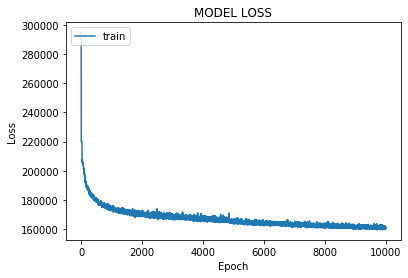

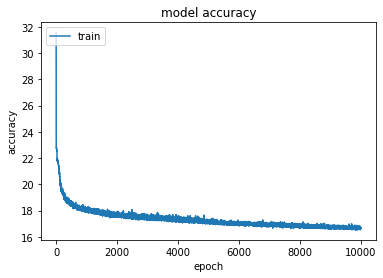

In [6]:
print(training.history.keys())
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['mean_absolute_percentage_error'])
#plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(x_train)